# 데이터 분석 & 추천 시스템

# EDA

### 라이브러리

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib as mpl
from datetime import datetime
from datetime import timedelta
import missingno as msno

# Windows
mpl.rc("font", family='Malgun Gothic')

warnings.filterwarnings("ignore")
%matplotlib inline
%config InlineBackend.figure_format='retina'

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothic'

### 데이터 불러오기

In [2]:
csv = 'C:/Users/JEON_SANGEON/codestates/data/2019-Oct.csv'
origin_df = pd.read_csv(csv)

In [3]:
origin_df.head()

event_time event_type  product_id          category_id  \
0  2019-10-01 00:00:00 UTC       view    44600062  2103807459595387724   
1  2019-10-01 00:00:00 UTC       view     3900821  2053013552326770905   
2  2019-10-01 00:00:01 UTC       view    17200506  2053013559792632471   
3  2019-10-01 00:00:01 UTC       view     1307067  2053013558920217191   
4  2019-10-01 00:00:04 UTC       view     1004237  2053013555631882655   

                         category_code     brand    price    user_id  \
0                                  NaN  shiseido    35.79  541312140   
1  appliances.environment.water_heater      aqua    33.20  554748717   
2           furniture.living_room.sofa       NaN   543.10  519107250   
3                   computers.notebook    lenovo   251.74  550050854   
4               electronics.smartphone     apple  1081.98  535871217   

                           user_session  
0  72d76fde-8bb3-4e00-8c23-a032dfed738c  
1  9333dfbd-b87a-4708-9857-6336556b0fcc  
2  566511c2-e2e3-422b-b695-cf8e6e792ca8  
3  7c90fc70-0e80-4590-96f3-13c02c18c713  
4  c6bd7419-2748-4c56-95b4-8cec9ff8b80d

In [4]:
# 컬럼별 Dtype 확인

origin_df.info()

# event_time - object로 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42448764 entries, 0 to 42448763
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 2.8+ GB


In [5]:
# 결측치 조회
origin_df.isnull().sum()

event_time              0
event_type              0
product_id              0
category_id             0
category_code    13515609
brand             6117080
price                   0
user_id                 0
user_session            2
dtype: int64

In [11]:
mod = origin_df.copy()

In [7]:
# 결측치 percent 구함
null_total = origin_df.isnull().sum()
null_count = origin_df.isnull().count()
percent = round((null_total / null_count) * 100, 1)

# 결측치 개수, 퍼센트 데이터프레임으로 생성
missing_data = pd.concat([null_total, percent], axis=1, keys=["Total", "Percent"])

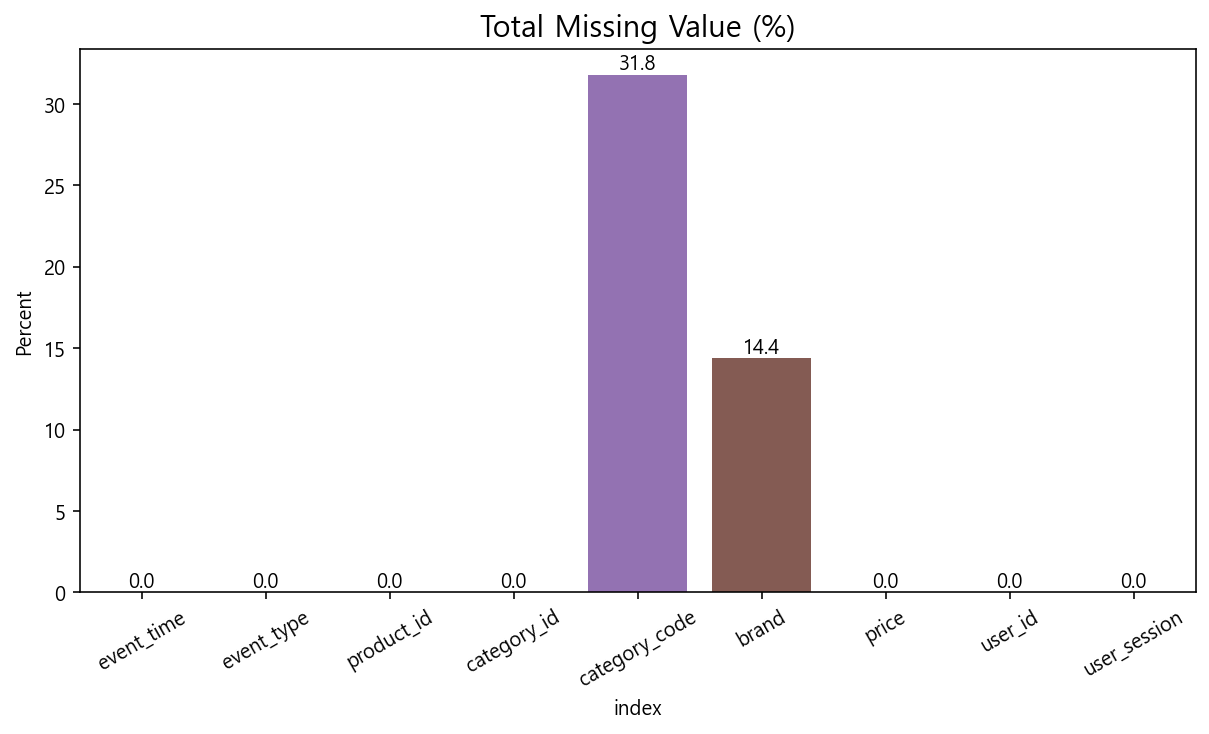

In [8]:
# 결측치 퍼센트 그래프 생성
plt.figure(figsize=(10, 5))
sns_pct = sns.barplot(x="index", y="Percent", data=missing_data.reset_index())
sns_pct.set_xticklabels(sns_pct.get_xticklabels(), rotation=30)

# bar 그래프 상단에 퍼센트 표기
for bar in sns_pct.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 0.3, "%.1f" % height, ha="center")

sns_pct.set_title("Total Missing Value (%)", fontsize=15)
plt.show()

### 결측치 상관관계 확인

- 완전 무작위 결측 (MCAR : Missing Completely At Random)

    - 변수 상에서 발생한 결측치가 다른 변수들과 아무런 상관이 없는 경우 완전 무작위 결측이라고 부른다.<br>
    대부분의 결측치 처리 패키지가 MCAR을 가정으로 하고 있고 보통 우리가 생각하는 결측치라고 생각하면 된다.   
    예를 들어, 데이터를 깜박하고 입력 안하거나 전산오류로 누락된 경우이다.   
    이러한 결측치는 보통 제거하거나 데이터 셋에서 단순 무작위 표본추출을 통해 완벽한 데이터셋으로 만들 수 있다.

- 무작위 결측 (MAR : Missing At Random)

    - 결측값이 결측된 변수와는 관련이 없지만 다른변수와는 관련이 있는 경우 무작위 결측이라고 부른다.  
    예를 들어, 여성이 남성보다 체중을 기입하지 않는다. 라고 하면 체중에 결측값이 생기지만,  
    이는 체중 변수와 관련이 있는 것이 아닌 성별 변수와 관련이 있다. 

- 비 무작위 결측 (MNAR : Missing Not At Random)

    - 위 두가지 유형이 아닌 경우 MNAR이라고 하고, 결측값이 결측된 변수와 관련이 있는 경우 비 무작위 결측이라고 한다.  
    예를 들어, 서비스에 불만족한 고객들은 만족도 설문에 응답하지 않는다.  
    
    - 링크 : https://syj9700.tistory.com/10

- 구분 예시

    * 비 무작위 결측 (MNAR)  

        + 우울증이 너무 심한 응답자들이 우울증 문항에 허위 기술을 하거나,  
        정치적, 종교적인 이유로 실제와 전혀 다른 응답하는 경우  
        
        + 위의 예시처럼 설문지 응답에서 중요한 특정 집단이 의도적으로 자신을 감춰버린 상태
    
    * 3번 상태 (NMAR)가 아니라면, 이 결측값 발생이 어느정도 독립적으로 발생하지 않았을까? 라고 생각 가능한 상태가 되고,
    이는 완벽하게 우연히 발생했다면 1번 완전 무작위 결측이 된다 (MCAR)

    * 즉, 결측값의 발생에 뚜렷한 어떤 인과 관계가 숨어있는지 여부로 구분지으면 된다  

    * 링크 : https://gooopy.tistory.com/43  

    * MCAR(Missing Completely At Random)
        
        + 특정 column(c_k)의 결측 여부가 완전히 random으로 발생하는 경우,  

        + 즉 c_k가 다른 c_1, c_2, ...와는 관련이 없을 때를 가리킴

    * MAR(Missing At Random)  

        + 특정 c_k의 결측 여부가 다른 c_1, c_2, ... 중 몇몇과 관련이 있는 경우  

        + 예를 들면, 소득수준(=c_1)에 따라 학업성취도(=c_k)의 결측 여부가 관련이 있을 경우

    * MNAR(Missing Not At Random, non ignorable)  

        + 특정 c_k의 결측 여부가 c_k의 값과 관련이 있는 경우  
        
        + 예를 들면, 학업성취도가 낮은 학생들이 학업성취도에 응답하지 않는 경우

#### 결측치 상관관계

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


Text(0.5, 1.0, 'Correlation with Missing Values')

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


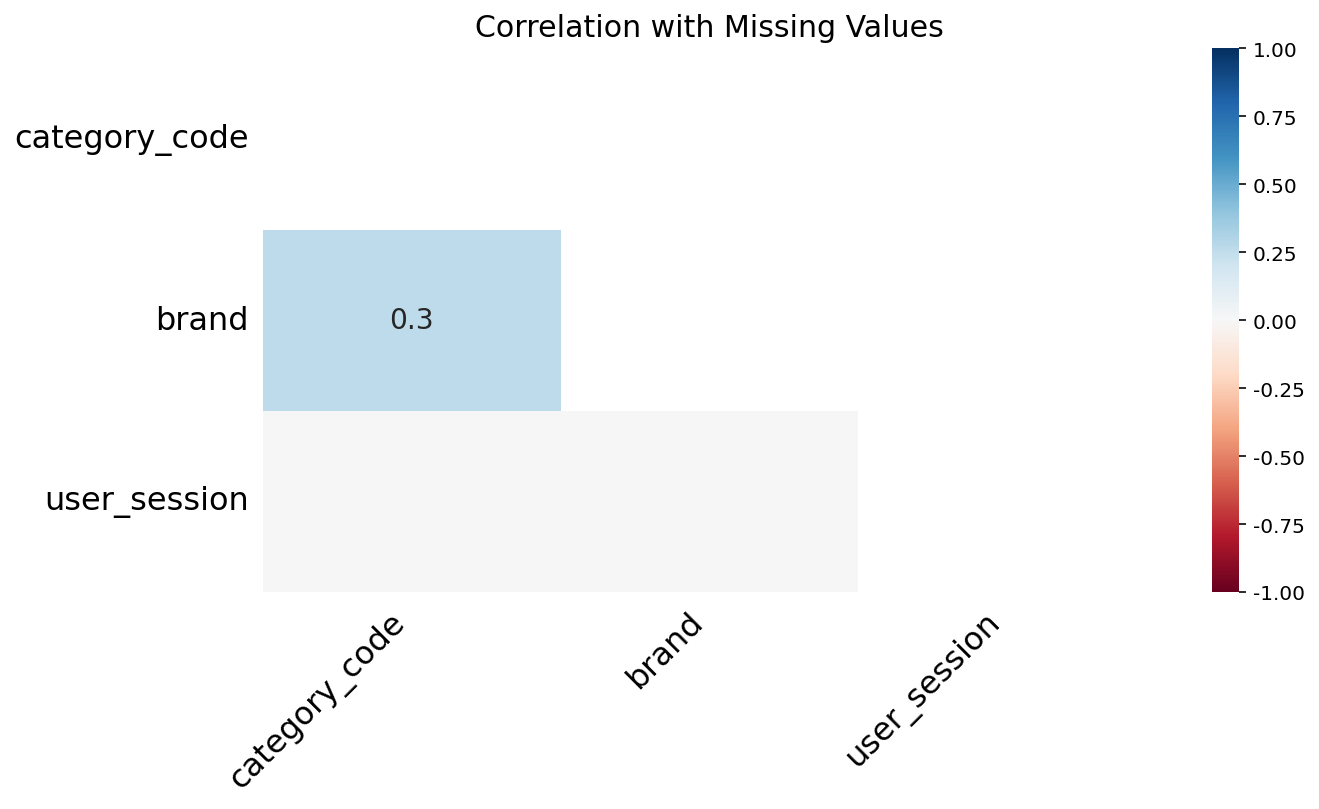

In [10]:
missingdata_col = origin_df.columns[origin_df.isnull().any()].tolist()
msno.heatmap(origin_df[missingdata_col], figsize=(10, 5))
# msno.heatmap(mod, figsize=(10, 5))
plt.title("Correlation with Missing Values", fontsize=15)

# category_code, brand 상관관계 0.3
# category_code에 결측치가 있으면, brand에 결측치가 존재할 가능성이 어느정도 있다
# -> category_code, brand MCAR 결측치이다

### 결측치 제거

#### 만약 category_code, brand 동시에 결측된 값 제거한다면, 결측치 비율 어떨까?

In [12]:
# 전체 값 대비 category_code, brand 전부 결측인 값들의 비율
null_cond = (mod["category_code"].isna()) & (mod["brand"].isna())
(mod[null_cond].shape[0] / mod.shape[0]) * 100

8.821333407964483

In [13]:
# 전체 데이터에서 category_code, brand 둘다 NaN 값인 경우 제거
both_null_cond = (mod["category_code"].notna()) | (mod["brand"].notna())
mod[both_null_cond].shape

(38704217, 9)

In [14]:
no_both_null = mod[both_null_cond]
no_both_null.shape

(38704217, 9)

In [15]:
# 결측치 percent 구함
null_total_2 = no_both_null.isnull().sum()
null_count_2 = no_both_null.isnull().count()
percent_2 = round((null_total_2 / null_count_2) * 100, 1)

# 결측치 개수, 퍼센트 데이터프레임으로 생성
missing_data_2 = pd.concat([null_total_2, percent_2], axis=1, keys=["Total", "Percent"])

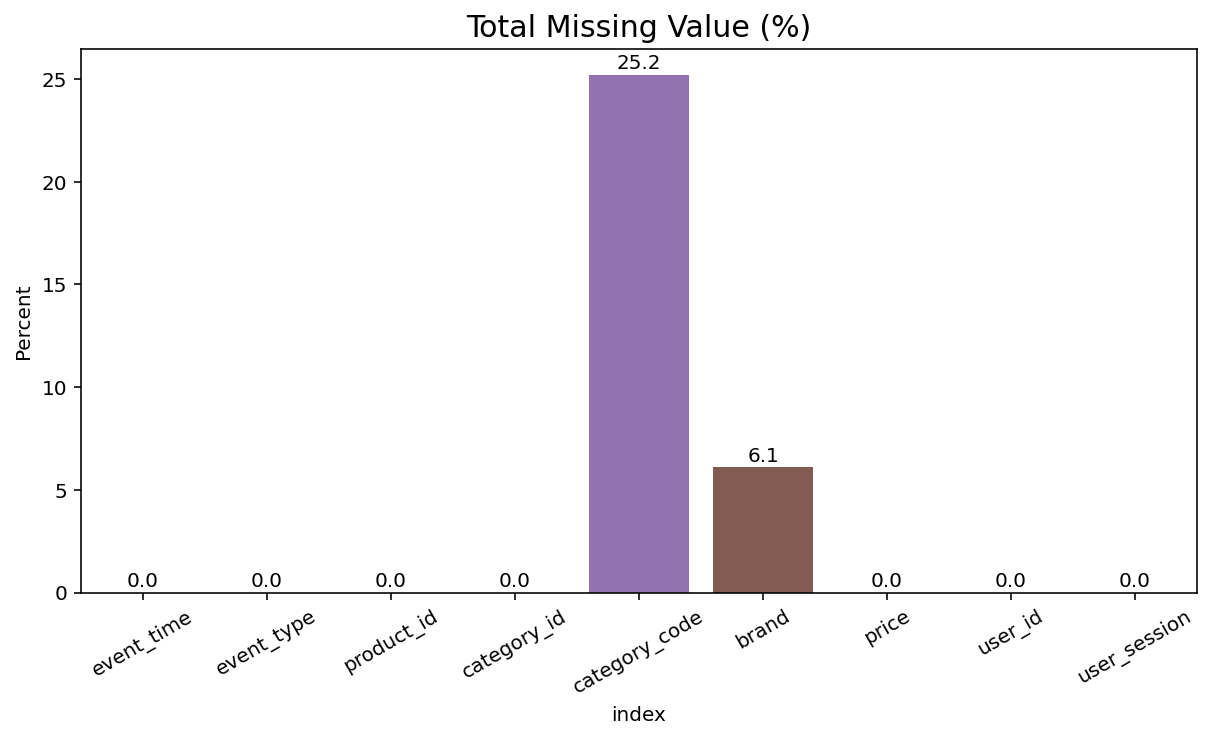

In [16]:
# 결측치 퍼센트 그래프 생성
plt.figure(figsize=(10, 5))
sns_pct_2 = sns.barplot(x="index", y="Percent", data=missing_data_2.reset_index())
sns_pct_2.set_xticklabels(sns_pct_2.get_xticklabels(), rotation=30)

# bar 그래프 상단에 퍼센트 표기
for bar in sns_pct_2.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 0.3, "%.1f" % height, ha="center")

sns_pct_2.set_title("Total Missing Value (%)", fontsize=15)
plt.show()

#### 연속형 변수 상관관계

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


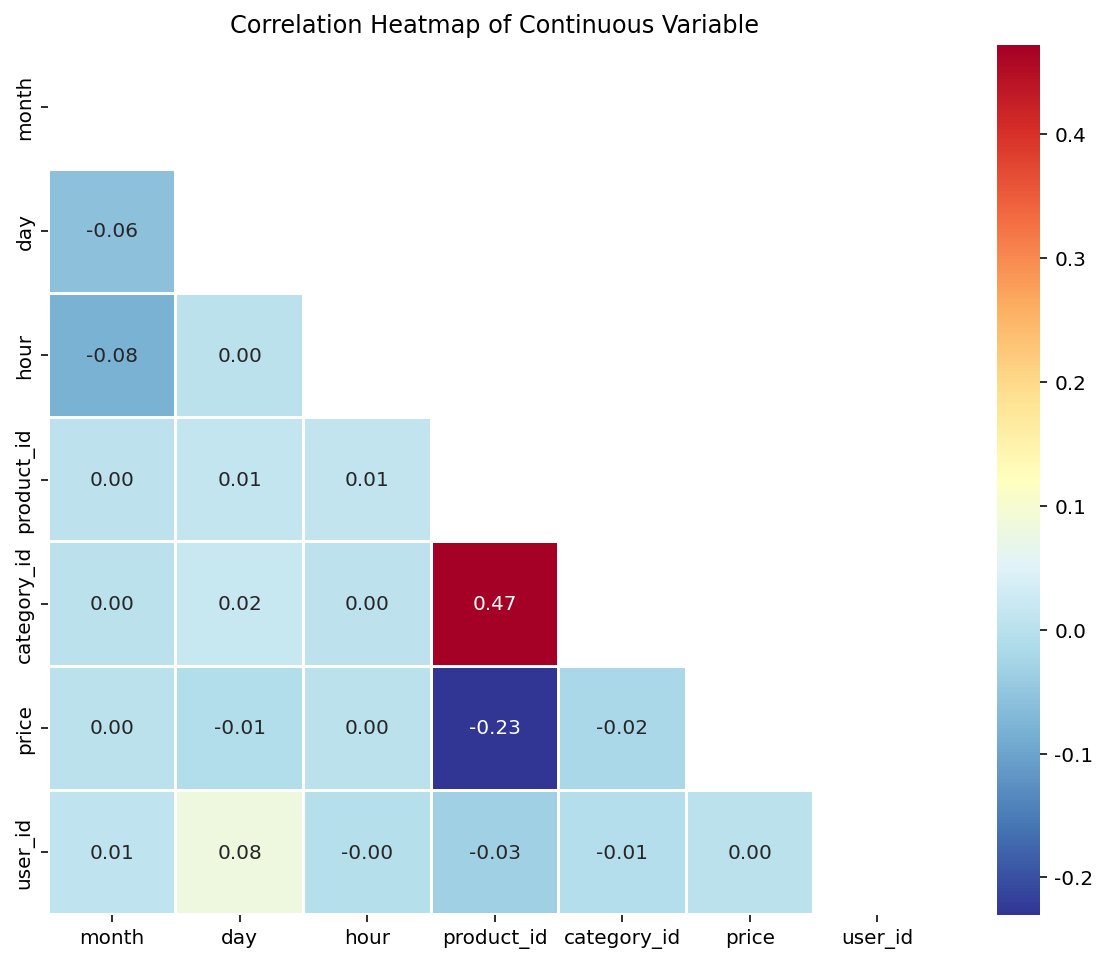

In [ ]:
# 상관계수 테이블
corr = no_both_null.corr()

# 히트맵 사이즈 설정
plt.figure(figsize=(10, 8))

# 히트맵 형태 정의. 여기서는 삼각형 형태 (위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵 그리기
sns.heatmap(data=corr,          # corr = 상관계수 테이블
            annot=True,         # 히트맵에 값 표시
            mask=mask,          # 히트맵 형태, 여기서는 위에서 정의한 삼각형 형태
            fmt=".2f",          # 값 표시 방식. 소수점 2번째 자리까지
            linewidths=1.,      # 경계면 실선 구분 여부
            cmap="RdYlBu_r")    # 사용할 색 지정 (python colormap 검색)
plt.title("Correlation Heatmap of Continuous Variable")
plt.show()

# product_id, category_id 상관관계 0.47

### 결측치 탐색

In [ ]:
# category_id 컬럼의 결측치 데이터프레임으로 생성하여, kaspi.kz 홈페이지에 검색
def null_list(df, col, idx_num=15):
    
    na_cond = df["category_code"].isnull()                  # category_code가 NaN인 것 조건 설정
    null_cat = df[na_cond][f"{col}"].value_counts()         # 위의 조건 적용한 것 중, 컬럼 이름 col인 것 value_counts()
    null_cat_values = null_cat[idx_num:(idx_num+15)]        # value_counts()한 것들 15개 추려냄
    null_cat_list = null_cat_values.keys().tolist()         # 추려낸 15개 list 생성

    # 빈 데이터프레임 생성
    df_2 = pd.DataFrame()

    # null_cat_list에 있는 category_id로 for문 생성하여 product_id 탐색
    for cat_id in null_cat_list:
        cat_id_cond = (df["category_id"] == cat_id)
        # category_id로 검색한 것의 product_id 숫자 많은 것 중 중복안된 5개 prod_id list로 설정
        prod_id = df[cat_id_cond]["product_id"].value_counts().head(5).keys().tolist()
        value_count = df[cat_id_cond]["product_id"].value_counts().head(5).tolist()
        # 앞서 생성한 빈 데이터프레임에 category_id와 prod_id 채워넣음
        df_2 = df_2.append(pd.DataFrame(
            [[cat_id, prod_id, value_count]], columns=["category_id", "product_id", "value_count"])).reset_index(drop=True)
    return df_2

In [18]:
# null_list 함수 mod 데이터프레임에 적용하여 해당 category_code 검색
# kaspi.kz 홈페이지에 해당 카테고리 검색하여, dict 파일로 생성
category_dict = {2053013553559896355 : 'auto.accessories.tire',
                 2053013563651392361 : 'accessories.jewelry',
                 2053013556168753601 : 'construction.tool.kit',
                 2053013563693335403 : 'accessories.jewelry',
                 2053013557024391671 : 'furniture.bedroom.set',
                 2053013563970159485 : 'appliances.kitchen.cooker',
                 2053013563173241677 : 'beauty.technique.dryer',
                 2053013553853497655 : 'beauty.perfumery',
                 2053013553375346967 : 'electronics.clock',
                 2053013563584283495 : 'accessories.jewelry',
                 2053013553526341921 : 'auto.accessories.disc',
                 2053013559733912211 : 'furniture.living_room',
                 2053013564918072245 : 'home.textiles.carpet',
                 2053013561218695907 : 'electronics.video.tv',
                 2053013552385491165 : 'appliances.environment.air_conditioning',
                 2062461754293617058 : 'auto.accessories.car_seat',
                 2053013552259662037 : 'appliances.environment.boiler',
                 2053013563550729061 : 'accessories.jewelry',
                 2053013558525952589 : 'electronics.smartphone.phone_accessories',
                 2053013558031024687 : 'furniture.kitchen.crockery',
                 2053013553484398879 : 'auto.accessories.battery',
                 2053013554994348409 : 'appliances.kitchen.multibaker',
                 2053013555355058573 : 'appliances.kitchen.multicooker',
                 2053013557166998015 : 'furniture.bedroom.mattress',
                 2085718636156158307 : 'furniture.bedroom.pillow',
                 2053013558190408249 : 'furniture.kitchen.pan',
                 2053013555287949705 : 'appliances.kitchen.meat_grinder',
                 2144356630513320518 : 'apparel.coat',
                 2053013560144954031 : 'appliances.kitchen.washer',
                 2053013554524586339 : 'electronics.audio.music_center'
                }

In [19]:
def fill_cat(df, col="category_code"):
    # category_code 열의 None값 nones에 선언
    nones = df[col].isnull()
    for cat_id, cat_code in category_dict.items():
        # category_id 열 값 중 cat_id와 동일한 값들을 찾는 조건 설정
        cat_cond = (df["category_id"] == cat_id)
        # category_code열의 none값들 중에 cat_cond 조건과 일치하는 것을 cat_code로 선언
        df.loc[nones & cat_cond, col] = cat_code

    return df

In [20]:
fill_cat(mod).head(3)

event_time event_type  product_id          category_id  \
0  2019-10-01 00:00:00 UTC       view    44600062  2103807459595387724   
1  2019-10-01 00:00:00 UTC       view     3900821  2053013552326770905   
2  2019-10-01 00:00:01 UTC       view    17200506  2053013559792632471   

                         category_code     brand   price    user_id  \
0                                  NaN  shiseido   35.79  541312140   
1  appliances.environment.water_heater      aqua   33.20  554748717   
2           furniture.living_room.sofa       NaN  543.10  519107250   

                           user_session  
0  72d76fde-8bb3-4e00-8c23-a032dfed738c  
1  9333dfbd-b87a-4708-9857-6336556b0fcc  
2  566511c2-e2e3-422b-b695-cf8e6e792ca8

In [22]:
print("fill_cat 함수 적용 후 category_code 결측치 개수 :", 
      mod["category_code"].isnull().sum(), "->", mod["category_code"].isnull().sum())
print("fill_cat 함수 적용 후 category_code 결측치 비율 :", round(4707919 / mod.shape[0] * 100), "%")

fill_cat 함수 적용 후 category_code 결측치 개수 : 4707919 -> 4707919
fill_cat 함수 적용 후 category_code 결측치 비율 : 11 %


In [23]:
df = mod.copy()

In [24]:
# category_code 결측, 브랜드 채워져 있는 조건
cat_null_br_ok = (df["category_code"].isnull()) & (df["brand"].notnull())

# category_code 채워지고, brand 결측일 조건
cat_ok_br_null = (df["category_code"].notnull()) & (df["brand"].isnull())

# category_code, brand 둘다 결측일 조건
both_null = (df["category_code"].isnull()) & (df["brand"].isnull())

In [25]:
print("category_code 결측, 브랜드 채워져 있는것 :", df[cat_null_br_ok].shape[0], "개")
print("category_code 채워지고, brand 결측 :", df[cat_ok_br_null].shape[0],"개")
print("category_code, brand 둘다 결측 :", df[both_null].shape[0], "개")

category_code 결측, 브랜드 채워져 있는것 : 3186832 개
category_code 채워지고, brand 결측 : 4595993 개
category_code, brand 둘다 결측 : 1521087 개


In [26]:
# 위에서 설정한 조건에 맞는 결측치들 채워줌
df.loc[cat_null_br_ok, "category_code"] = "no_cat"
df.loc[cat_ok_br_null, "brand"] = "no_brand"
df.loc[both_null, ["category_code", "brand"]] = "missing"

In [27]:
# user_session 결측치 채워줌
cond_sess_id1 = (df["user_session"].isnull()) & (df["user_id"] == 557388939)
cond_sess_id2 = (df["user_session"].isnull()) & (df["user_id"] == 549825742)

df.loc[cond_sess_id1, "user_session"] = "9c11ac2d-5c56-4994-87e4-ea077ab0ab45"
df.loc[cond_sess_id2, "user_session"] = "aac8b299-4355-4c25-bbfe-c0369f19a3ce"

In [28]:
# 원본과 다르게 수정한 category_code
clock_cond = (df["category_code"] == "electronics.clock")
washer_cond = (df["category_code"] == "appliances.kitchen.washer")
air_cond = (df["category_code"] == "appliances.environment.air_conditioning")

# 원본과 동일하게 수정
df.loc[clock_cond, "category_code"] = "electronics.clocks"
df.loc[washer_cond, "category_code"] = "appliances.kitchen.dishwasher"
df.loc[air_cond, "category_code"] = "appliances.environment.air_conditioner"

### 결측치 처리 완료한 데이터프레임 parquet 파일로 저장

In [ ]:
# 결측치 처리 완료 데이터프레임 parquet 파일로 저장
df.to_parquet("D:/cp2_dataset/df_cat.parquet", engine="pyarrow", compression="gzip")

In [2]:
# read
df = pd.read_parquet("C://Users//JEON_SANGEON//codestates//data//cp2_data.parquet")
df

event_time  month  day day_name  hour event_type  \
0        2019-10-01 04:00:00+04:00     10    1  Tuesday     4       view   
1        2019-10-01 04:00:00+04:00     10    1  Tuesday     4       view   
2        2019-10-01 04:00:01+04:00     10    1  Tuesday     4       view   
3        2019-10-01 04:00:01+04:00     10    1  Tuesday     4       view   
4        2019-10-01 04:00:04+04:00     10    1  Tuesday     4       view   
...                            ...    ...  ...      ...   ...        ...   
42448759 2019-11-01 03:59:58+04:00     11    1   Friday     3       view   
42448760 2019-11-01 03:59:58+04:00     11    1   Friday     3       view   
42448761 2019-11-01 03:59:58+04:00     11    1   Friday     3       view   
42448762 2019-11-01 03:59:59+04:00     11    1   Friday     3       view   
42448763 2019-11-01 03:59:59+04:00     11    1   Friday     3       view   

          product_id          category_id  \
0           44600062  2103807459595387724   
1            3900821  2053013552326770905   
2           17200506  2053013559792632471   
3            1307067  2053013558920217191   
4            1004237  2053013555631882655   
...              ...                  ...   
42448759     2300275  2053013560530830019   
42448760    10800172  2053013554994348409   
42448761     5701038  2053013553970938175   
42448762    21407424  2053013561579406073   
42448763    13300120  2053013557166998015   

                                category_code      brand    price    user_id  \
0                                      no_cat   shiseido    35.79  541312140   
1         appliances.environment.water_heater       aqua    33.20  554748717   
2                  furniture.living_room.sofa   no_brand   543.10  519107250   
3                          computers.notebook     lenovo   251.74  550050854   
4                      electronics.smartphone      apple  1081.98  535871217   
...                                       ...        ...      ...        ...   
42448759             electronics.camera.video      gopro   527.40  537931532   
42448760        appliances.kitchen.multibaker    redmond    61.75  527322328   
42448761              auto.accessories.player    kenwood   128.70  566280422   
42448762                   electronics.clocks     tissot   689.85  513118352   
42448763           furniture.bedroom.mattress  swisshome   155.73  525266378   

                                  user_session  
0         72d76fde-8bb3-4e00-8c23-a032dfed738c  
1         9333dfbd-b87a-4708-9857-6336556b0fcc  
2         566511c2-e2e3-422b-b695-cf8e6e792ca8  
3         7c90fc70-0e80-4590-96f3-13c02c18c713  
4         c6bd7419-2748-4c56-95b4-8cec9ff8b80d  
...                                        ...  
42448759  22c57267-da98-4f28-9a9c-18bb5b385193  
42448760  5054190a-46cb-4211-a8f1-16fc1a060ed8  
42448761  05b6c62b-992f-4e8e-91f7-961bcb4719cd  
42448762  4c14bf2a-2820-4504-929d-046356a5a204  
42448763  6e57d2d7-6022-46e6-81d6-fa77f14cefd8  

[42380091 rows x 13 columns]

# 데이터셋 분석

In [3]:
df.shape

(42380091, 13)

In [7]:
# event_type 비율 확인
print(df['event_type'].value_counts())

print(df['event_type'].value_counts(normalize=True))

view        40710876
cart          926366
purchase      742849
Name: event_type, dtype: int64
view        0.960613
cart        0.021859
purchase    0.017528
Name: event_type, dtype: float64


findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


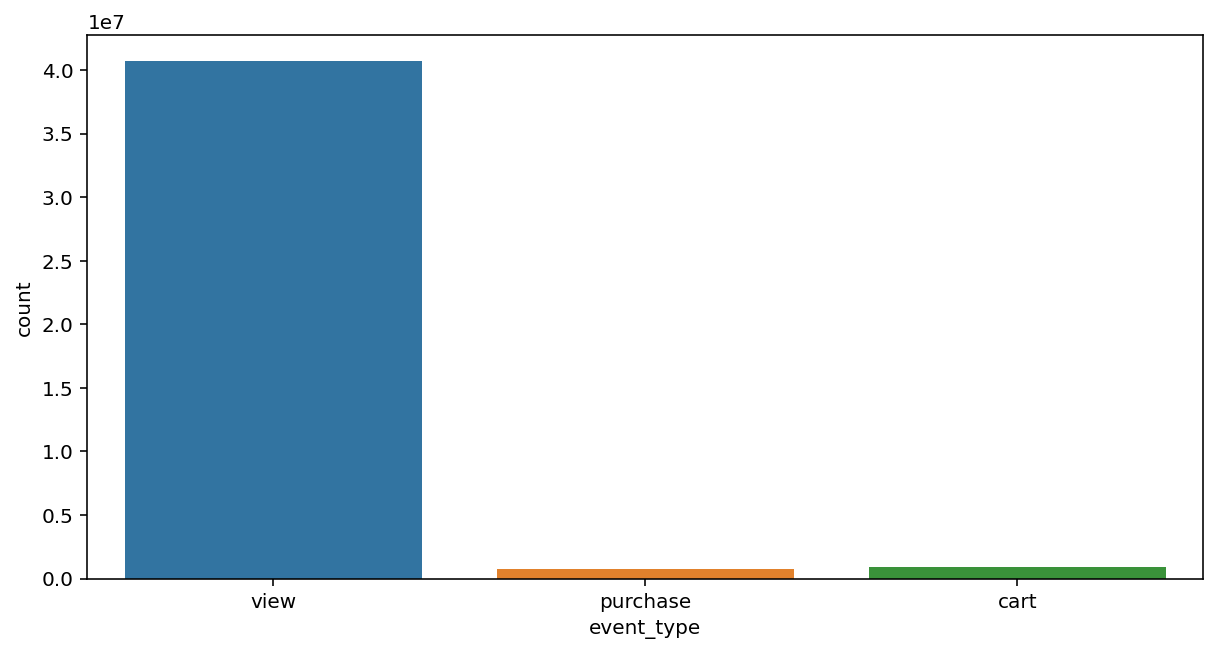

In [5]:
# event_type 분포
plt.figure(figsize=(10, 5))
cnt = sns.countplot(x=df["event_type"])
plt.show()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42380091 entries, 0 to 42448763
Data columns (total 13 columns):
 #   Column         Dtype                     
---  ------         -----                     
 0   event_time     datetime64[ns, Asia/Dubai]
 1   month          int64                     
 2   day            int64                     
 3   day_name       object                    
 4   hour           int64                     
 5   event_type     object                    
 6   product_id     int64                     
 7   category_id    int64                     
 8   category_code  object                    
 9   brand          object                    
 10  price          float64                   
 11  user_id        int64                     
 12  user_session   object                    
dtypes: datetime64[ns, Asia/Dubai](1), float64(1), int64(6), object(5)
memory usage: 4.4+ GB


# event_type 분석 

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


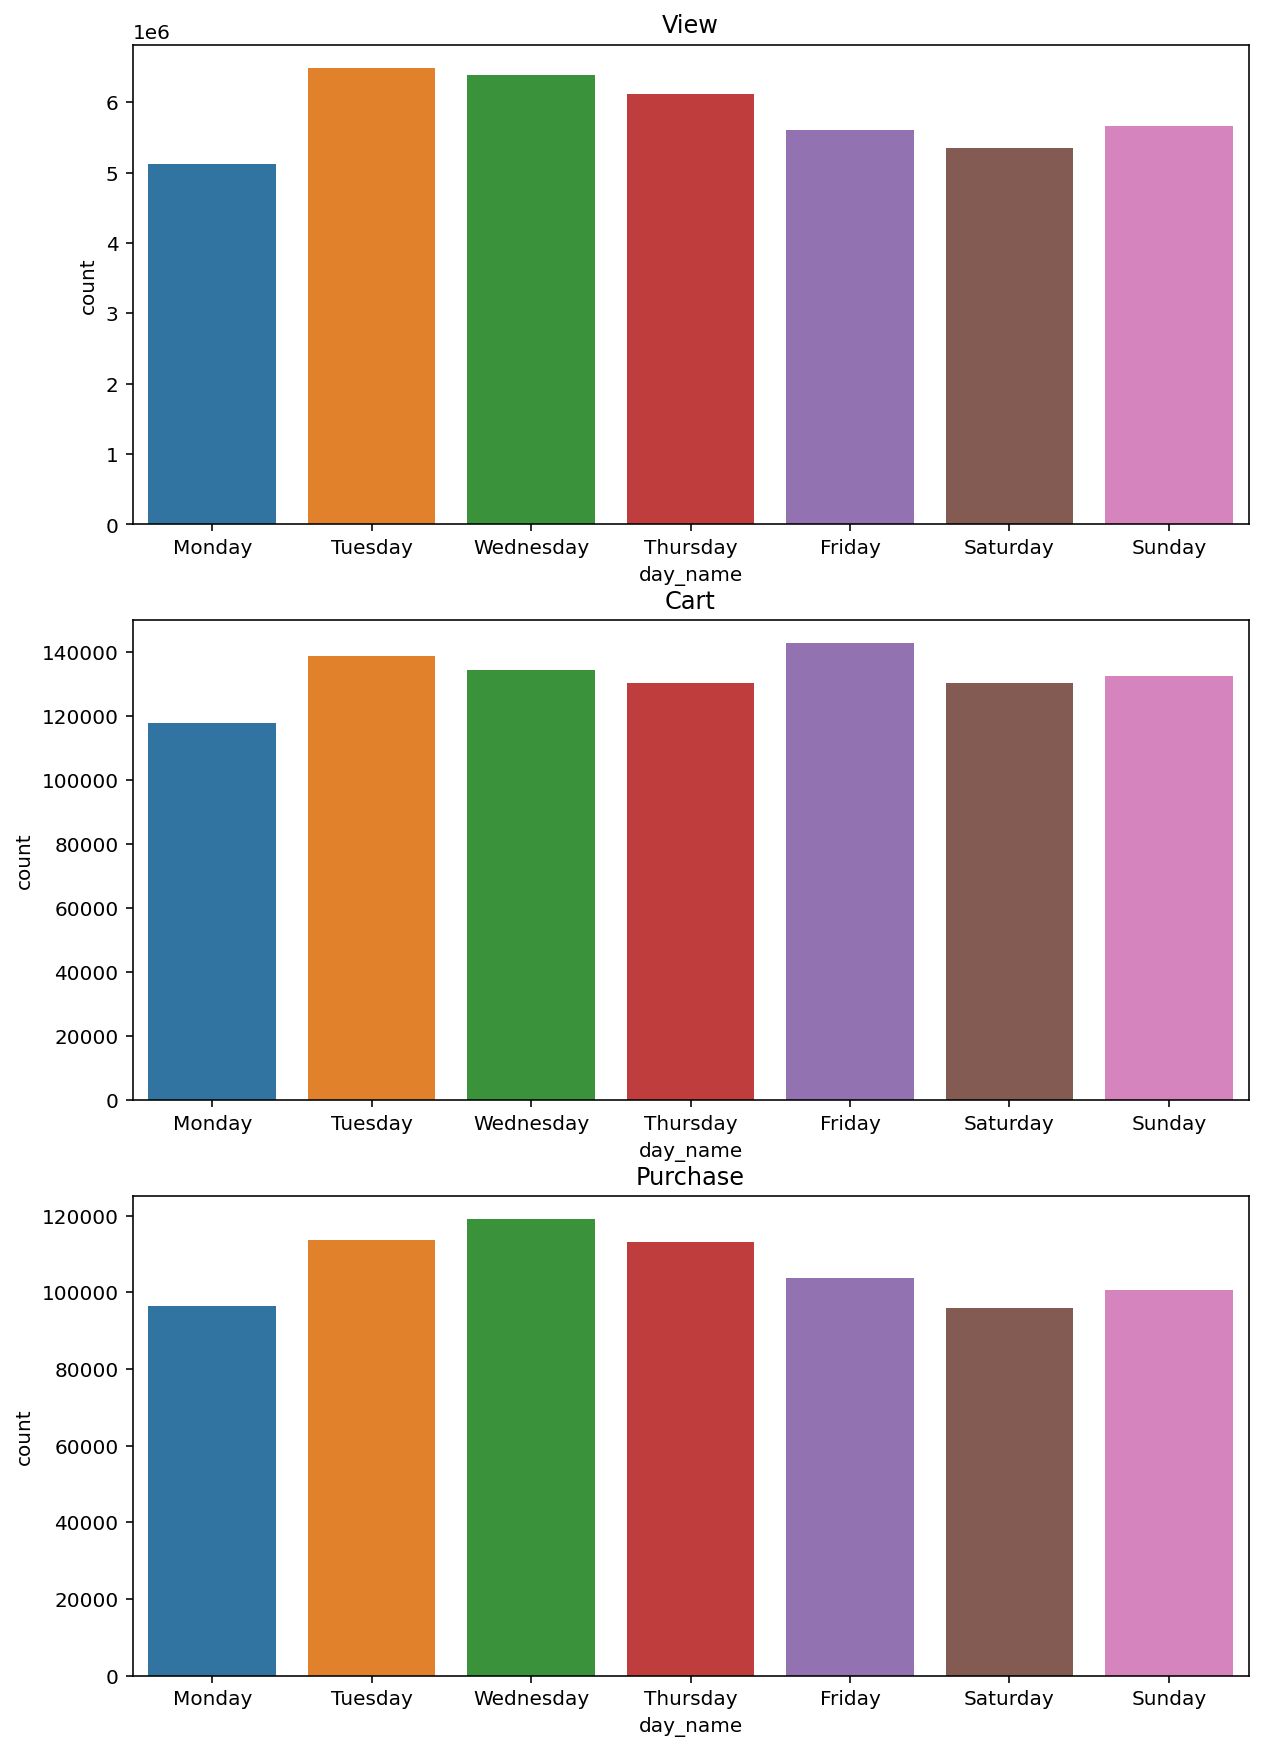

In [8]:
# 상품 클릭, 장바구니, 구매 조건 설정
view_cond = (df["event_type"] == "view")
cart_cond = (df["event_type"] == "cart")
purchase_cond = (df["event_type"] == "purchase")

# 조건별로 countplot 생성
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# 요일별 상품 클릭한 숫자
view_cnt = sns.countplot(x=df[view_cond]["day_name"],
                         order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],              
                         ax=ax[0])
view_cnt.set_title("View")

# 요일별 장바구니에 넣은 숫자
cart_cnt = sns.countplot(x=df[cart_cond]["day_name"],
                         order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                         ax=ax[1])
cart_cnt.set_title("Cart")

# 요일별 구매한 숫자
purchase_cnt = sns.countplot(x=df[purchase_cond]["day_name"],
                             order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                             ax=ax[2])
purchase_cnt.set_title("Purchase")

plt.show()

### 시간대별 시각화

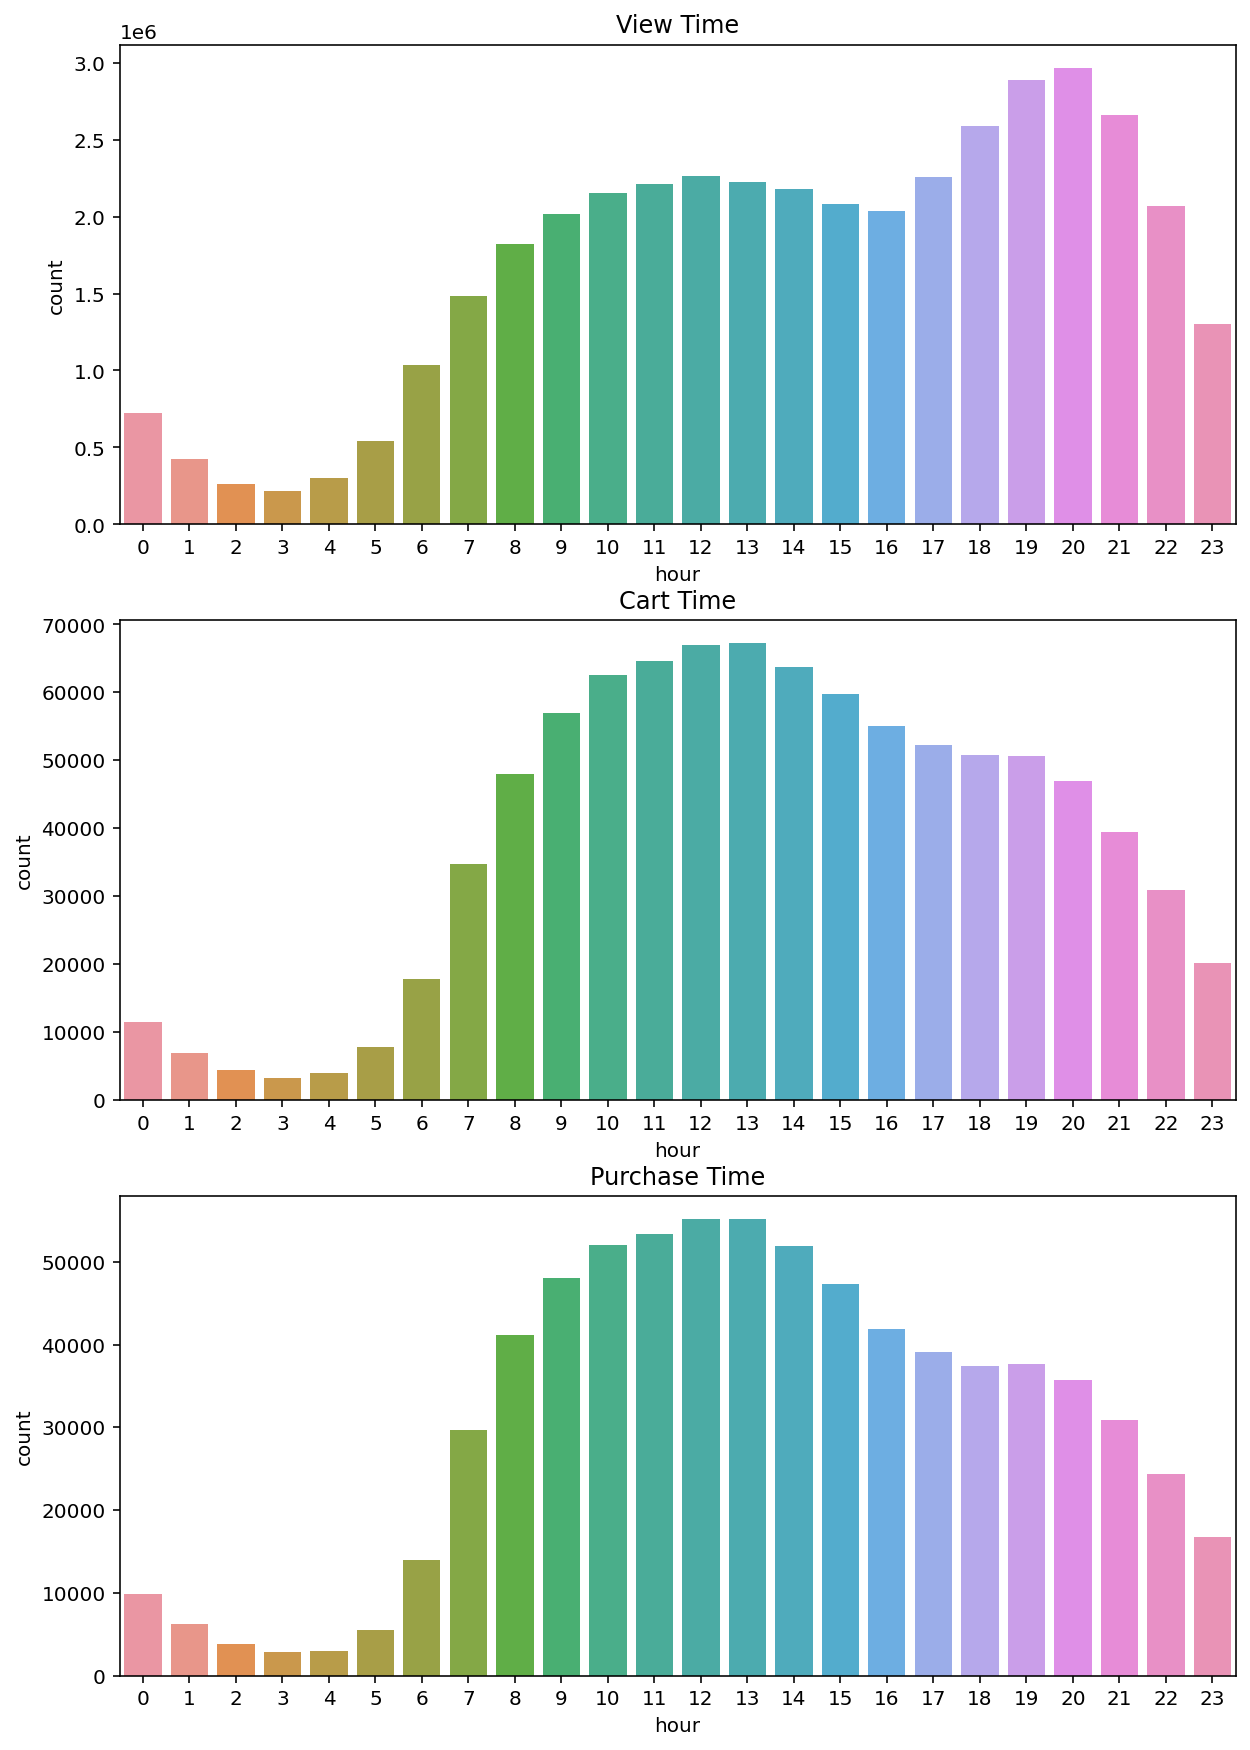

In [9]:
# 시간대별 View, Cart, Purchase

# 조건별로 countplot 생성
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# 요일별 상품 클릭한 숫자
view_time_cnt = sns.countplot(x=df[view_cond]["hour"],
                              ax=ax[0])
view_time_cnt.set_title("View Time")

# 요일별 장바구니에 넣은 숫자
cart_time_cnt = sns.countplot(x=df[cart_cond]["hour"],
                         ax=ax[1])
cart_time_cnt.set_title("Cart Time")

# 요일별 구매한 숫자
purchase_time_cnt = sns.countplot(x=df[purchase_cond]["hour"],
                             ax=ax[2])
purchase_time_cnt.set_title("Purchase Time")

plt.show()

### 전체 category_code TOP 10 분석

In [10]:
# 카테고리 코드 TOP 10
df["category_code"].value_counts()[:10]

electronics.smartphone           11502427
no_cat                            3186832
auto.accessories.tire             1886545
accessories.jewelry               1672378
electronics.clocks                1629396
missing                           1502845
electronics.video.tv              1283824
computers.notebook                1136040
electronics.audio.headphone       1099330
appliances.kitchen.dishwasher     1046458
Name: category_code, dtype: int64

In [11]:
# 대분류 TOP 10
main_cat = df["category_code"].str.split(".").str[0].value_counts()[:10]
main_cat

electronics     16841913
appliances       6145979
auto             3415253
no_cat           3186832
furniture        2357691
computers        2321338
accessories      1909794
apparel          1638206
missing          1502845
construction     1424270
Name: category_code, dtype: int64

In [12]:
# 중분류 TOP 10
sub_cat_1st = df["category_code"].str.split(".").str[1].value_counts()[:10]
sub_cat_1st

smartphone     11635306
kitchen         4645130
accessories     3415253
jewelry         1672378
audio           1664971
clocks          1629396
environment     1446484
video           1296961
shoes           1206099
notebook        1136040
Name: category_code, dtype: int64

In [13]:
# 소분류 TOP 10
sub_cat_2nd = df["category_code"].str.split(".").str[2].value_counts()[:10]
sub_cat_2nd

tire             1886545
tv               1283824
headphone        1099330
dishwasher       1046458
refrigerators     887312
vacuum            800993
kit               694215
player            469744
set               465915
cooker            457693
Name: category_code, dtype: int64

In [14]:
# 브랜드 TOP 10
brand_top10 = df["brand"].value_counts()[:10]
brand_top10

samsung     5282775
apple       4122554
xiaomi      3083763
no_brand    2779437
lucente     1537906
missing     1502845
huawei      1111205
lg           562404
bosch        557090
oppo         482887
Name: brand, dtype: int64

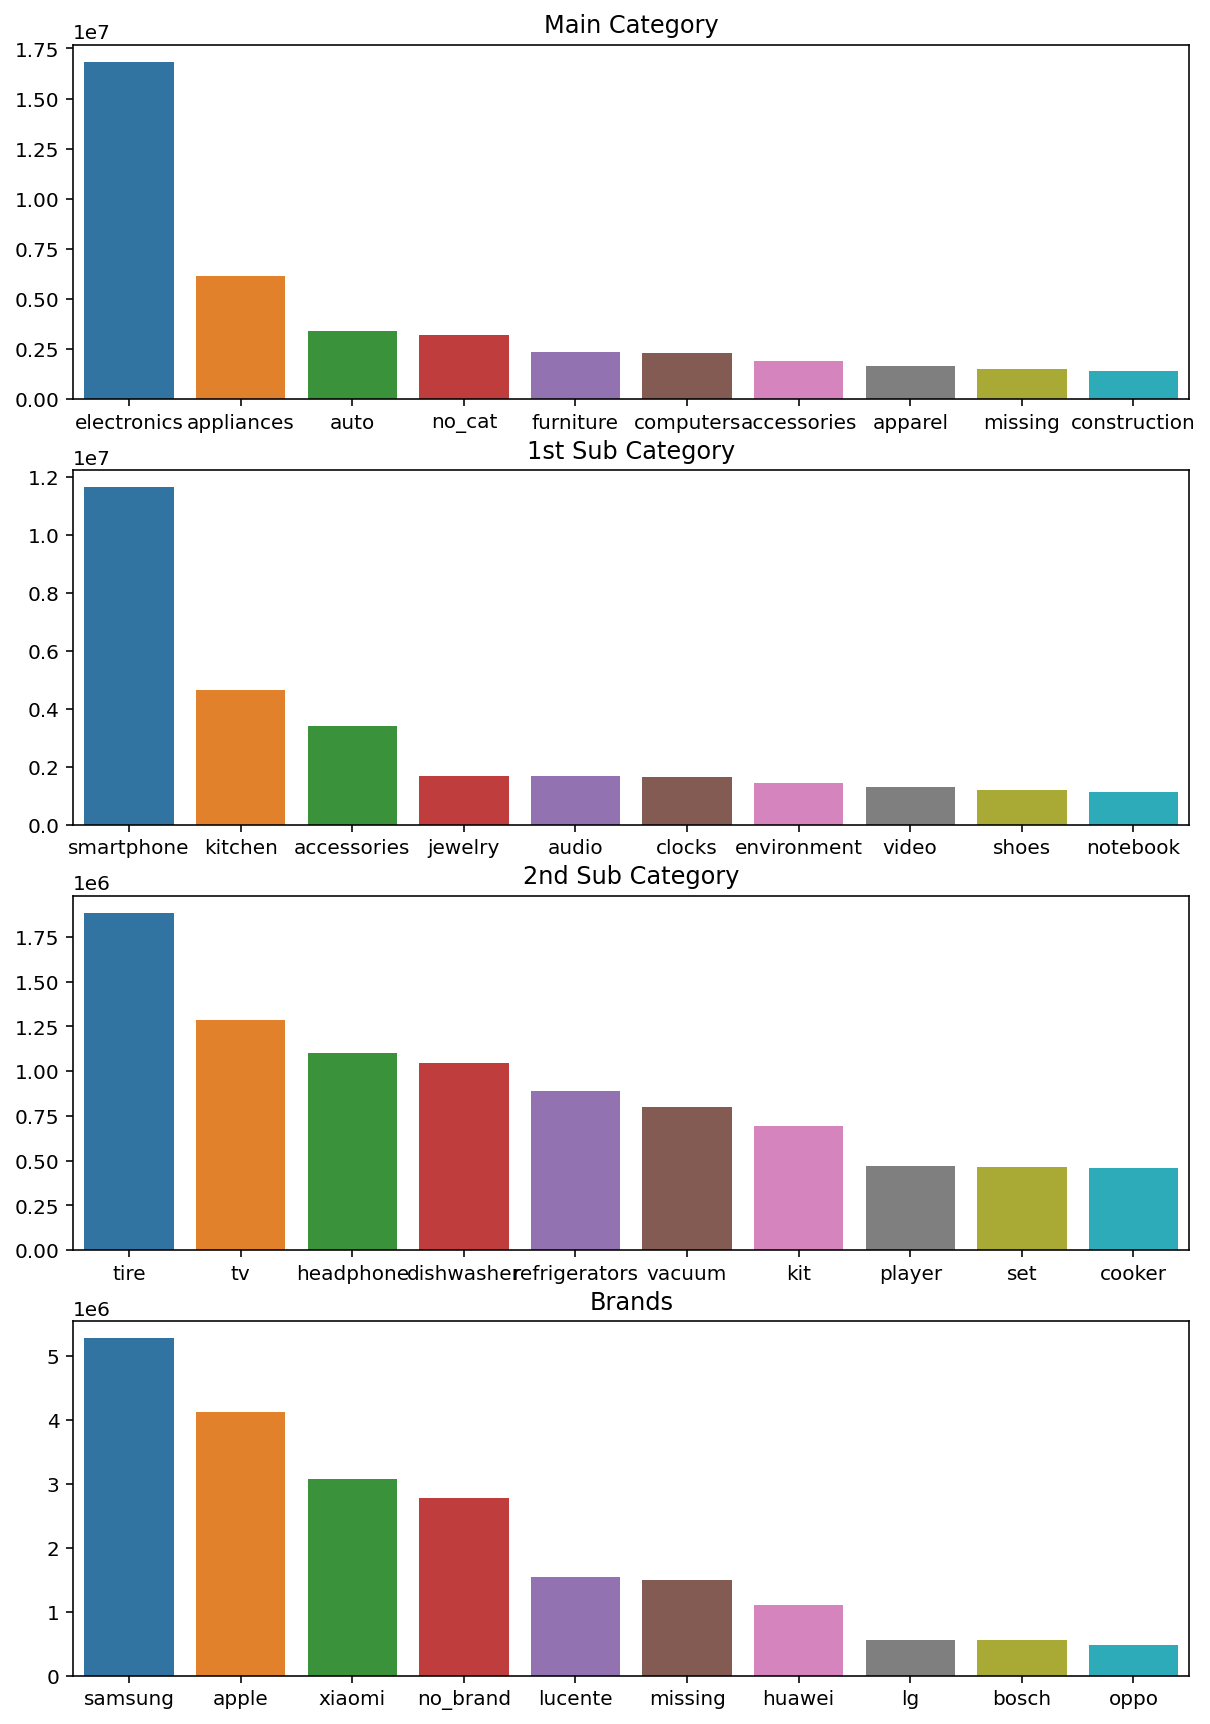

In [15]:
# 카테고리별 TOP 10 (대분류, 중분류, 소분류), 브랜드 TOP 10

# 조건별로 plot 생성
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(10, 15))

# 메인 카테고리 (대분류) Top 10
main_bar = sns.barplot(x=main_cat.index, 
                       y=main_cat.values,
                       ax=ax[0])
main_bar.set_title("Main Category")

# 중분류 Top 10
sub_1st_bar = sns.barplot(x=sub_cat_1st.index,
                          y=sub_cat_1st.values,
                          ax=ax[1])
sub_1st_bar.set_title("1st Sub Category")

# 소분류 Top 10
sub_2nd_bar = sns.barplot(x=sub_cat_2nd.index,
                          y=sub_cat_2nd.values,
                          ax=ax[2])
sub_2nd_bar.set_title("2nd Sub Category")

# 브랜드 Top 10
brand_bar = sns.barplot(x=brand_top10.index,
                        y=brand_top10.values,
                        ax=ax[3])
brand_bar.set_title("Brands")

plt.show()

## Category_code 기준 event_type 분석

count top 10

In [ ]:
# event_type열 view, cart, purchase 조건 설정
view_cond = (df["event_type"] == "view")
cart_cond = (df["event_type"] == "cart")
purchase_cond = (df["event_type"] == "purchase")

# view, cart, purchase category_code TOP 10 검색
view_cat_count = df[view_cond]["category_code"].value_counts().head(10)
cart_cat_count = df[cart_cond]["category_code"].value_counts().head(10)
purchase_cat_count = df[purchase_cond]["category_code"].value_counts().head(10)

# view, cart, purchase category_code TOP 10 데이터프레임 생성
view_cat_df = pd.DataFrame(view_cat_count)
cart_cat_df = pd.DataFrame(cart_cat_count)
purchase_cat_df = pd.DataFrame(purchase_cat_count)

# view, cart, purchase top 10 데이터프레임 칼럼 변경
view_cat_df.reset_index(inplace=True)
view_cat_df.columns = ["view_category", "view_counts"]
view_cat_df["view_cnt_pct"] = view_cat_df["view_counts"].apply(lambda x : round(x / df[view_cond].shape[0], 2))

cart_cat_df.reset_index(inplace=True)
cart_cat_df.columns = ["cart_category", "cart_counts"]
cart_cat_df["cart_cnt_pct"] = cart_cat_df["cart_counts"].apply(lambda x : round(x / df[cart_cond].shape[0], 2))

purchase_cat_df.reset_index(inplace=True)
purchase_cat_df.columns = ["purchase_category", "purchase_counts"]
purchase_cat_df["purchase_cnt_pct"] = purchase_cat_df["purchase_counts"].apply(lambda x : round(x / df[purchase_cond].shape[0], 2))

# view, cart, purchase category_code TOP 10 데이터프레임 결합
vcp_top_10 = pd.concat([pd.concat([view_cat_df, cart_cat_df], axis=1), purchase_cat_df], axis=1)
vcp_top_10

view_category  view_counts  view_cnt_pct  \
0         electronics.smartphone     10614666          0.26   
1                         no_cat      3135201          0.08   
2          auto.accessories.tire      1821657          0.04   
3            accessories.jewelry      1647995          0.04   
4             electronics.clocks      1562600          0.04   
5                        missing      1482804          0.04   
6           electronics.video.tv      1216925          0.03   
7             computers.notebook      1104823          0.03   
8    electronics.audio.headphone      1017685          0.02   
9  appliances.kitchen.dishwasher      1004840          0.02   

                      cart_category  cart_counts  cart_cnt_pct  \
0            electronics.smartphone       549743          0.59   
1       electronics.audio.headphone        51142          0.06   
2              electronics.video.tv        41658          0.04   
3                electronics.clocks        40280          0.04   
4     appliances.kitchen.dishwasher        24095          0.03   
5                            no_cat        22801          0.02   
6             auto.accessories.tire        20869          0.02   
7     appliances.environment.vacuum        17256          0.02   
8                computers.notebook        15627          0.02   
9  appliances.kitchen.refrigerators        13124          0.01   

               purchase_category  purchase_counts  purchase_cnt_pct  
0         electronics.smartphone           338018              0.46  
1          auto.accessories.tire            44019              0.06  
2    electronics.audio.headphone            30503              0.04  
3                         no_cat            28830              0.04  
4             electronics.clocks            26516              0.04  
5           electronics.video.tv            25241              0.03  
6            accessories.jewelry            24383              0.03  
7  appliances.kitchen.dishwasher            17523              0.02  
8             computers.notebook            15590              0.02  
9                        missing            14349              0.02

price top 10

In [ ]:
# event_type열 view, cart, purchase 조건 설정
view_cond = (df["event_type"] == "view")
cart_cond = (df["event_type"] == "cart")
purchase_cond = (df["event_type"] == "purchase")

# view, cart, purchase category_code TOP 10 검색
view_cat_price = df[view_cond].groupby("category_code")["price"].sum().sort_values(ascending=False).head(10)
cart_cat_price = df[cart_cond].groupby("category_code")["price"].sum().sort_values(ascending=False).head(10)
purchase_cat_price = df[purchase_cond].groupby("category_code")["price"].sum().sort_values(ascending=False).head(10)

# view, cart, purchase category_code TOP 10 데이터프레임 생성
view_cat_price_df = pd.DataFrame(view_cat_price)
cart_cat_price_df = pd.DataFrame(cart_cat_price)
purchase_cat_price_df = pd.DataFrame(purchase_cat_price)

# view, cart, purchase top 10 데이터프레임 칼럼 변경
view_cat_price_df.reset_index(inplace=True)
view_cat_price_df.columns = ["view_category", "view_price"]
view_cat_price_df["view_cnt_pct"] = view_cat_price_df["view_price"].apply(lambda x : round(x / sum(df[view_cond]["price"]), 2))

cart_cat_price_df.reset_index(inplace=True)
cart_cat_price_df.columns = ["cart_category", "cart_price"]
cart_cat_price_df["cart_cnt_pct"] = cart_cat_price_df["cart_price"].apply(lambda x : round(x / sum(df[cart_cond]["price"]), 2))

purchase_cat_price_df.reset_index(inplace=True)
purchase_cat_price_df.columns = ["purchase_category", "purchase_price"]
purchase_cat_price_df["purchase_cnt_pct"] = purchase_cat_price_df["purchase_price"].apply(lambda x : round(x / sum(df[purchase_cond]["price"]), 2))

# view, cart, purchase category_code TOP 10 데이터프레임 결합
vcp_top_pr_10 = pd.concat([pd.concat([view_cat_price_df, cart_cat_price_df], axis=1), purchase_cat_price_df], axis=1)
vcp_top_pr_10

view_category    view_price  view_cnt_pct  \
0            electronics.smartphone  5.038426e+09          0.43   
1                computers.notebook  7.907289e+08          0.07   
2                            no_cat  6.058913e+08          0.05   
3              electronics.video.tv  5.341822e+08          0.05   
4               accessories.jewelry  4.125639e+08          0.04   
5                electronics.clocks  3.852238e+08          0.03   
6  appliances.kitchen.refrigerators  3.435288e+08          0.03   
7     appliances.kitchen.dishwasher  3.312953e+08          0.03   
8             furniture.bedroom.set  2.627793e+08          0.02   
9                 computers.desktop  2.253139e+08          0.02   

                      cart_category    cart_price  cart_cnt_pct  \
0            electronics.smartphone  2.353282e+08          0.76   
1              electronics.video.tv  1.650678e+07          0.05   
2                computers.notebook  9.548366e+06          0.03   
3     appliances.kitchen.dishwasher  7.438016e+06          0.02   
4                electronics.clocks  7.041961e+06          0.02   
5       electronics.audio.headphone  5.967964e+06          0.02   
6  appliances.kitchen.refrigerators  5.089855e+06          0.02   
7     appliances.environment.vacuum  2.516269e+06          0.01   
8                            no_cat  2.244009e+06          0.01   
9                electronics.tablet  2.184213e+06          0.01   

                  purchase_category  purchase_price  purchase_cnt_pct  
0            electronics.smartphone    1.570496e+08              0.68  
1              electronics.video.tv    9.896322e+06              0.04  
2                computers.notebook    8.979887e+06              0.04  
3               accessories.jewelry    5.739242e+06              0.02  
4                electronics.clocks    5.076168e+06              0.02  
5     appliances.kitchen.dishwasher    5.075204e+06              0.02  
6  appliances.kitchen.refrigerators    3.830077e+06              0.02  
7                            no_cat    3.767586e+06              0.02  
8       electronics.audio.headphone    3.539127e+06              0.02  
9             auto.accessories.tire    2.925240e+06              0.01

## Brand 기준 event_type 분석

count top 10

In [ ]:
# view, cart, purchase brand TOP 10 검색
view_br_count = df[view_cond]["brand"].value_counts().head(10)
cart_br_count = df[cart_cond]["brand"].value_counts().head(10)
purchase_br_count = df[purchase_cond]["brand"].value_counts().head(10)

# view, cart, purchase brand TOP 10 데이터프레임 생성
view_br_df = pd.DataFrame(view_br_count)
cart_br_df = pd.DataFrame(cart_br_count)
purchase_br_df = pd.DataFrame(purchase_br_count)

# view, cart, purchase top 10 데이터프레임 칼럼 변경
view_br_df.reset_index(inplace=True)
view_br_df.columns = ["view_brand", "view_counts"]
view_br_df["view_cnt_pct"] = view_br_df["view_counts"].apply(lambda x : round(x / df[view_cond].shape[0], 2))

cart_br_df.reset_index(inplace=True)
cart_br_df.columns = ["cart_brand", "cart_counts"]
cart_br_df["cart_cnt_pct"] = cart_br_df["cart_counts"].apply(lambda x : round(x / df[cart_cond].shape[0], 2))

purchase_br_df.reset_index(inplace=True)
purchase_br_df.columns = ["purchase_brand", "purchase_counts"]
purchase_br_df["purchase_cnt_pct"] = purchase_br_df["purchase_counts"].apply(lambda x : round(x / df[purchase_cond].shape[0], 2))

# view, cart, purchase brand TOP 10 데이터프레임 결합
pd.concat([pd.concat([view_br_df, cart_br_df], axis=1), purchase_br_df], axis=1)

view_brand  view_counts  view_cnt_pct cart_brand  cart_counts  cart_cnt_pct  \
0    samsung      4806630          0.12    samsung       303249          0.33   
1      apple      3770597          0.09      apple       209084          0.23   
2     xiaomi      2922650          0.07     xiaomi       104497          0.11   
3   no_brand      2742063          0.07     huawei        42132          0.05   
4    lucente      1514967          0.04       oppo        20547          0.02   
5    missing      1482804          0.04         lg        13546          0.01   
6     huawei      1045572          0.03   no_brand        11883          0.01   
7      bosch       544230          0.01       sony        10060          0.01   
8         lg       540131          0.01       acer         9400          0.01   
9       oppo       451449          0.01   elenberg         8598          0.01   

  purchase_brand  purchase_counts  purchase_cnt_pct  
0        samsung           172896              0.23  
1          apple           142873              0.19  
2         xiaomi            56616              0.08  
3       no_brand            25491              0.03  
4         huawei            23501              0.03  
5        lucente            22939              0.03  
6        missing            14349              0.02  
7           oppo            10891              0.01  
8       cordiant            10551              0.01  
9             lg             8727              0.01

price top 10

In [ ]:
# event_type열 view, cart, purchase 조건 설정
view_cond = (df["event_type"] == "view")
cart_cond = (df["event_type"] == "cart")
purchase_cond = (df["event_type"] == "purchase")

# view, cart, purchase brand TOP 10 검색
view_br_price = df[view_cond].groupby("brand")["price"].sum().sort_values(ascending=False).head(10)
cart_br_price = df[cart_cond].groupby("brand")["price"].sum().sort_values(ascending=False).head(10)
purchase_br_price = df[purchase_cond].groupby("brand")["price"].sum().sort_values(ascending=False).head(10)

# view, cart, purchase brand TOP 10 데이터프레임 생성
view_br_price_df = pd.DataFrame(view_br_price)
cart_br_price_df = pd.DataFrame(cart_br_price)
purchase_br_price_df = pd.DataFrame(purchase_br_price)

# view, cart, purchase top 10 데이터프레임 칼럼 변경
view_br_price_df.reset_index(inplace=True)
view_br_price_df.columns = ["view_brand", "view_price"]
view_br_price_df["view_br_pct"] = view_br_price_df["view_price"].apply(lambda x : round(x / sum(df[view_cond]["price"]), 2))

cart_br_price_df.reset_index(inplace=True)
cart_br_price_df.columns = ["cart_brand", "cart_price"]
cart_br_price_df["cart_br_pct"] = cart_br_price_df["cart_price"].apply(lambda x : round(x / sum(df[cart_cond]["price"]), 2))

purchase_br_price_df.reset_index(inplace=True)
purchase_br_price_df.columns = ["purchase_brand", "purchase_price"]
purchase_br_price_df["purchase_br_pct"] = purchase_br_price_df["purchase_price"].apply(lambda x : round(x / sum(df[purchase_cond]["price"]), 2))

# view, cart, purchase brand TOP 10 데이터프레임 결합
pd.concat([pd.concat([view_br_price_df, cart_br_price_df], axis=1), purchase_br_price_df], axis=1)

view_brand    view_price  view_br_pct cart_brand    cart_price  cart_br_pct  \
0      apple  3.161047e+09         0.27      apple  1.584484e+08         0.51   
1    samsung  1.621074e+09         0.14    samsung  7.755515e+07         0.25   
2     xiaomi  5.937899e+08         0.05     xiaomi  1.518250e+07         0.05   
3   no_brand  4.504762e+08         0.04     huawei  8.728023e+06         0.03   
4    lucente  3.913919e+08         0.03         lg  5.268456e+06         0.02   
5     huawei  2.803897e+08         0.02       acer  5.146042e+06         0.02   
6       acer  2.499201e+08         0.02       oppo  4.570270e+06         0.01   
7         lg  2.453203e+08         0.02       sony  3.554085e+06         0.01   
8    missing  1.971024e+08         0.02      bosch  1.812514e+06         0.01   
9       sony  1.854459e+08         0.02    indesit  1.734906e+06         0.01   

  purchase_brand  purchase_price  purchase_br_pct  
0          apple    1.112093e+08             0.48  
1        samsung    4.640753e+07             0.20  
2         xiaomi    9.194033e+06             0.04  
3        lucente    5.526867e+06             0.02  
4         huawei    4.883422e+06             0.02  
5           acer    3.576720e+06             0.02  
6             lg    3.387888e+06             0.01  
7       no_brand    3.201038e+06             0.01  
8           sony    2.478197e+06             0.01  
9           oppo    2.412960e+06             0.01

# 구매전환율 (CVR, Conversion Rate) 구하기

광고를 클릭하여 사이트에 들어온 방문자가 실제 구매 활동회원가입, 구매, 장바구니담기 등 광고주가 원하는 특정 행위을 하는 비율.

구매전환율 = 전환수(구매횟수)/클릭수*100

In [ ]:
df_heat = df.copy()
# df_heat['event_time'] =  df_heat['event_time'].dt.to_period('D')

df_view_cvr = df_heat.loc[df_heat['event_type']=='view']
df_view_cvr = df_view_cvr[['event_time','user_session','price']]

df_pur_cvr = df_heat.loc[df_heat['event_type']=='purchase']
df_pur_cvr = df_pur_cvr[['event_time','user_session','price']]

In [ ]:
# view
df_date_view = df_view_cvr.groupby('event_time').count().reset_index()
# purchase
df_date_purchase = df_pur_cvr.groupby('event_time').count().reset_index()

# merge
df_cvr = pd.merge(df_date_view,df_date_purchase, on='event_time')


# cvr 컬럼추가
df_cvr['CVR'] = df_cvr['user_session_y']/df_cvr['user_session_x'] *100

In [ ]:
# 일별 매출
df_day_purchase = df_heat.loc[df_heat['event_type']=='purchase']
df_day_purchase['event_time'] =  df_day_purchase['event_time']

df_day_purchase = df_day_purchase[['event_time','price']]
df_day_purchase = df_day_purchase.groupby('event_time').sum().reset_index()

# merge

df_cvr = pd.merge(df_cvr,df_day_purchase, on='event_time')

df_cvr['weekday'] = df_cvr['event_time'].dt.weekday
df_cvr

event_time  user_session_x  price_x  user_session_y  price_y       CVR  \
0   2019-10-01         1159422  1159422           18726    18726  1.615115   
1   2019-10-02         1157931  1157931           19553    19553  1.688615   
2   2019-10-03         1083489  1083489           19028    19028  1.756178   
3   2019-10-04         1337857  1337857           26991    26991  2.017480   
4   2019-10-05         1262048  1262048           23436    23436  1.856982   
5   2019-10-06         1274006  1274006           22388    22388  1.757292   
6   2019-10-07         1166942  1166942           21414    21414  1.835053   
7   2019-10-08         1319201  1319201           23062    23062  1.748179   
8   2019-10-09         1299204  1299204           22696    22696  1.746916   
9   2019-10-10         1234086  1234086           21762    21762  1.763410   
10  2019-10-11         1444049  1444049           26279    26279  1.819814   
11  2019-10-12         1424301  1424301           25411    25411  1.784103   
12  2019-10-13         1590810  1590810           29426    29426  1.849749   
13  2019-10-14         1383026  1383026           28585    28585  2.066845   
14  2019-10-15         1462893  1462893           26269    26269  1.795688   
15  2019-10-16         1443875  1443875           31444    31444  2.177751   
16  2019-10-17         1334784  1334784           28231    28231  2.115024   
17  2019-10-18         1406174  1406174           25964    25964  1.846429   
18  2019-10-19         1372427  1372427           24563    24563  1.789749   
19  2019-10-20         1456220  1456220           25187    25187  1.729615   
20  2019-10-21         1343294  1343294           25221    25221  1.877549   
21  2019-10-22         1359260  1359260           25361    25361  1.865795   
22  2019-10-23         1315192  1315192           24702    24702  1.878205   
23  2019-10-24         1253208  1253208           23980    23980  1.913489   
24  2019-10-25         1361905  1361905           23972    23972  1.760182   
25  2019-10-26         1288086  1288086           22522    22522  1.748486   
26  2019-10-27         1334862  1334862           23533    23533  1.762954   
27  2019-10-28         1224672  1224672           21198    21198  1.730912   
28  2019-10-29         1191018  1191018           20360    20360  1.709462   
29  2019-10-30         1169004  1169004           20795    20795  1.778865   
30  2019-10-31         1208944  1208944           20166    20166  1.668067   
31  2019-11-01           48686    48686             624      624  1.281683   

         price  weekday  
0   6067589.17        1  
1   6245642.44        2  
2   6141985.13        3  
3   8625039.77        4  
4   7325046.71        5  
5   6797547.07        6  
6   6360972.61        0  
7   6815780.05        1  
8   6825002.28        2  
9   6600835.12        3  
10  7761425.89        4  
11  7321498.84        5  
12  8349247.85        6  
13  9430798.45        0  
14  8630230.13        1  
15  9766242.39        2  
16  8985688.82        3  
17  8228940.90        4  
18  7545387.10        5  
19  7491188.88        6  
20  7888923.08        0  
21  7894787.32        1  
22  7622502.95        2  
23  7471457.70        3  
24  7286690.54        4  
25  6858248.40        5  
26  7208438.53        6  
27  6663120.71        0  
28  6405155.39        1  
29  6639584.57        2  
30  6460557.59        3  
31   241945.89        4

일일 매출, CVR 시각화

Text(0.5, 1.0, 'Daily CVR')

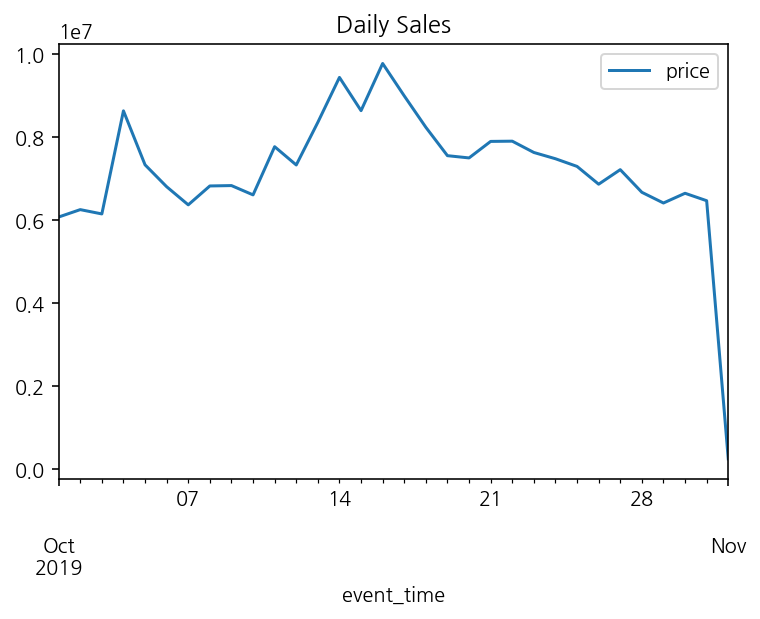

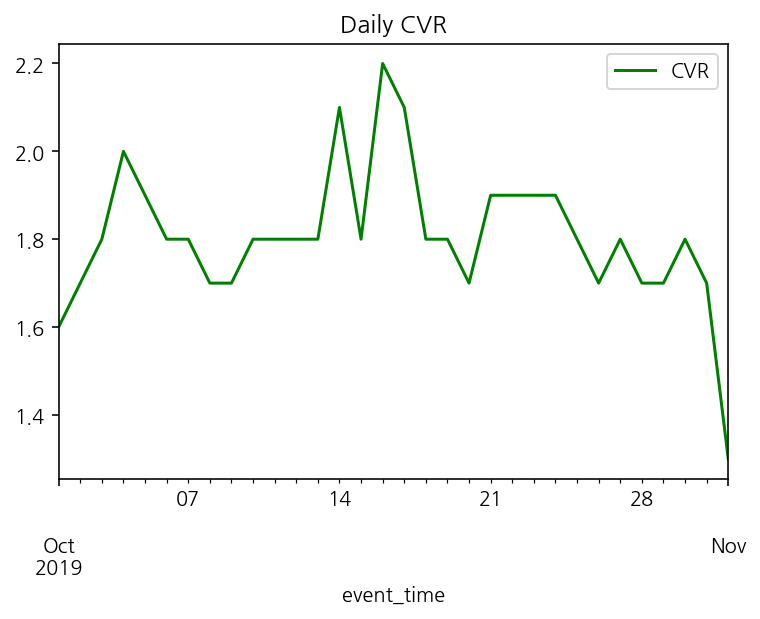

In [ ]:
# 일일 매출, CVR 시각화

sales_line = df_cvr.plot(x="event_time", y="price")
sales_line.set_title("Daily Sales")

cvr_line = df_cvr.plot(x="event_time", y="CVR", color="green")
cvr_line.set_title("Daily CVR")

# 요일별 구매 시간대 히트맵 구현

In [ ]:
# 구매한 데이터들만 따로 df_pur에 선언
purchase_cond = (df["event_type"] == "purchase")
df_pur = df.loc[purchase_cond]

# event_time열 period 타입으로 변경
df_pur["event_time"] = df_pur["event_time"].dt.to_period("H")
# event_time으로 groupby한 후 전부 더해준다
df_pur = df_pur.groupby("event_time").sum().reset_index()

df_pur["day"] = df_pur["event_time"].dt.day
df_pur["hour"] = df_pur["event_time"].dt.hour

pur_columns = ["event_time", "day", "hour", "price"]
df_pur = df_pur[pur_columns].reset_index(drop=True)

In [ ]:
df_pur_pivot = df_pur.pivot_table(values="price", index="day", columns="hour")

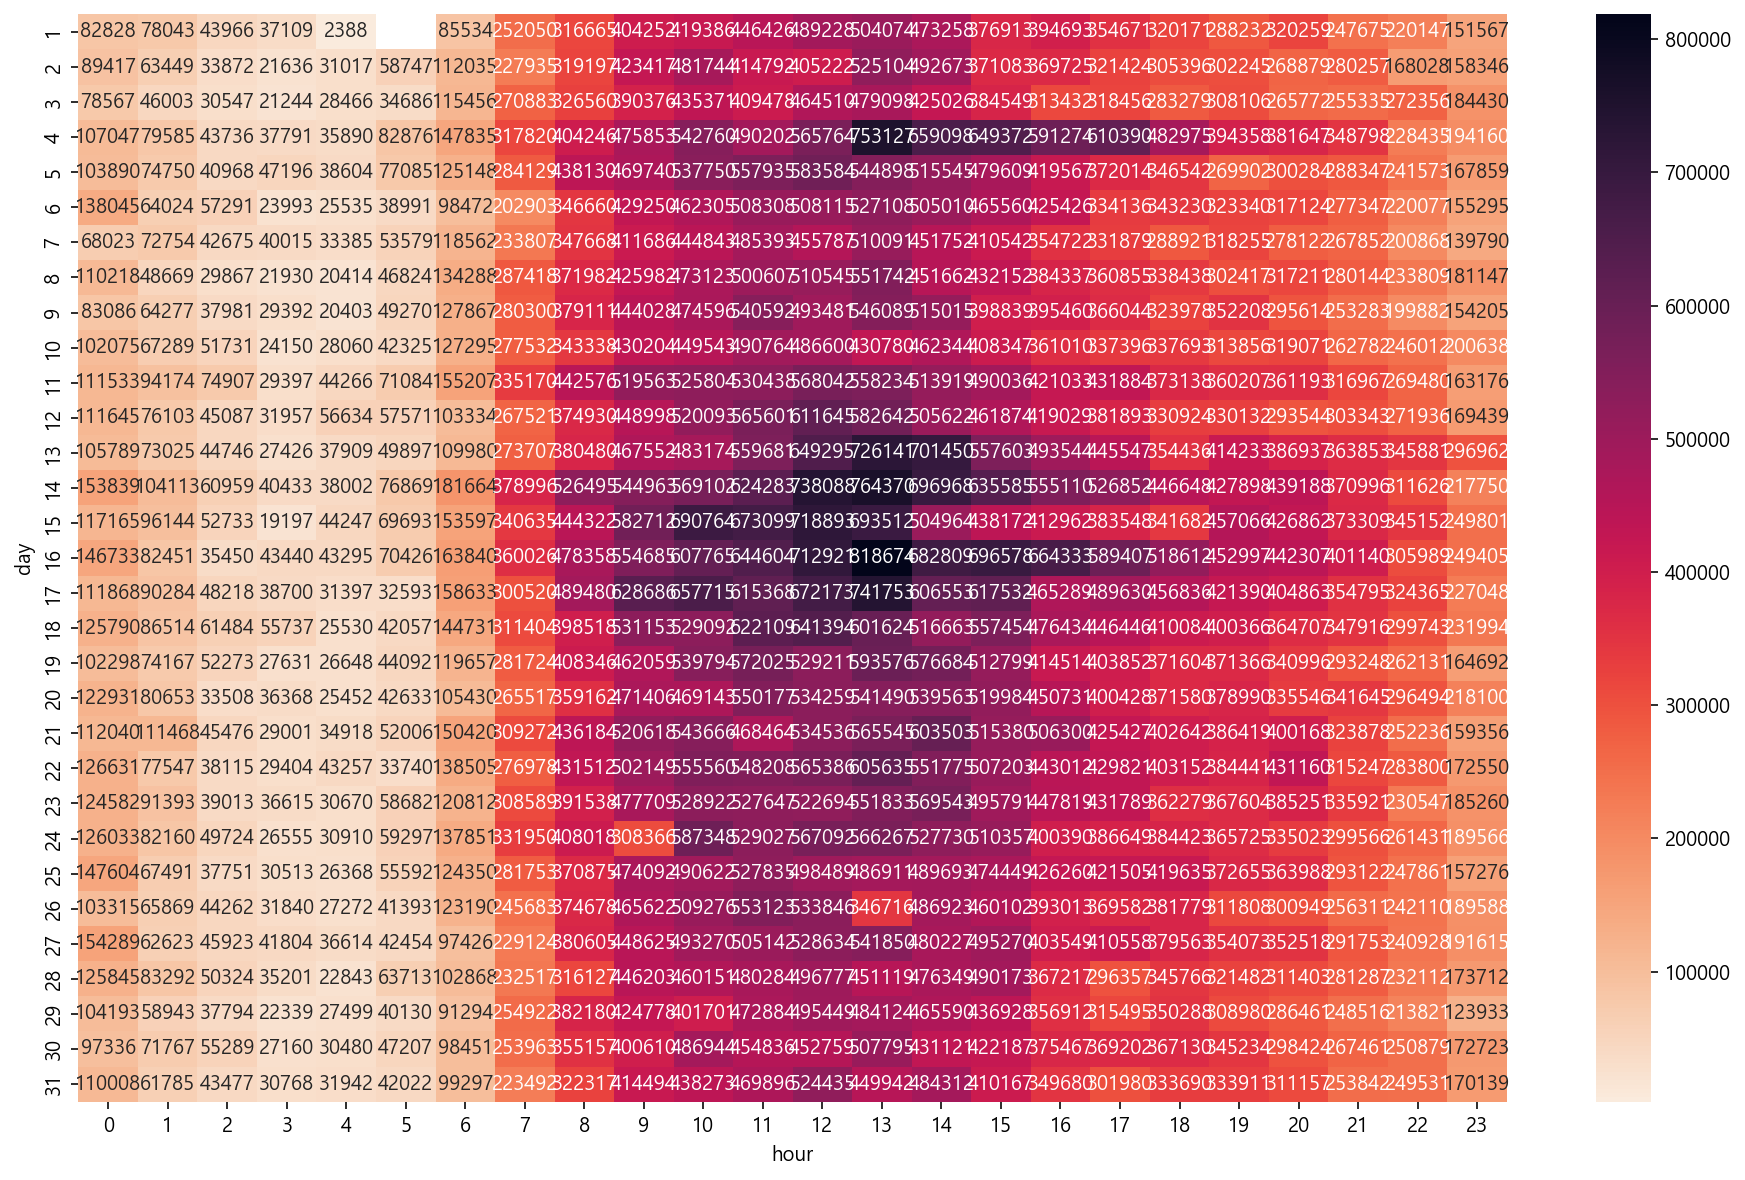

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# 그래프 크기 설정
plt.figure(figsize=(16,10))

# 히트맵 그래프 그리기
sns.heatmap(df_pur_pivot,annot = True, fmt='.0f',cmap='rocket_r')

# 그래프 표현
plt.show()

### 요일,시간별 히트맵

In [24]:
df_pur_week = df.loc[df['event_type']=='purchase']

df_pur_week['event_time'] = df_pur_week['event_time'].dt.to_period('H')
df_pur_week = df_pur_week.groupby('event_time').sum().reset_index()
df_pur_week['day'] = df_pur_week['event_time'].dt.weekday
df_pur_week['hour'] = df_pur_week['event_time'].dt.hour
df_pur_week = df_pur_week[['event_time','day','hour','price']].reset_index(drop=True)

df_pur_week

event_time  day  hour      price
0    2019-10-01 04:00    1     4    2387.84
1    2019-10-01 06:00    1     6   85533.96
2    2019-10-01 07:00    1     7  252050.18
3    2019-10-01 08:00    1     8  316664.79
4    2019-10-01 09:00    1     9  404252.06
..                ...  ...   ...        ...
738  2019-10-31 23:00    3    23  170138.77
739  2019-11-01 00:00    4     0   82827.54
740  2019-11-01 01:00    4     1   78043.44
741  2019-11-01 02:00    4     2   43966.35
742  2019-11-01 03:00    4     3   37108.56

[743 rows x 4 columns]

In [25]:
df_pivot_week = df_pur_week.pivot_table(values='price', index='day', columns='hour')
df_pivot_week = df_pivot_week.round(0)

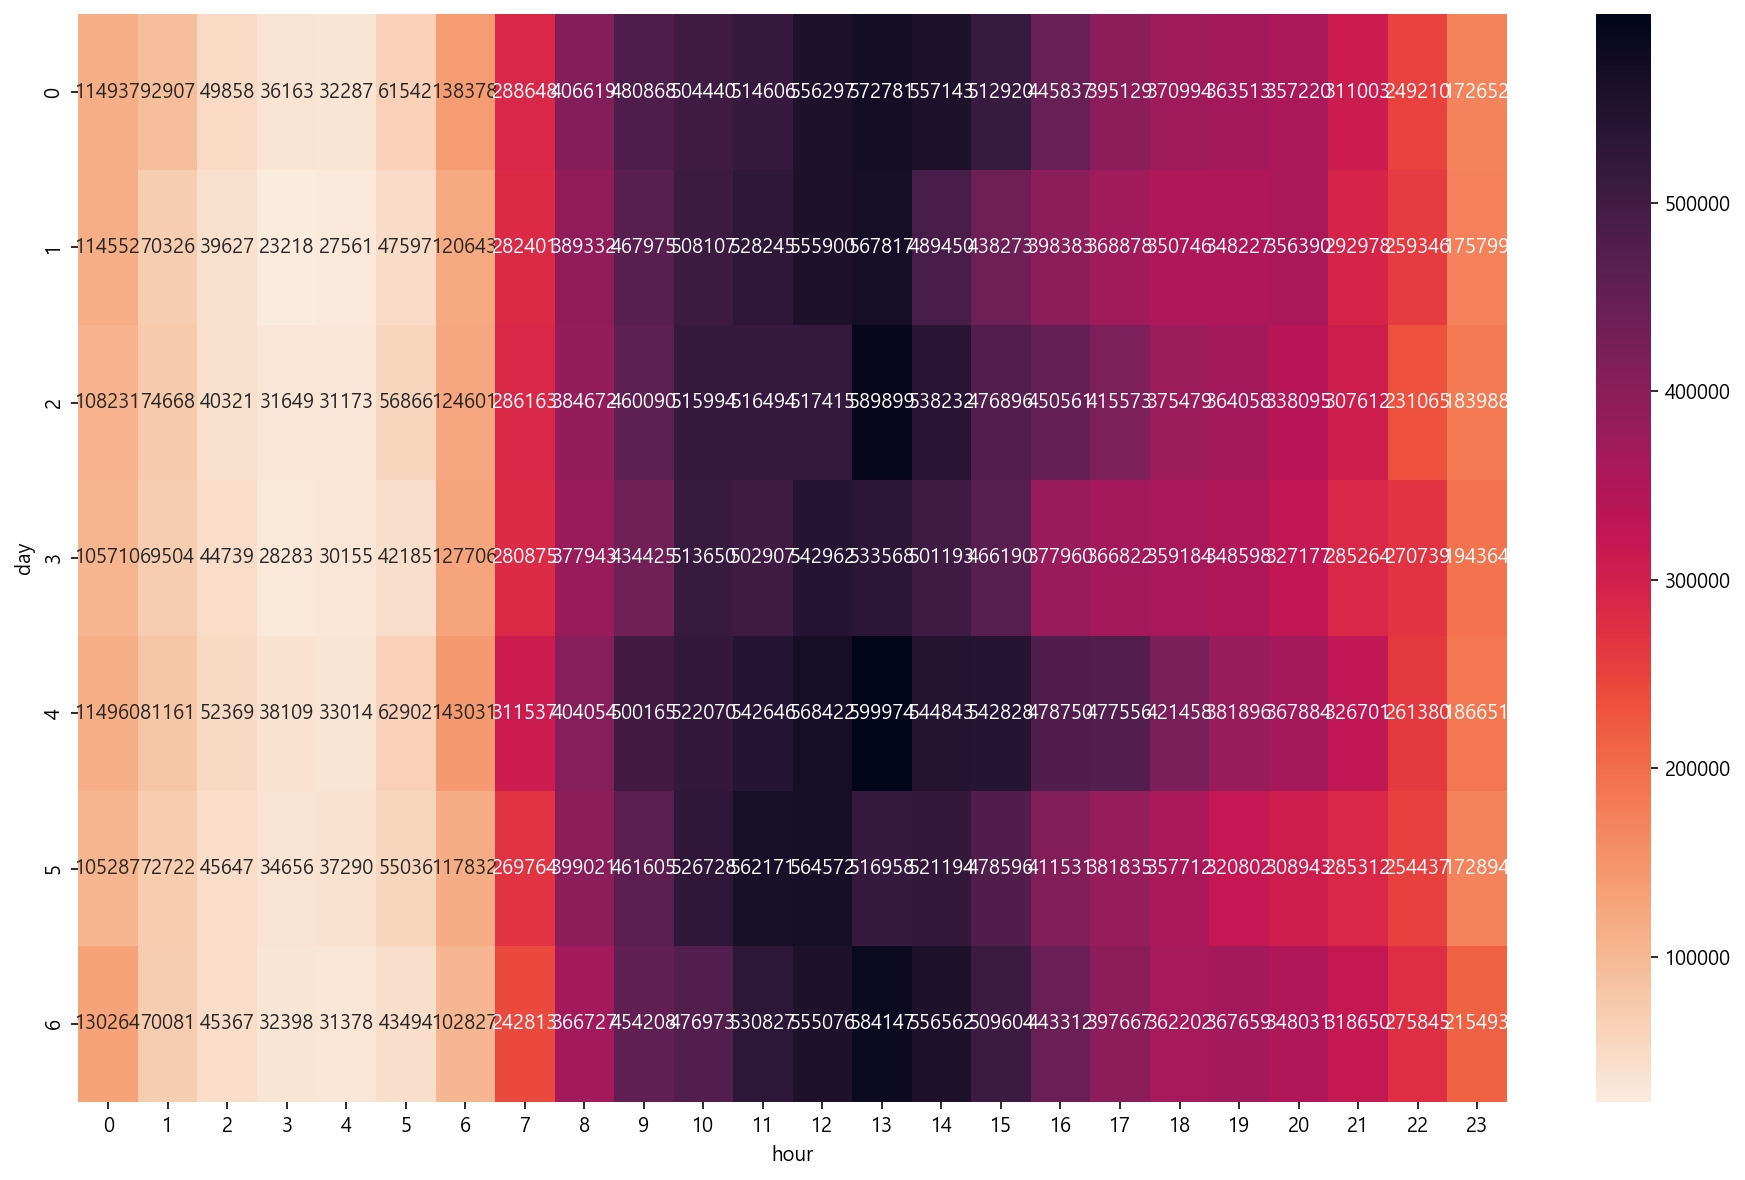

In [26]:
# 그래프 크기 설정
plt.figure(figsize=(16,10))

# 히트맵 그래프 그리기
sns.heatmap(df_pivot_week,annot = True, fmt='.0f',cmap='rocket_r')

# 그래프 표현
plt.show()

### category_code 기준 히트맵 제작

smartphone, video, kitchen 주간 히트맵

In [ ]:
df_middle = df.copy()
df_middle['category_code'] = df_middle["category_code"].str.split(".").str[1]

In [ ]:
def week(df,category,type):
    df_1 = df.loc[df['category_code']==category]
    df_1 = df_1.loc[df_1['event_type']==type]
    
    df_1['event_time'] = df_1['event_time'].dt.to_period('H')
    df_1 = df_1.groupby('event_time').count().reset_index()
    df_1['day'] = df_1['event_time'].dt.weekday
    df_1['hour'] = df_1['event_time'].dt.hour
    df_1 = df_1[['event_time','day','hour','price']].reset_index(drop=True)
    df_1 = df_1.pivot_table(values='price', index='day', columns='hour')
    df_1 = df_1.round(0)
    # 그래프 크기 설정
    plt.figure(figsize=(16,10))

    # 히트맵 그래프 그리기
    sns.heatmap(df_1, annot = True, fmt='.0f',cmap='rocket_r')

    # 그래프 표현
    plt.show()


smartphone 기준

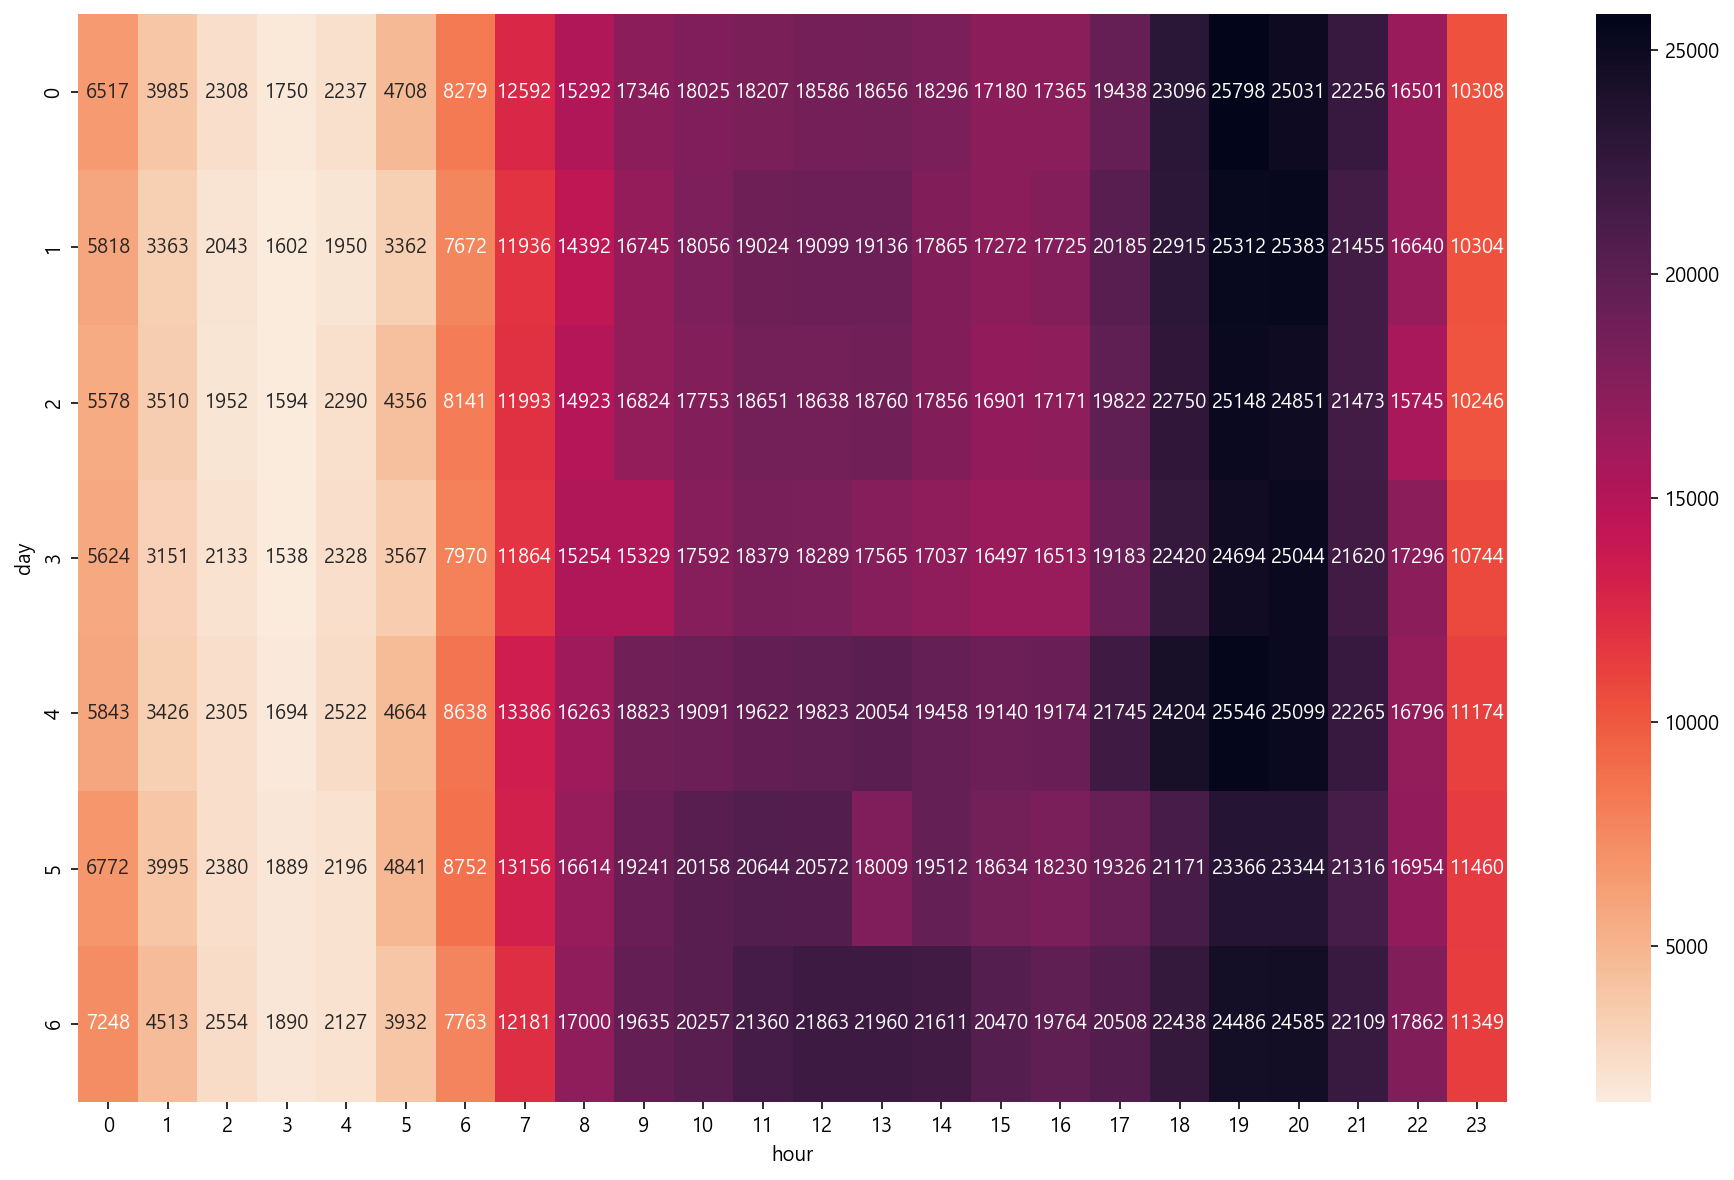

In [ ]:
# smartphone

week(df_middle,'smartphone','view')

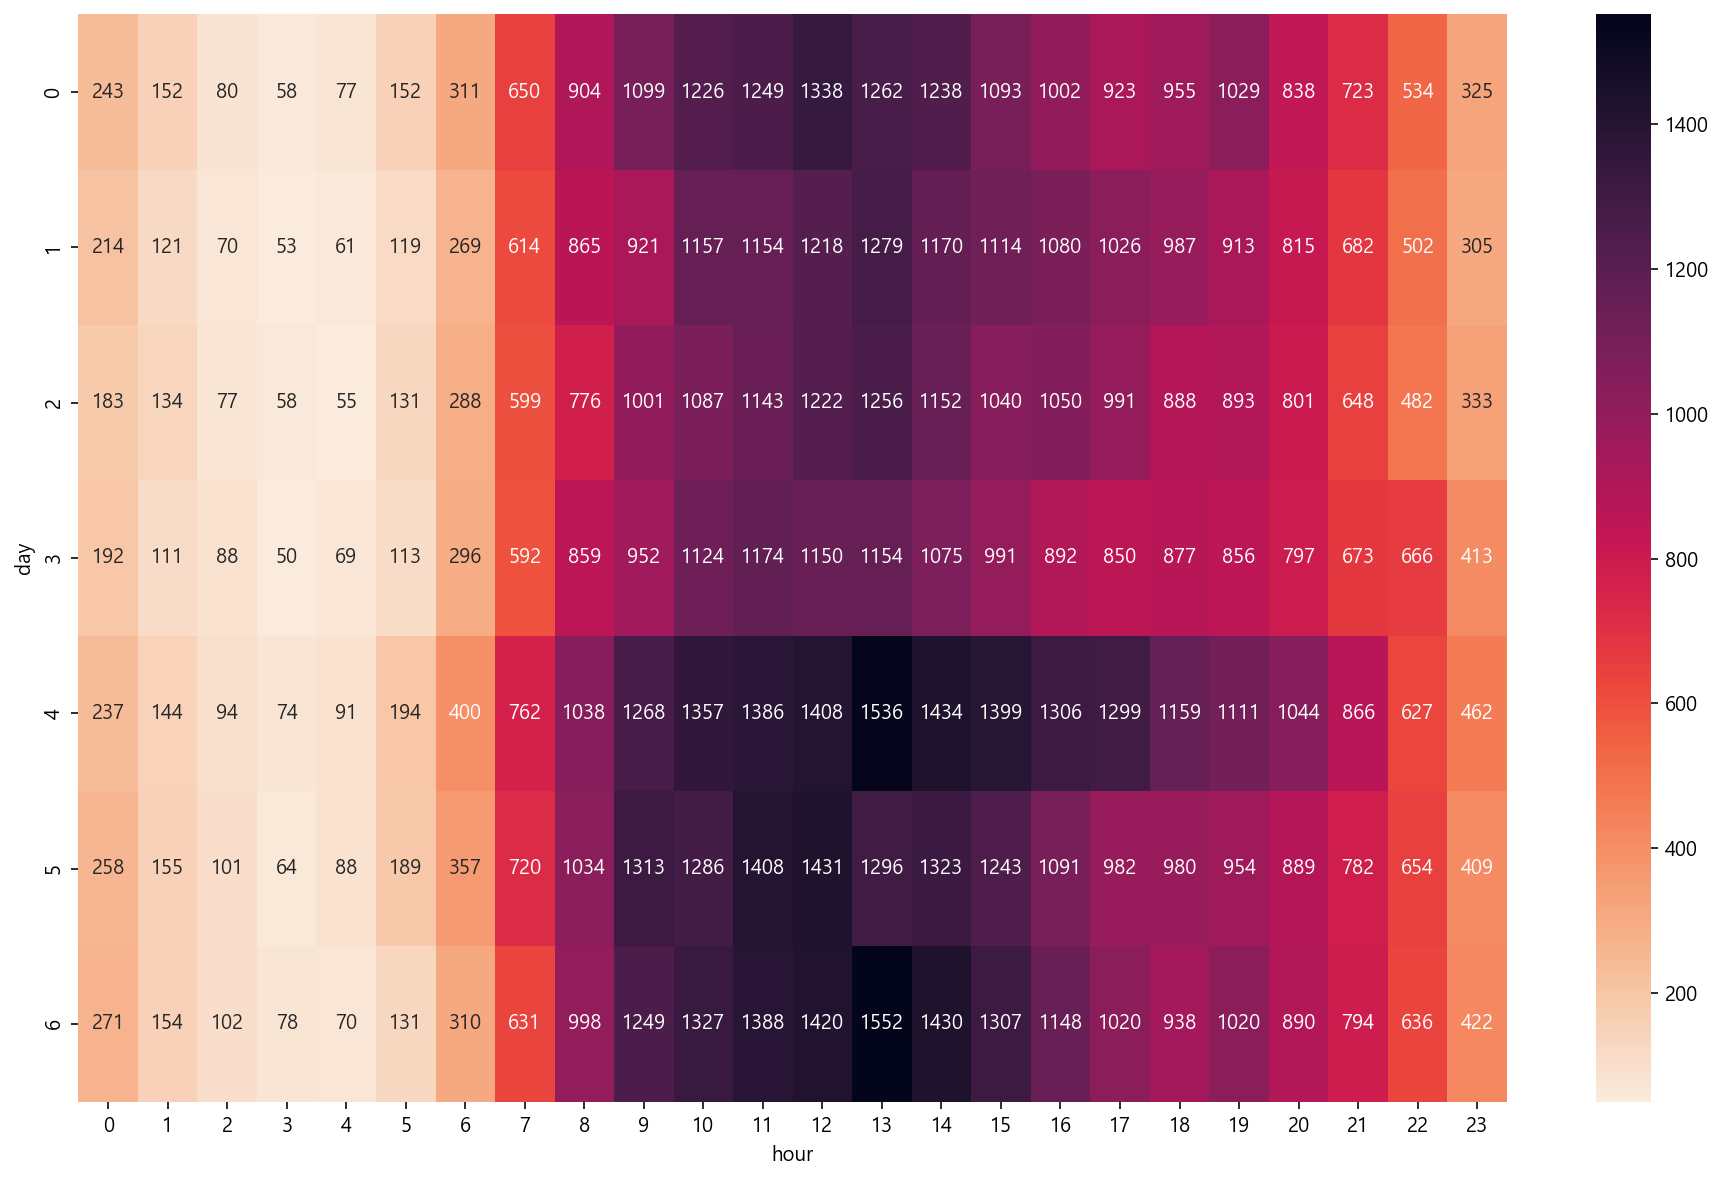

In [ ]:
week(df_middle,'smartphone','cart')

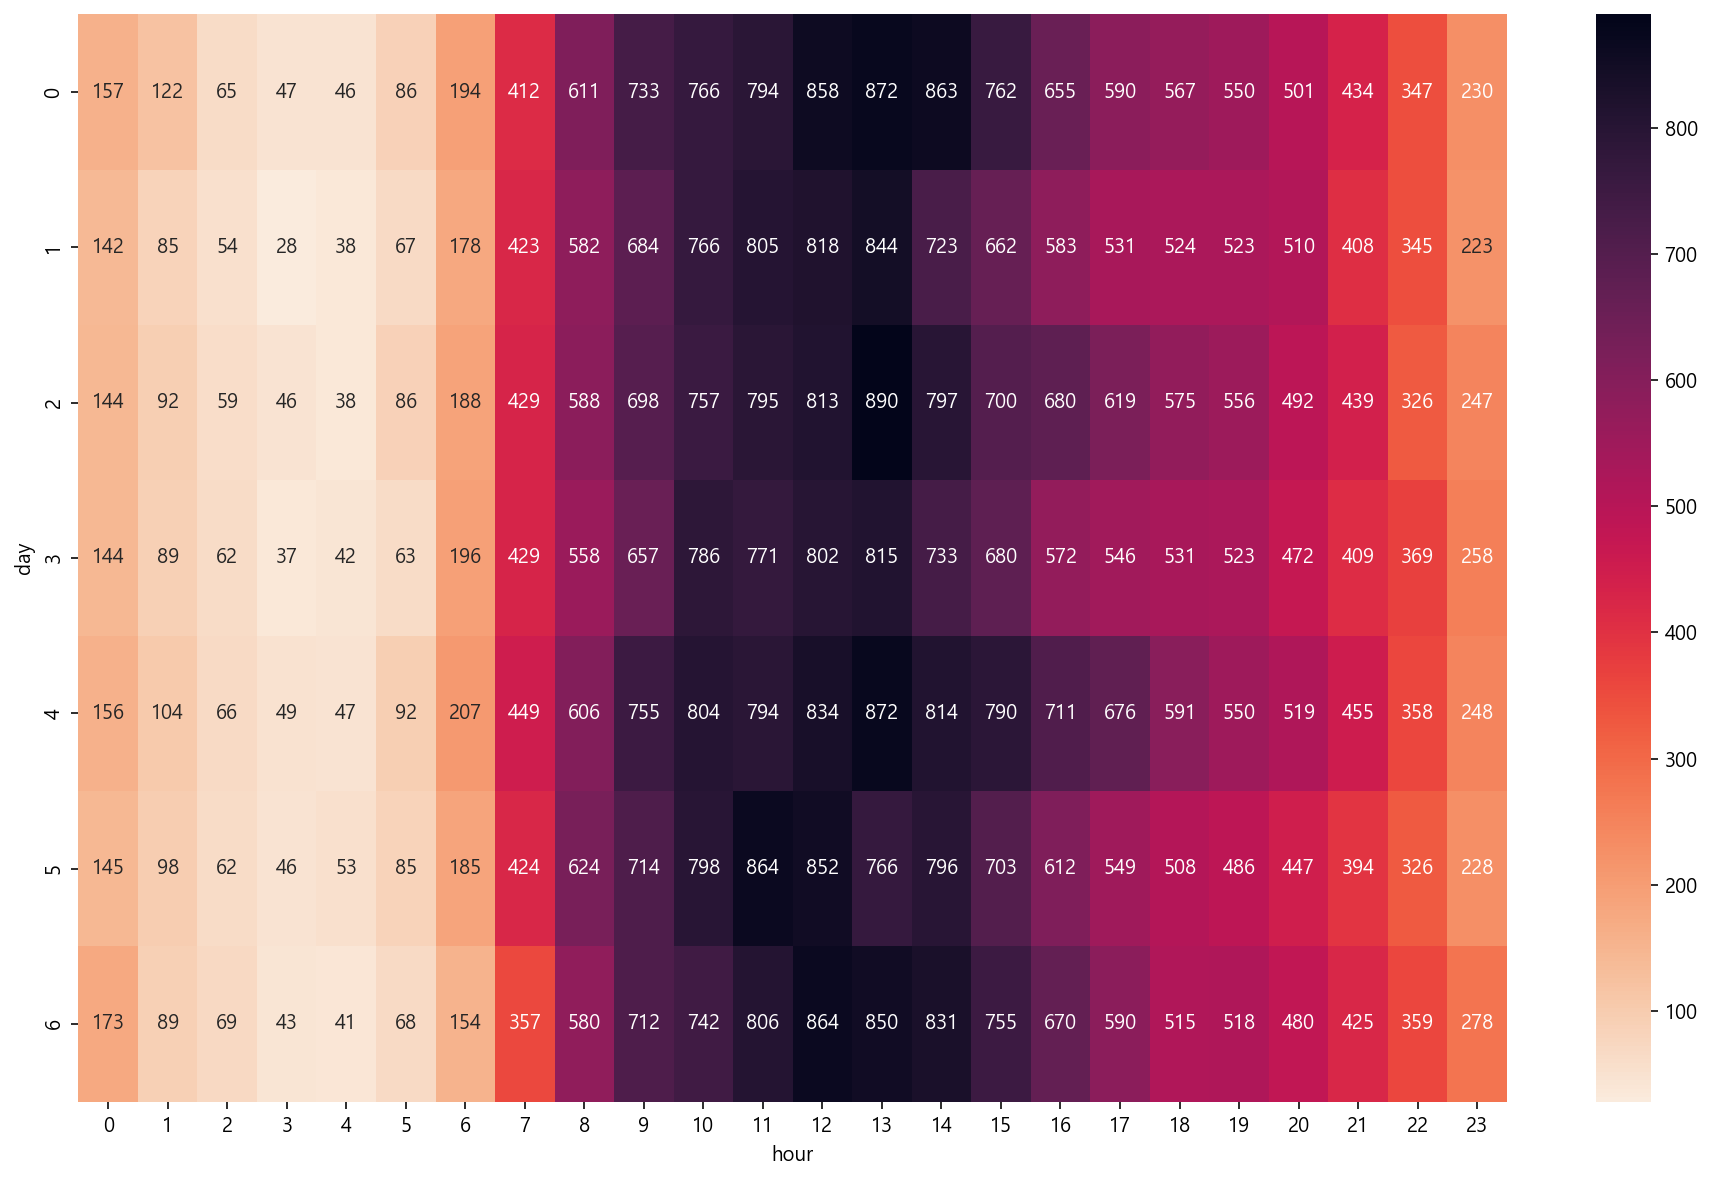

In [ ]:
week(df_middle,'smartphone','purchase')

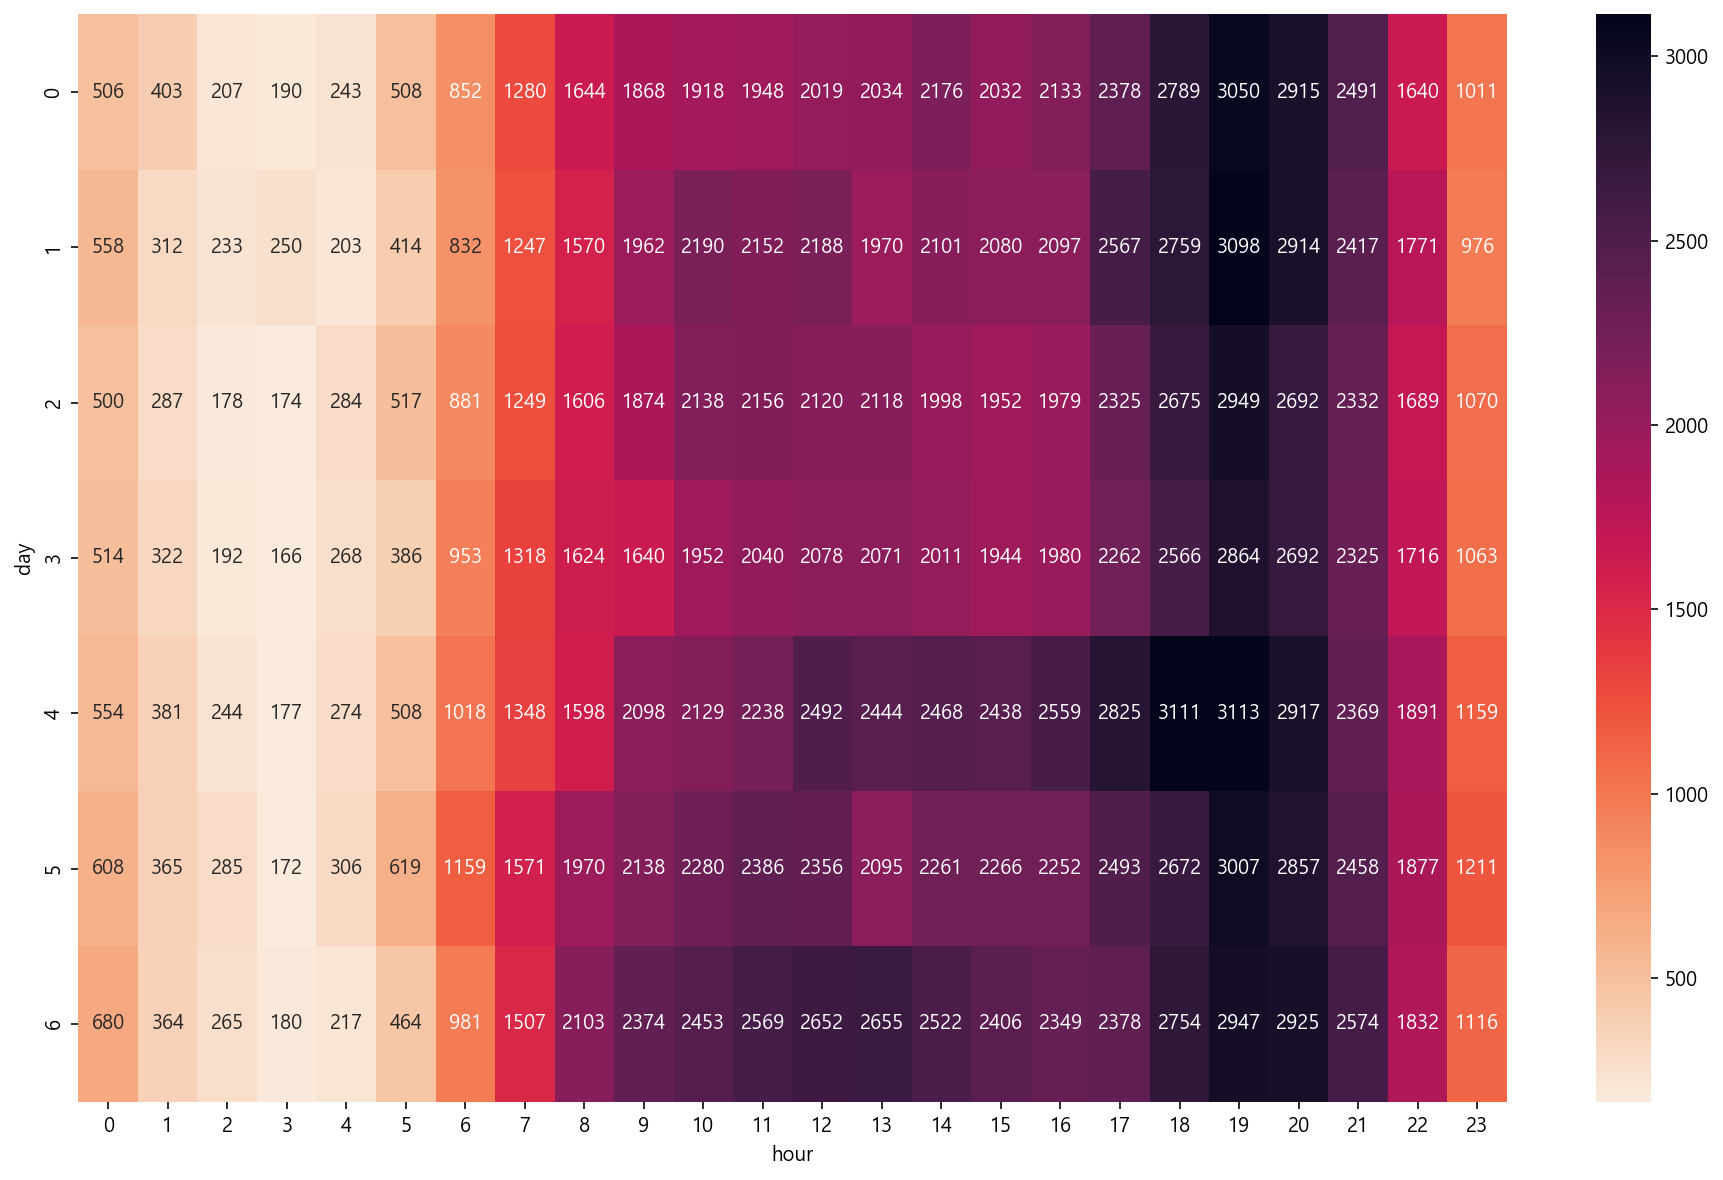

In [ ]:
# video

week(df_middle,'video','view')

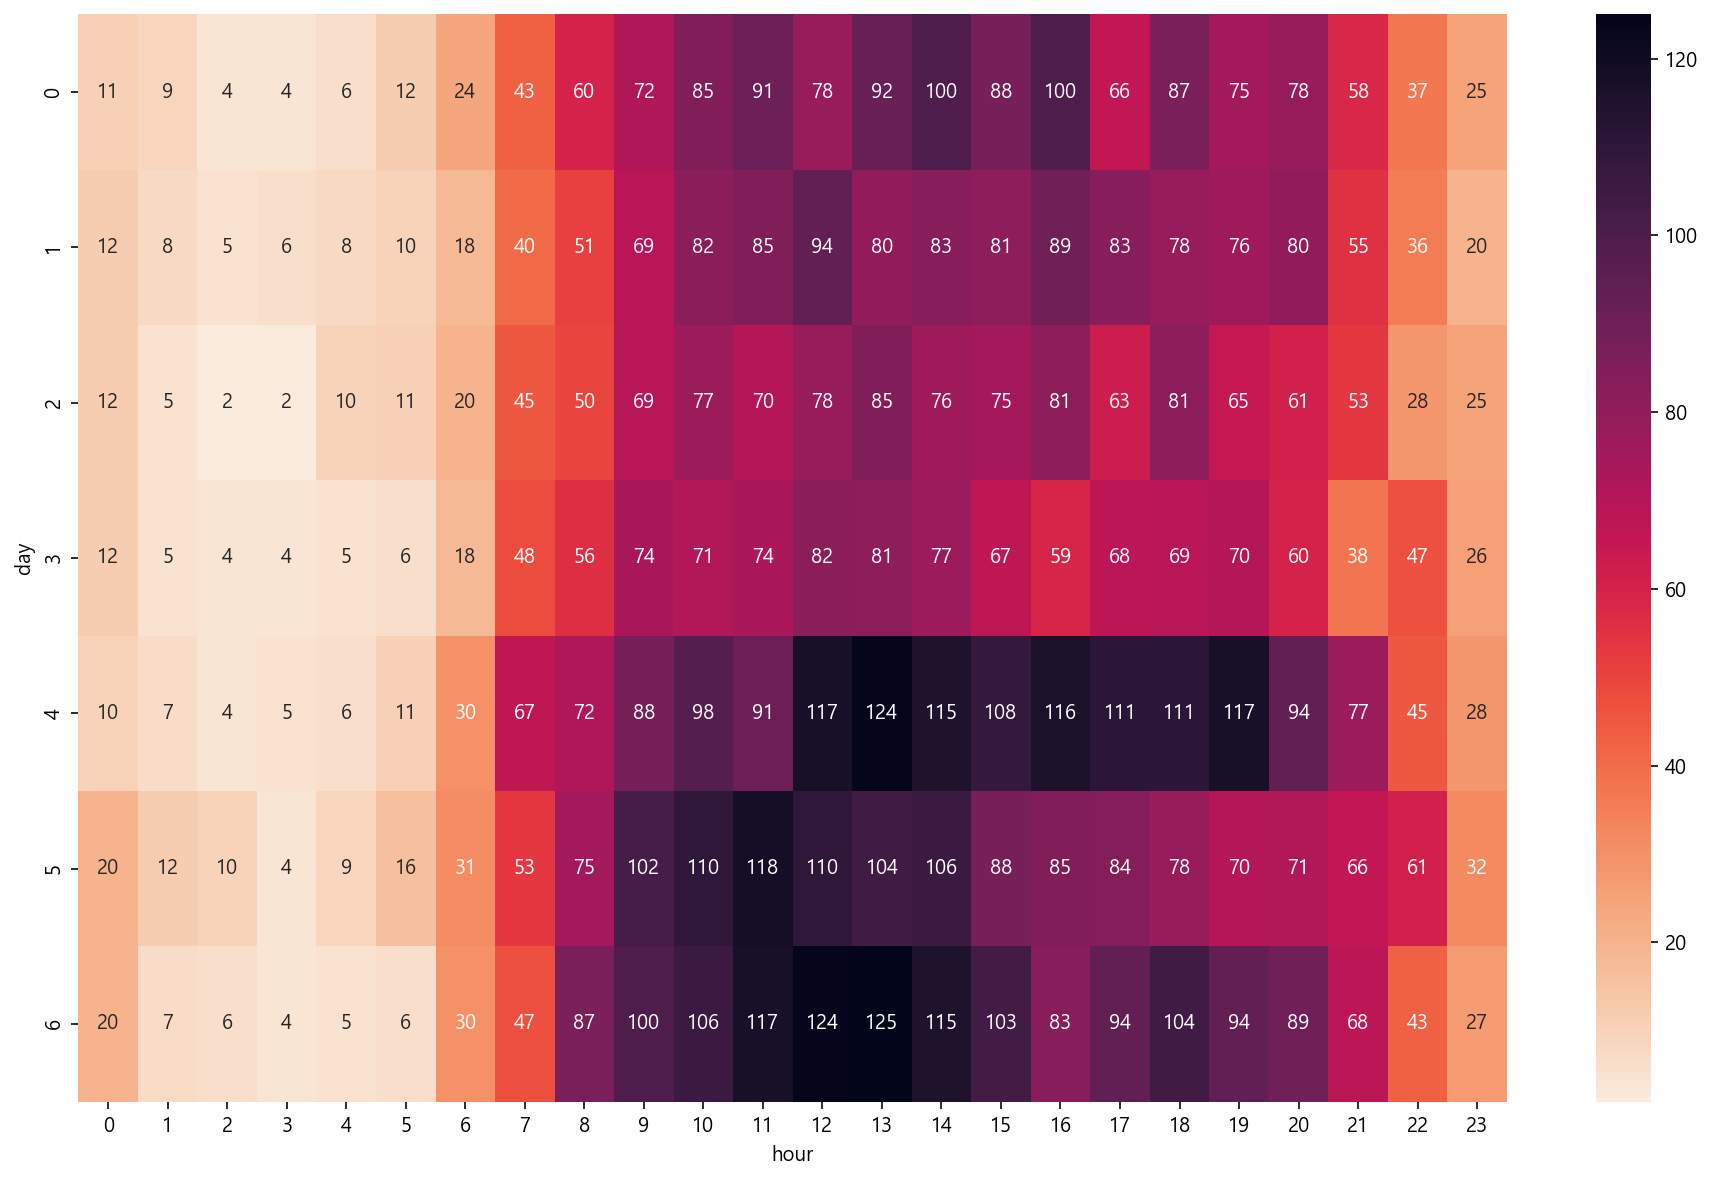

In [ ]:
week(df_middle,'video','cart')

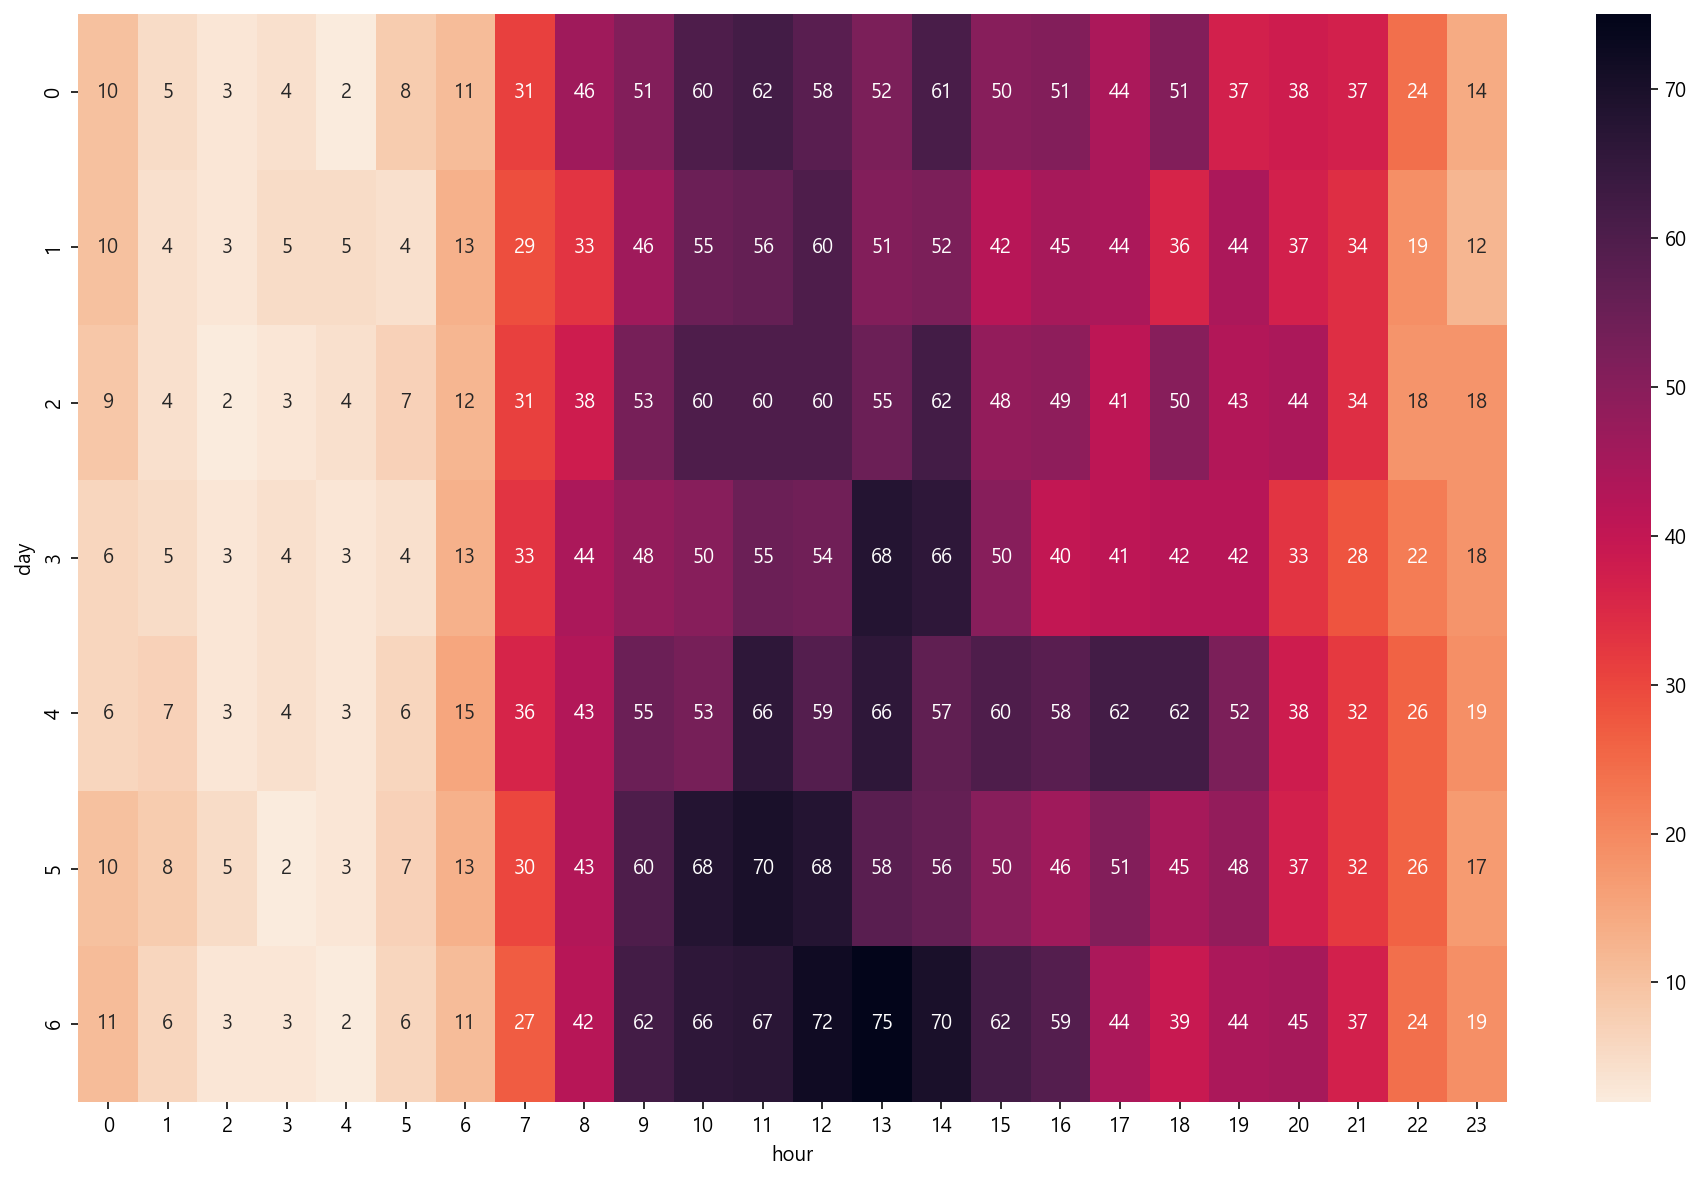

In [ ]:
week(df_middle,'video','purchase')

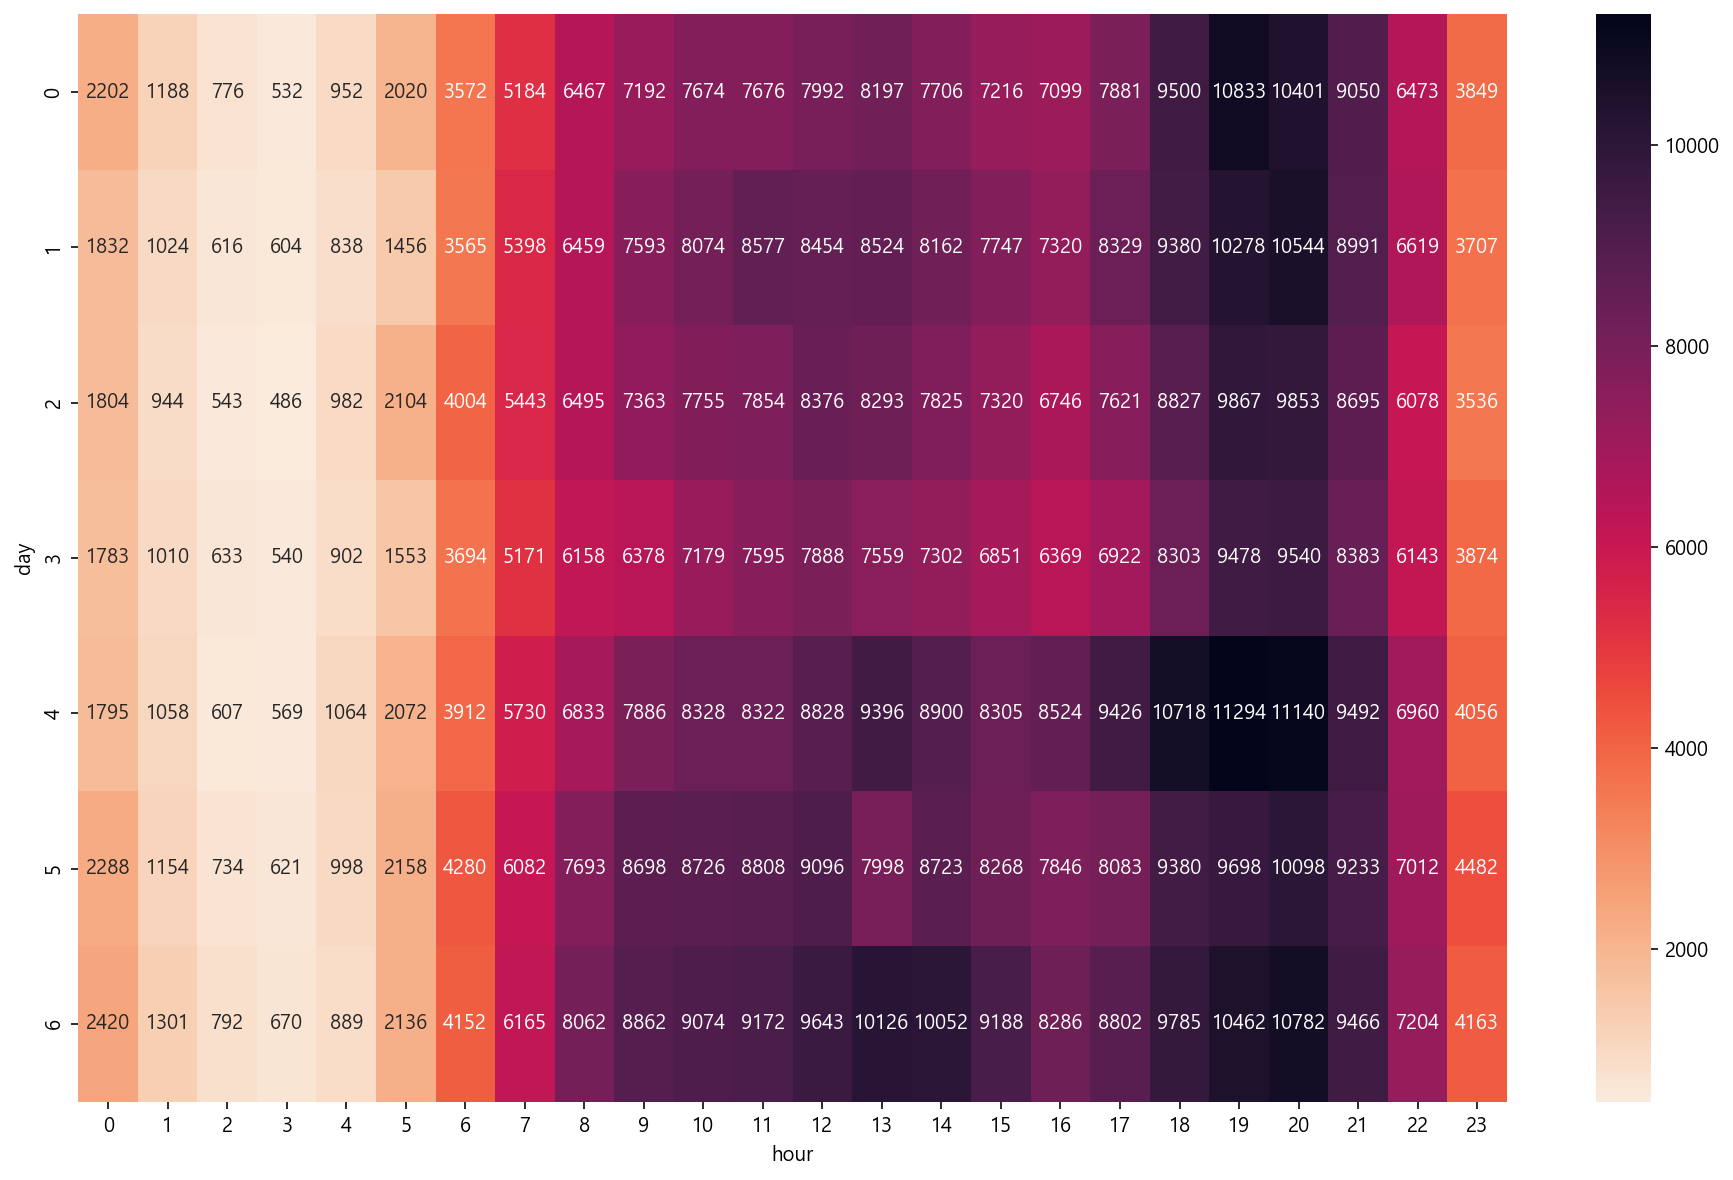

In [ ]:
# kitchen

week(df_middle,'kitchen','view')

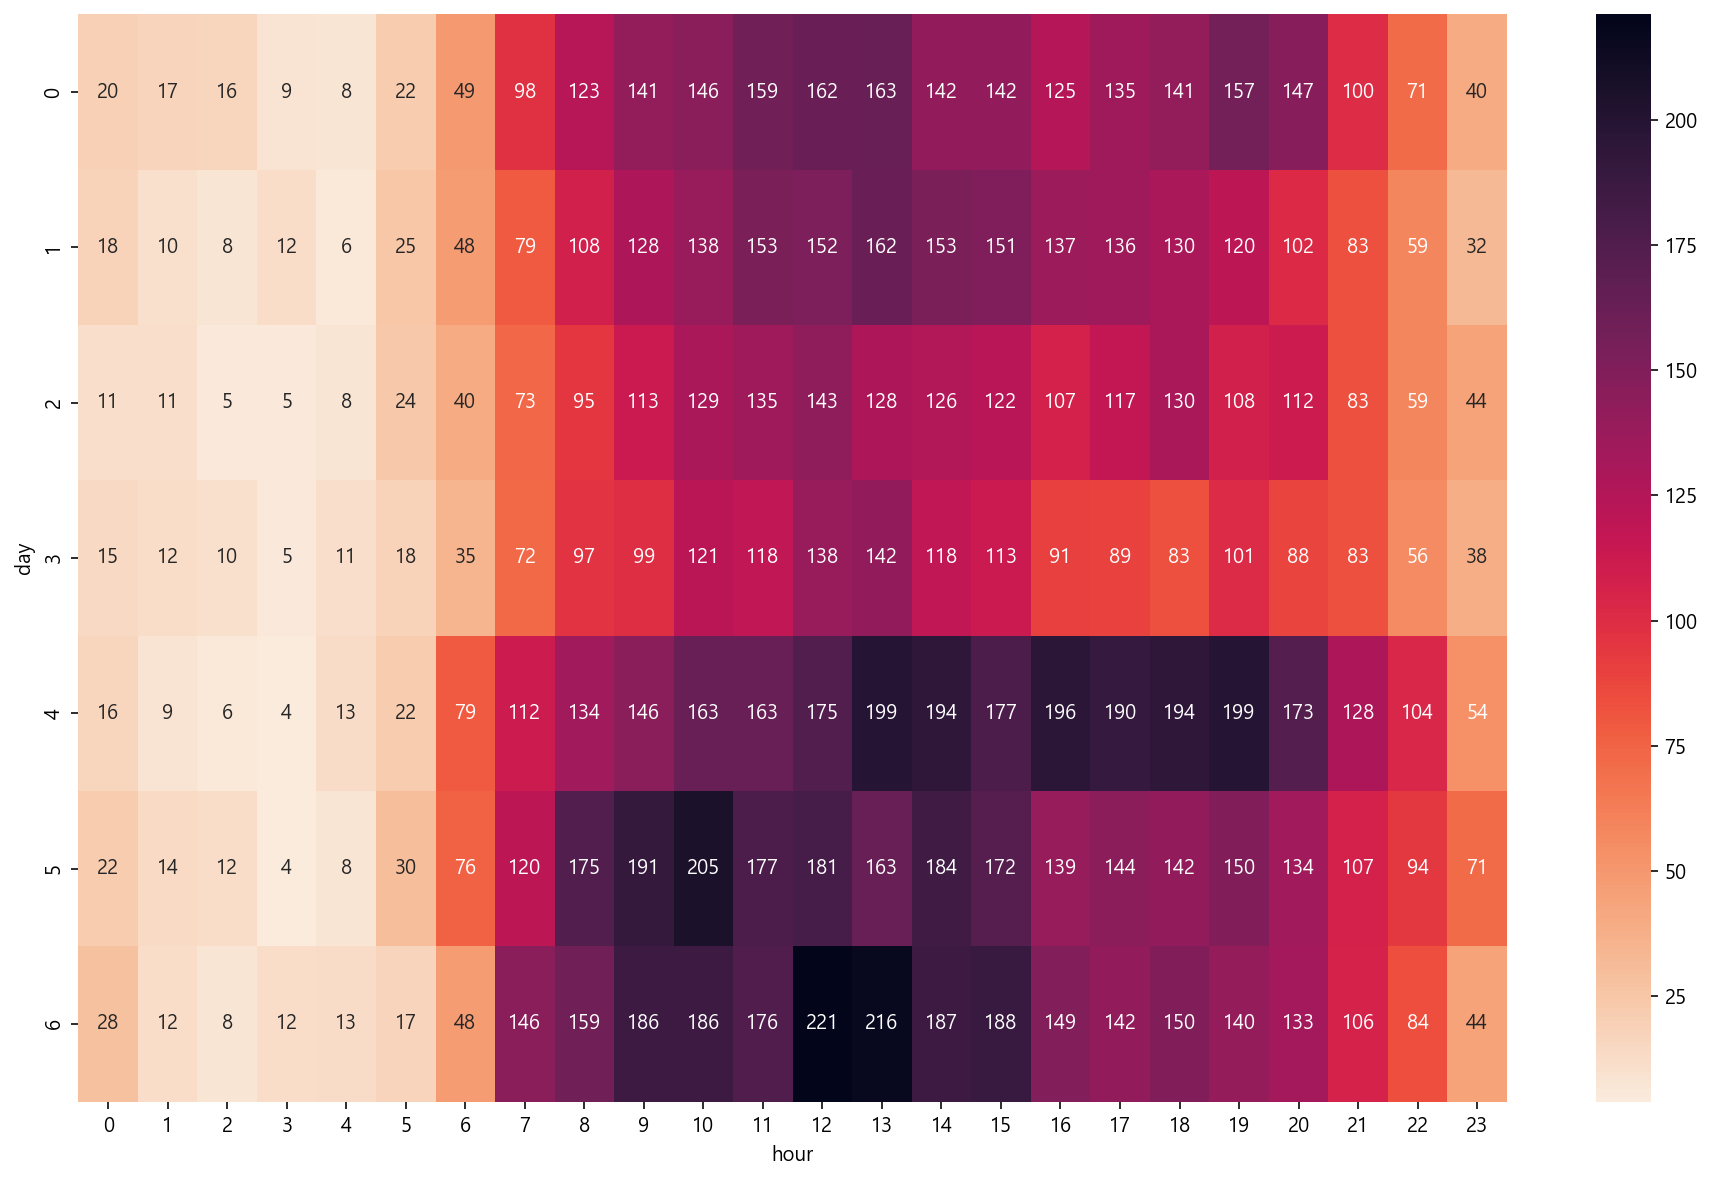

In [ ]:
week(df_middle,'kitchen','cart')

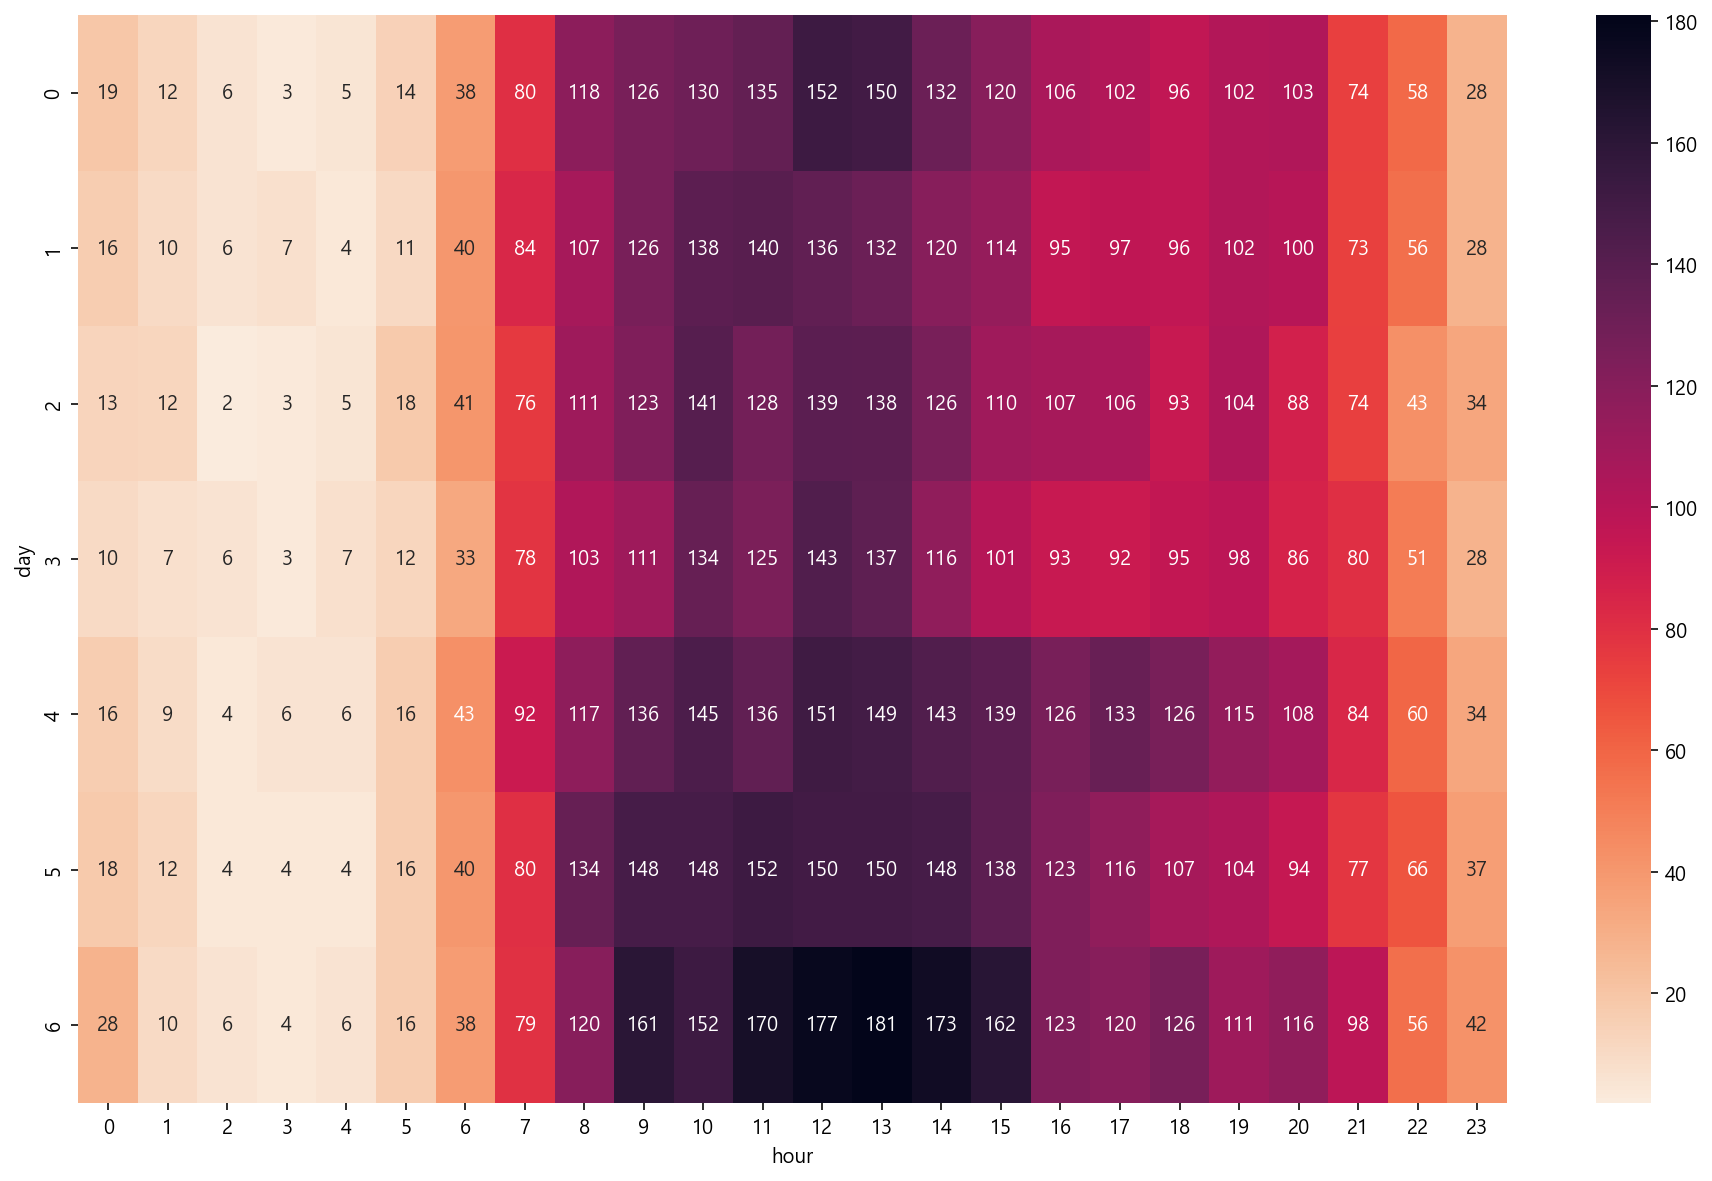

In [ ]:
week(df_middle,'kitchen','purchase')

# user_id기준 user_session이 변하는 시간 체크

In [ ]:
from datetime import timedelta

def sess_diff(df, user_id):
    user_cond = (df["user_id"] == user_id)
    user_sess = df[user_cond]["user_session"]
    user_time = df[user_cond]["event_time"]
    user_event = df[user_cond]["event_type"]
    length = len(user_sess)

    diff_sess = {}
    date_time = []
    time_diff = []
    sess_idx = []
    sess_data = []
    event_data = []

    date_time.append(user_time.iloc[0])
    time_diff.append(timedelta(seconds=0))
    sess_idx.append(0)
    sess_data.append(user_sess.iloc[0])
    event_data.append(user_event.iloc[0])

    i = 1
    while i < length-1:

        if user_sess.iloc[i] != user_sess.iloc[i+1]:
            date_time.append(user_time.iloc[i+1])
            time_diff.append(user_time.iloc[i+1] - user_time.iloc[i])
            sess_idx.append(i+1)
            sess_data.append(user_sess.iloc[i+1])
            event_data.append(user_event.iloc[i+1])

        i+=1

    diff_sess["event_time"] = date_time
    diff_sess["event_type"] = event_data
    diff_sess["time_diff"] = time_diff
    diff_sess["sess_idx"] = sess_idx
    diff_sess["sess_data"] = sess_data
    
    sess_diff_df = pd.DataFrame(diff_sess)
    
    return sess_diff_df

In [ ]:
sess_diff(df, 513605798)

event_time event_type       time_diff  sess_idx  \
0 2019-10-01 07:23:28+04:00       view 0 days 00:00:00         0   
1 2019-10-07 17:24:58+04:00       view 0 days 00:36:54      1158   

                              sess_data  
0  fb075266-182d-4c11-b5f7-4e4dcdabd4a7  
1  d899b518-ff25-4920-a06d-c9032e2bb7ca

In [ ]:
sess_diff(df, 542048657)

event_time event_type       time_diff  sess_idx  \
0  2019-10-22 07:06:12+04:00       view 0 days 00:00:00         0   
1  2019-10-22 07:13:02+04:00       view 0 days 00:02:05         4   
2  2019-10-22 07:27:40+04:00       view 0 days 00:08:20        14   
3  2019-10-22 08:36:22+04:00       view 0 days 00:35:41        43   
4  2019-10-22 14:45:02+04:00       view 0 days 00:02:25      1178   
5  2019-10-29 15:11:54+04:00       view 6 days 23:07:50      1522   
6  2019-10-29 15:12:43+04:00       view 0 days 00:00:49      1523   
7  2019-10-29 15:17:01+04:00       view 0 days 00:01:11      1539   
8  2019-10-29 15:48:33+04:00       view 0 days 00:10:28      1617   
9  2019-10-29 15:55:10+04:00       view 0 days 00:00:48      1653   
10 2019-10-30 20:59:14+04:00       view 1 days 04:56:39      1698   

                               sess_data  
0   0e5e2c6a-1349-41a0-ada3-b763523a50ab  
1   b766ffa1-a88e-4574-a4cb-bec08bd68414  
2   fe24d407-2b96-4d8f-b4ef-10e4567c8961  
3   cfb90a35-9575-495c-b6aa-48ddca2a7a9c  
4   f3fde14e-c022-446a-9629-1a85f3102a8e  
5   ccb2c18e-da99-4520-9dbe-5ad76ede3eb2  
6   6fca5b5f-be98-4d3f-9e83-101251d23e67  
7   09dc9390-ddbf-4b66-a417-32ea55c13642  
8   218dd8bb-ccf1-4d51-bd57-4f8b782c8d70  
9   43badaee-56d6-4018-9d4d-b20f57bfc0e4  
10  2170cbfe-977d-4ed5-a0bc-8c12165082e5

In [ ]:
sess_diff(df, 513851612)

event_time event_type        time_diff  sess_idx  \
0  2019-10-02 12:48:45+04:00       view  0 days 00:00:00         0   
1  2019-10-12 21:41:06+04:00       view 10 days 08:51:43         2   
2  2019-10-24 11:32:21+04:00       view 11 days 13:47:13        10   
3  2019-10-24 12:11:44+04:00       view  0 days 00:31:15        15   
4  2019-10-24 12:27:05+04:00       view  0 days 00:03:47        29   
5  2019-10-24 23:11:52+04:00       view  0 days 01:30:41       603   
6  2019-10-24 23:19:03+04:00       view  0 days 00:01:56       611   
7  2019-10-25 00:13:36+04:00       view  0 days 00:30:54       680   
8  2019-10-25 11:01:47+04:00       view  0 days 10:40:03       688   
9  2019-10-25 12:15:38+04:00       view  0 days 01:10:43       693   
10 2019-10-25 12:37:21+04:00       view  0 days 00:06:16       705   
11 2019-10-25 12:56:14+04:00       view  0 days 00:01:38       723   
12 2019-10-25 18:12:40+04:00       view  0 days 05:05:07       753   
13 2019-10-26 07:48:27+04:00       view  0 days 11:57:00       842   
14 2019-10-26 18:18:19+04:00       view  0 days 10:21:43       857   
15 2019-10-27 08:43:12+04:00       view  0 days 14:23:16       863   
16 2019-10-28 16:45:23+04:00       view  1 days 07:47:04       887   

                               sess_data  
0   93e8f122-ace0-4bc1-991b-bb8734d3ca0f  
1   edb4d48c-bfa8-4504-95f5-a69830171637  
2   89262cb0-471a-4374-b048-79ccdf958137  
3   09675282-69c7-4f8c-bda4-4053ab644b14  
4   2183f046-46f1-4ff6-96ef-f74986e7c8a1  
5   261f3793-c39d-4628-9e8f-3d532a2add27  
6   ccef2fc7-2fb4-41cf-9e01-74c42f4fdf83  
7   98742a85-b4a0-468a-9572-a8bd1ce7e453  
8   d0ae4449-43de-41d6-a5b0-24008c5ee9d3  
9   2f04a2b9-7ef9-4ca1-baea-98963c9c7376  
10  1aedde60-9a20-44f4-84bc-0389e343fdfa  
11  81486517-7c2a-4d72-ba5d-0c50fb13ae4d  
12  e8fa5379-41fc-4bb0-93e3-0ac97c85999b  
13  a38b197f-07cf-41d6-85d0-5c84daa414f1  
14  ca98c147-db34-423d-9277-123e129d7706  
15  15b8e1fd-ff92-46e2-bd19-d982e8e19719  
16  9136ed08-8c9b-4c5c-821e-01559468a967

# 퍼널 분석

In [ ]:
# Bigquery 활용하여 퍼널 데이터 담은 csv 생성 시도
funnel_path = "D:/cp2_dataset/funnel_prac.csv"
funnel_df = pd.read_csv(funnel_path)
funnel_df.head()

category_code      view    cart  cart_pct  purchase  \
0       electronics.smartphone  10614666  549743      0.05    338018   
1  electronics.audio.headphone   1017685   51142      0.05     30503   
2     medicine.tools.tonometer     13962     522      0.04       310   
3           electronics.clocks   1562600   40280      0.03     26516   
4         electronics.video.tv   1216925   41658      0.03     25241   

   purchase_pct   cvr   total_price  price_pct  
0          0.61  0.03  5.430804e+09       0.44  
1          0.60  0.03  1.073410e+08       0.01  
2          0.59  0.02  7.544200e+05       0.00  
3          0.66  0.02  3.973419e+08       0.03  
4          0.61  0.02  5.605854e+08       0.05

In [ ]:
funnel_path = "D:/cp2_dataset/funnel_cat_split.csv"
funnel_df = pd.read_csv(funnel_path)
funnel_df.head(10)

sub_cat_1      view    cart  cart_pct  purchase  purchase_pct   cvr  \
0   smartphone  10745559  550844      0.05    338903          0.62  0.03   
1        audio   1573978   54203      0.03     36790          0.68  0.02   
2       clocks   1562600   40280      0.03     26516          0.66  0.02   
3        video   1229833   41805      0.03     25323          0.61  0.02   
4    technique    345980    9951      0.03      7598          0.76  0.02   
5       tablet    301839    9132      0.03      5603          0.61  0.02   
6         iron    157493    4093      0.03      3653          0.89  0.02   
7      kitchen   4513150   71502      0.02     60478          0.85  0.01   
8  environment   1396558   28078      0.02     21848          0.78  0.02   
9        tools    700416   10809      0.02      7814          0.72  0.01   

    total_price  price_pct  
0  5.434205e+09       0.44  
1  2.155717e+08       0.02  
2  3.973419e+08       0.03  
3  5.693254e+08       0.05  
4  1.894731e+07       0.00  
5  1.081085e+08       0.01  
6  1.439849e+07       0.00  
7  1.108413e+09       0.09  
8  2.653710e+08       0.02  
9  1.183118e+08       0.01

In [ ]:
funnel_df["price_pct"].value_counts().sort_values(ascending=True)

0.44     1
0.05     1
0.09     1
0.07     2
0.02     4
0.03     4
0.01     7
0.00    44
Name: price_pct, dtype: int64

In [ ]:
price_cat_cond = funnel_df["price_pct"] >= 0.05
funnel_df[price_cat_cond]

sub_cat_1      view    cart  cart_pct  purchase  purchase_pct   cvr  \
0   smartphone  10745559  550844      0.05    338903          0.62  0.03   
3        video   1229833   41805      0.03     25323          0.61  0.02   
7      kitchen   4513150   71502      0.02     60478          0.85  0.01   
15         NaN   4618005   28493      0.01     43179          1.52  0.01   
17    notebook   1104823   15627      0.01     15590          1.00  0.01   

     total_price  price_pct  
0   5.434205e+09       0.44  
3   5.693254e+08       0.05  
7   1.108413e+09       0.09  
15  8.103392e+08       0.07  
17  8.092572e+08       0.07

## 코호트 분석
- 고객 유지율 분석
    - 사이트에 얼마나 다시 방문하였는지
    - 얼마나 다시 상품을 재구매하였는지  
- 특정 고객 집단의 인사이트 발견

코호트 함수 생성

In [ ]:
video_list = ['electronics.video.tv', 'electronics.video.projector']
df[df["category_code"].str.contains("video")]["category_code"].value_counts()

electronics.video.tv               1283824
auto.accessories.videoregister      224012
computers.components.videocards      81736
electronics.camera.video             39932
electronics.video.projector          13137
Name: category_code, dtype: int64

In [ ]:
kitchen_list = df[df["category_code"].str.contains("kitchen")]["category_code"].value_counts().keys().tolist()
kitchen_list

['appliances.kitchen.dishwasher',
 'appliances.kitchen.refrigerators',
 'appliances.kitchen.cooker',
 'appliances.kitchen.meat_grinder',
 'appliances.kitchen.blender',
 'appliances.kitchen.oven',
 'appliances.kitchen.kettle',
 'appliances.kitchen.microwave',
 'furniture.kitchen.crockery',
 'appliances.kitchen.multibaker',
 'appliances.kitchen.multicooker',
 'furniture.kitchen.chair',
 'furniture.kitchen.pan',
 'appliances.kitchen.hood',
 'appliances.kitchen.hob',
 'furniture.kitchen.table',
 'appliances.kitchen.mixer',
 'appliances.kitchen.coffee_machine',
 'appliances.kitchen.grill',
 'appliances.kitchen.juicer',
 'appliances.kitchen.toster',
 'appliances.kitchen.steam_cooker',
 'appliances.kitchen.coffee_grinder']

In [ ]:
notebook_list = df[df["category_code"].str.contains("notebook")]["category_code"].value_counts().keys().tolist()
notebook_list

['computers.notebook']

In [ ]:
# 일별, 주별 코호트 분석 둘다 가능한 함수 생성
# 처음의 순 방문자 수에 비해 각 기간의 순 방문자수가 얼마나 변화하였는가를 return
def cohort_pct(df, category_name=None, brand=None, daily_or_weekly="daily"):
    # 코호트 분석 위해 컬럼 조정
    cohort_col = ["event_time", "event_type", "product_id", "category_id", "category_code", "brand", "user_id", "user_session"]
    df_co = df[cohort_col].reset_index(drop=True)

    # 구매 활동한 고객만 따로 필터링
    pur_cond = (df_co["event_type"] == "purchase")

    if category_name:
        cat_cond = (df_co["category_code"] == category_name)
        co_purchase = df_co.loc[pur_cond & cat_cond].reset_index(drop=True)
    elif brand:
        br_cond = (df_co["brand"] == brand)
        co_purchase = df_co.loc[pur_cond & br_cond].reset_index(drop=True)
    else:
        co_purchase = df_co.loc[pur_cond].reset_index(drop=True)
    
    if daily_or_weekly == "daily":
        co_purchase["event_time"] = co_purchase["event_time"].dt.strftime("%Y-%m-%d")
    else:
        co_purchase["event_time"] = co_purchase["event_time"].dt.week - 39
    
    co_purchase["OrderPeriod"] = co_purchase["event_time"]

    # 첫 번째 주문을 토대로 코호트 그룹 설정
    # 데이터프레임의 인덱스 user_id로 설정
    co_purchase.set_index("user_id", inplace=True)

    # user_id별 groupby하여 첫 주문일자 추출
    FirstOrder = co_purchase.groupby(co_purchase.index)["event_time"].min()

    # FirstOrder, co_purchase의 동일한 인덱스를 기준으로 데이터 배치하여 FirstOrdef 칼럼 추가
    co_purchase["FirstOrder"] = FirstOrder
    co_purchase.reset_index(inplace=True)

    # 첫 주문일자를 나타내는 FirstOrder와 주문별 기간 나타내는 OrdefPeriod 함께 전달하여
    # 첫 방문 기간과 주문 기간 기준으로 데이터를 그룹화
    pur_grouped = co_purchase.groupby(["FirstOrder", "OrderPeriod"])

    # 그룹화한 pur_grouped에서 user_id를 집계하여, unique 값의 개수를 nunique 함수를 통해 센다
    # -> 고객이 여러번 방문했다 하더라고 한 번으로 집계하여 월별 순 방문자수를 파악할 수 있다
    cohorts_pur = pur_grouped["user_id"].nunique()
    cohorts_pur = cohorts_pur.reset_index()

    # user_id 컬럼이 순 방문자수를 집계한 데이터이기 때문에 이름 변경해준다
    # user_id -> TotalUsers
    cohorts_pur.rename({"user_id":"TotalUsers"}, axis=1, inplace=True)

    each_period_pur = cohorts_pur["FirstOrder"].value_counts().sort_index()

    # 기간별 레이블 붙이기
    # 처음 들어온 기간은 0, 두번째 기간은 1 이런식으로 숫자 레이블을 붙인다

    cohortperiod = []

    # 32 까지 숫자가 나열된 each_period_pur 변수를 for문 사용하여 기간 생성하고 cohortperiod 리스트에 할당
    for x in each_period_pur:
        for y in range(x):
            cohortperiod.append(y)

    # 위에서 만든 cohortperiod 변수를 CohortPeriod 칼럼으로 만든다
    cohorts_pur["CohortPeriod"] = cohortperiod

    # FirstOrder (동일한 경험)과 CohortPeriod (동일한 기간) 이라는 인덱스로 만들어 본다
    cohorts_pur.set_index(["FirstOrder", "CohortPeriod"], inplace=True)

    # unstack(1)을 하게되면 생성된 멀티 인덱스 중 두번째 인덱스 (CohortPeriod)가 칼럼으로 변경되고,
    # 그 결과 y축은 코호트, x축은 기간으로 표현되는 코호트 분석의 형태를 갖추게 된다
    cohorts_pur = cohorts_pur["TotalUsers"].unstack(1)

    # 코호트 분석은 숫자가 아닌 비율로 표현되는 경우가 많다
    # 비율의 의미 : 처음의 순 방문자 수에 비해 각 기간의 순 방문자수가 얼마나 변화하였는가
    # -> 비율을 구하려면, 전체 데이터를 첫 코호트 기간의 순방문자로 나눠주면 된다
    # cohorts_pur[0] : 첫번째 칼럼 -> 각 코호트 첫번째 기간 (0일)에 대한 데이터로 구성되어 있다

    # 전체 데이터를 첫 코호트 기간의 순방문자 (cohort_pur[0])으로 나누어 준다
    # divide 함수에 axis=0을 명시해야 전체 데이터를 첫 코호트 기간의 데이터로 나눌 수 있다
    user_retention_pur = cohorts_pur.divide(cohorts_pur[0], axis=0)

    return user_retention_pur

In [ ]:
# 일별, 주별 코호트 분석 둘다 가능한 함수 생성
# 구매 횟수를 count한 데이터프레임 return
def cohort_cnt(df, category_name=None, brand=None, daily_or_weekly="daily"):
    # 코호트 분석 위해 컬럼 조정
    cohort_col = ["event_time", "event_type", "product_id", "category_id", "category_code", "brand", "user_id", "user_session"]
    df_co = df[cohort_col].reset_index(drop=True)

    # 구매 활동한 고객만 따로 필터링
    pur_cond = (df_co["event_type"] == "purchase")

    if category_name:
        cat_cond = (df_co["category_code"] == category_name)
        co_purchase = df_co.loc[pur_cond & cat_cond].reset_index(drop=True)
    elif brand:
        br_cond = (df_co["brand"] == brand)
        co_purchase = df_co.loc[pur_cond & br_cond].reset_index(drop=True)
    else:
        co_purchase = df_co.loc[pur_cond].reset_index(drop=True)
    
    if daily_or_weekly == "daily":
        co_purchase["event_time"] = co_purchase["event_time"].dt.strftime("%Y-%m-%d")
    else:
        co_purchase["event_time"] = co_purchase["event_time"].dt.week - 39
    
    co_purchase["OrderPeriod"] = co_purchase["event_time"]

    # 첫 번째 주문을 토대로 코호트 그룹 설정
    # 데이터프레임의 인덱스 user_id로 설정
    co_purchase.set_index("user_id", inplace=True)

    # user_id별 groupby하여 첫 주문일자 추출
    FirstOrder = co_purchase.groupby(co_purchase.index)["event_time"].min()

    # FirstOrder, co_purchase의 동일한 인덱스를 기준으로 데이터 배치하여 FirstOrdef 칼럼 추가
    co_purchase["FirstOrder"] = FirstOrder
    co_purchase.reset_index(inplace=True)

    # 첫 주문일자를 나타내는 FirstOrder와 주문별 기간 나타내는 OrdefPeriod 함께 전달하여
    # 첫 방문 기간과 주문 기간 기준으로 데이터를 그룹화
    pur_grouped = co_purchase.groupby(["FirstOrder", "OrderPeriod"])

    # 그룹화한 pur_grouped에서 user_id를 집계하여, unique 값의 개수를 nunique 함수를 통해 센다
    # -> 고객이 여러번 방문했다 하더라고 한 번으로 집계하여 월별 순 방문자수를 파악할 수 있다
    cohorts_pur = pur_grouped["user_id"].nunique()
    cohorts_pur = cohorts_pur.reset_index()

    # user_id 컬럼이 순 방문자수를 집계한 데이터이기 때문에 이름 변경해준다
    # user_id -> TotalUsers
    cohorts_pur.rename({"user_id":"TotalUsers"}, axis=1, inplace=True)

    each_period_pur = cohorts_pur["FirstOrder"].value_counts().sort_index()

    # 기간별 레이블 붙이기
    # 처음 들어온 기간은 0, 두번째 기간은 1 이런식으로 숫자 레이블을 붙인다

    cohortperiod = []

    # 32 까지 숫자가 나열된 each_period_pur 변수를 for문 사용하여 기간 생성하고 cohortperiod 리스트에 할당
    for x in each_period_pur:
        for y in range(x):
            cohortperiod.append(y)

    # 위에서 만든 cohortperiod 변수를 CohortPeriod 칼럼으로 만든다
    cohorts_pur["CohortPeriod"] = cohortperiod

    # FirstOrder (동일한 경험)과 CohortPeriod (동일한 기간) 이라는 인덱스로 만들어 본다
    cohorts_pur.set_index(["FirstOrder", "CohortPeriod"], inplace=True)

    # unstack(1)을 하게되면 생성된 멀티 인덱스 중 두번째 인덱스 (CohortPeriod)가 칼럼으로 변경되고,
    # 그 결과 y축은 코호트, x축은 기간으로 표현되는 코호트 분석의 형태를 갖추게 된다
    cohorts_pur = cohorts_pur["TotalUsers"].unstack(1)

    return cohorts_pur

In [ ]:
# 중분류가 smartphone인 것들 카운팅해서 코호트 분석
smartphone_cnt = cohort_cnt(df, category_name="electronics.smartphone", daily_or_weekly="weekly")

C:\Users\aryij\AppData\Local\Temp\ipykernel_24536\3492119028.py:23: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  co_purchase["event_time"] = co_purchase["event_time"].dt.week - 39


In [ ]:
# 중분류가 video인 것들 카운팅해서 코호트 분석
video_cnt = 0
# video_list = ['electronics.video.tv', 'electronics.video.projector']
for category in video_list:
    coh = cohort_cnt(df, category_name=category, daily_or_weekly="weekly")
    video_cnt += coh

C:\Users\aryij\AppData\Local\Temp\ipykernel_24536\3492119028.py:23: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  co_purchase["event_time"] = co_purchase["event_time"].dt.week - 39


In [ ]:
# 중분류가 kitchen인 것들 카운팅해서 코호트 분석
kitchen_cnt = 0
for category in kitchen_list:
    coh = cohort_cnt(df, category_name=category, daily_or_weekly="weekly")
    kitchen_cnt += coh

C:\Users\aryij\AppData\Local\Temp\ipykernel_24536\3492119028.py:23: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  co_purchase["event_time"] = co_purchase["event_time"].dt.week - 39


In [ ]:
# 중분류 notebook인 것 코호트 분석
notebook_cnt = cohort_cnt(df, category_name='computers.notebook', daily_or_weekly="weekly")

C:\Users\aryij\AppData\Local\Temp\ipykernel_24536\3492119028.py:23: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  co_purchase["event_time"] = co_purchase["event_time"].dt.week - 39


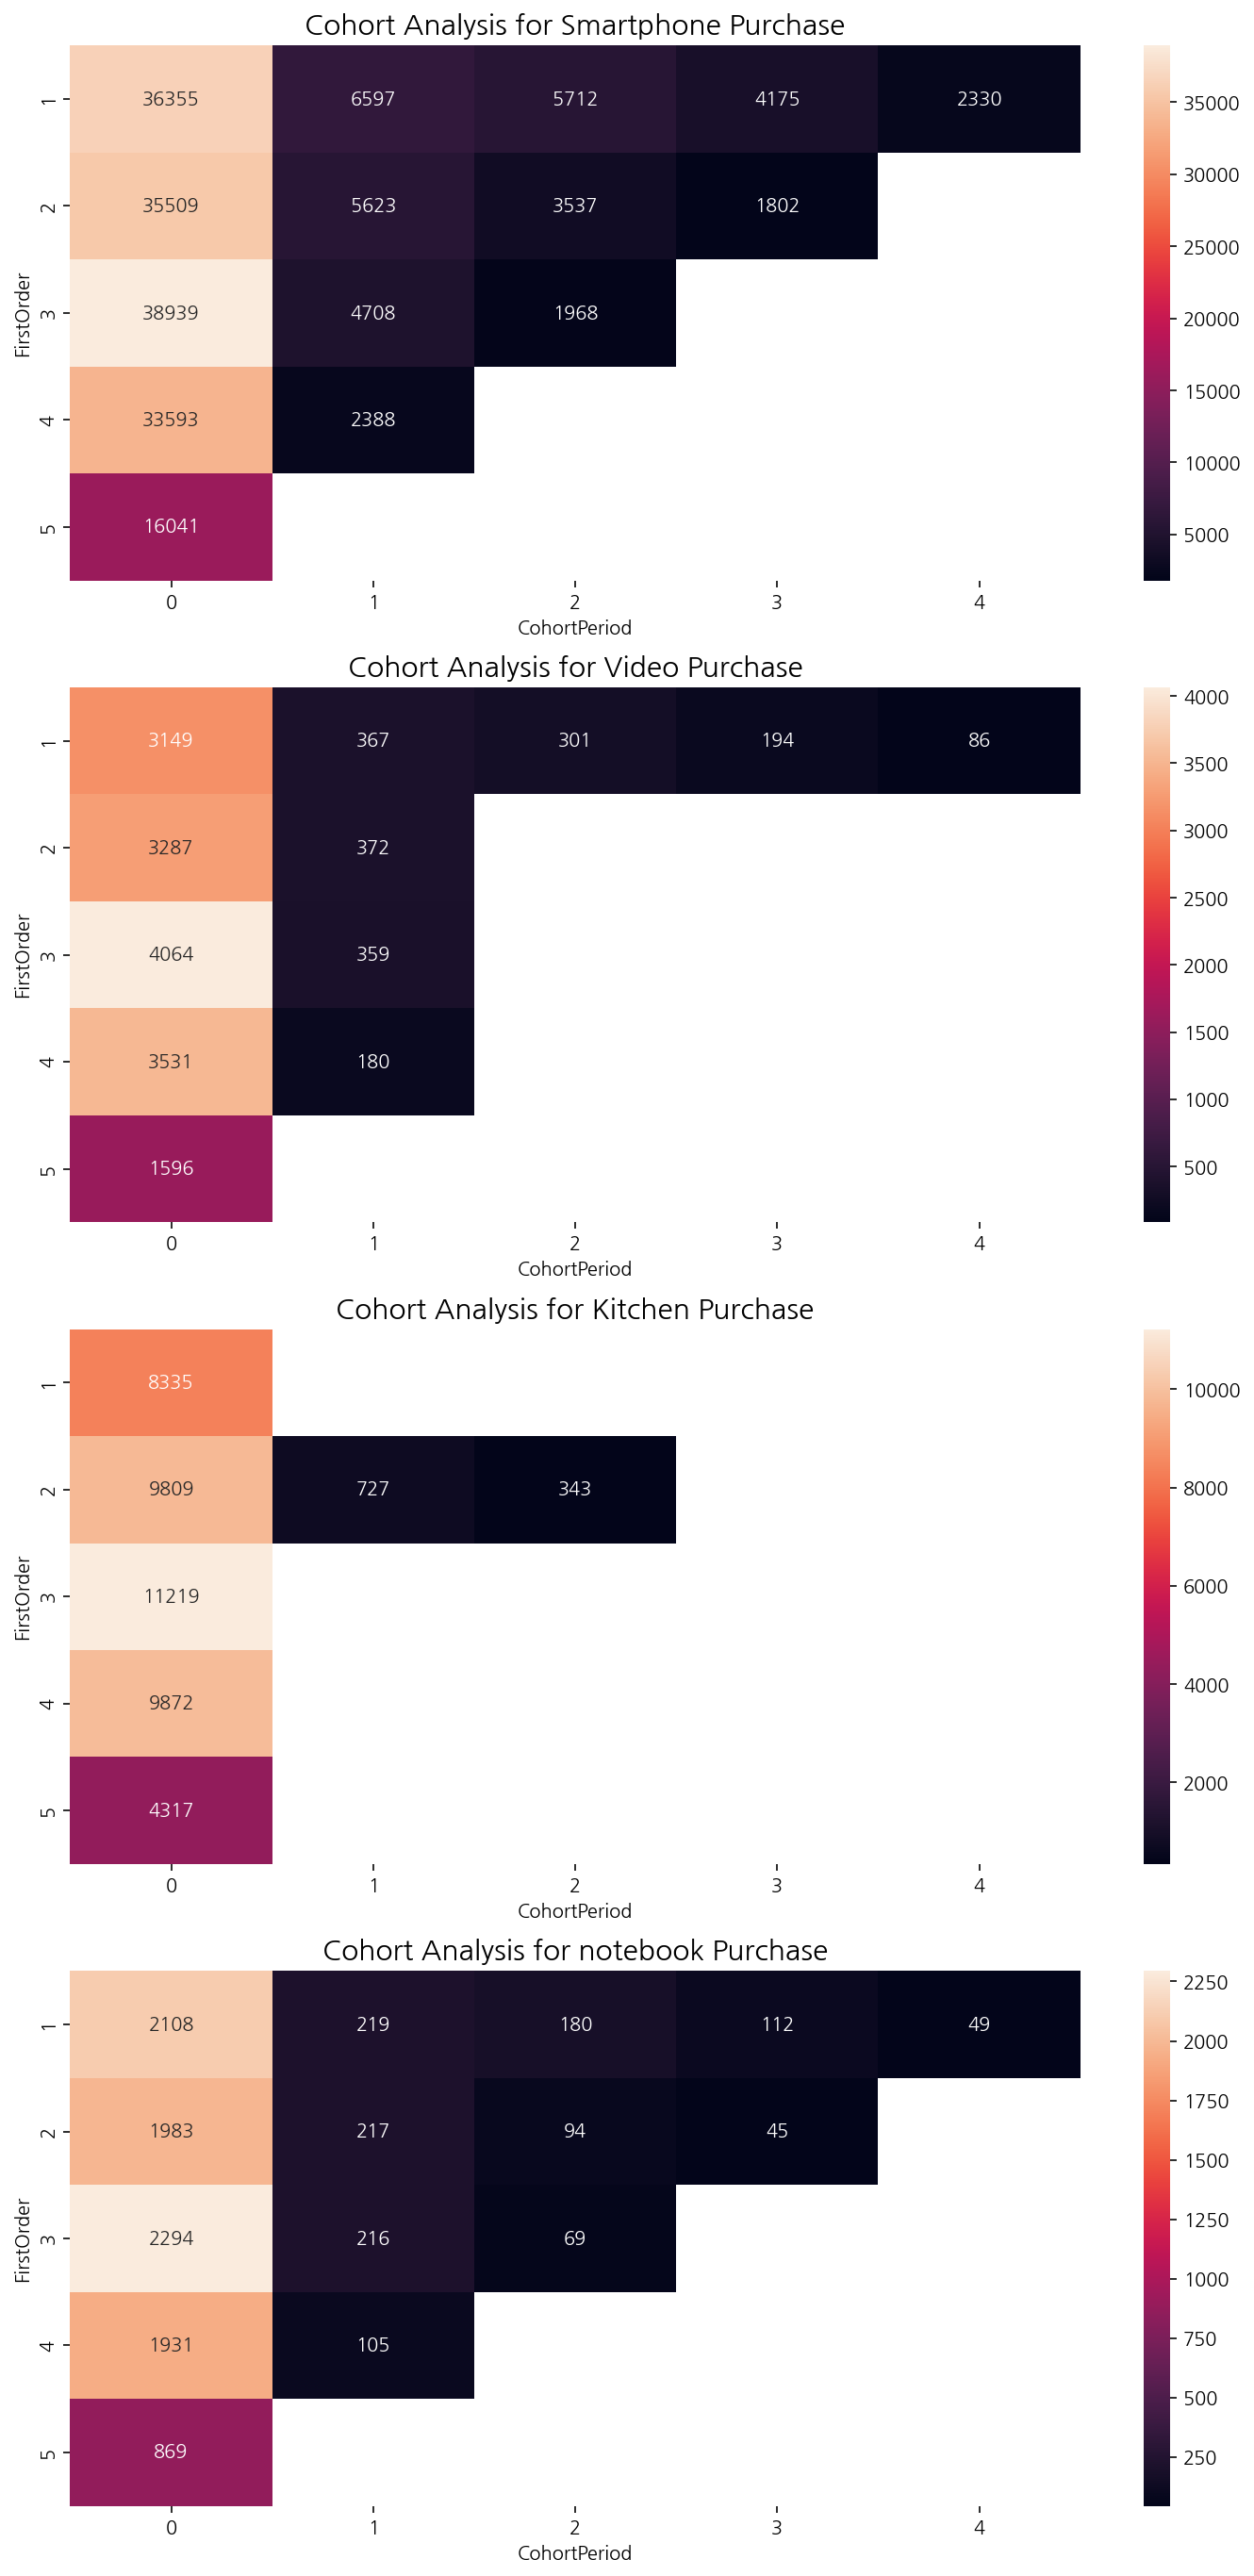

In [ ]:
# smartphone, video, kitchen, notebook 코호트 분석 시각화
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(12, 24))

phone_cnt = sns.heatmap(smartphone_cnt, annot=True, fmt=".0f", ax=ax[0])
phone_cnt.set_title("Cohort Analysis for Smartphone Purchase", fontsize=15)

video_cnt = sns.heatmap(video_cnt, annot=True, fmt=".0f", ax=ax[1])
video_cnt.set_title("Cohort Analysis for Video Purchase", fontsize=15)

kitchen_cnt = sns.heatmap(kitchen_cnt, annot=True, fmt=".0f", ax=ax[2])
kitchen_cnt.set_title("Cohort Analysis for Kitchen Purchase", fontsize=15)

notebook_cnt = sns.heatmap(notebook_cnt, annot=True, fmt=".0f", ax=ax[3])
notebook_cnt.set_title("Cohort Analysis for notebook Purchase", fontsize=15)

plt.show()

##### 코호트 분석 중간 정리  
<!-- 1. category_name 분석  
    - purchase 기준 category_name count TOP 3 (smartphone, tire, headphone)  
        - 코호트 분석 결과, 전 주에 걸쳐 유사한 purchase 빈도 발생  
        - 하지만, 구매 유지율은 전체적으로 저조하다 (10% 내외)         
<!-- 2. brand 분석  
    - purchase 기준, brand count TOP 3 (samsung, apple, xiaomi)  
        - 코호트 분석 결과, 전 주에 걸쳐 유사한 purchase 빈도 발생  
        - apple을 제외하고는, 전부 10%대의 구매 유지율 발생  
            - apple은 20% 내외   --> -->
1. Funnel 분석을 통해 주요 이탈이 발생하는 구간 (view -> cart)을 기준으로 잡음
2. view가 cart로 이어지는 확률이 높은 카테고리 (중분류) 중, 매출이 높은 순서대로 정렬
    - smartphone, video (주로 tv), kitchen, notebook
3. 코호트 분석의 결과, 해당 카테고리들은 고관여 제품의 특징 갖는다
    - 관여도
        - 소비자 행동 분석하는 분야에서 쓰는 용어
        - 특정 상황에서 소비자가 관심 갖는 강도, 흥미의 정도, 개인적인 중요도의 정도
    - 고관여 제품 : 관심이나 흥미 중요도 높게 생각하는 상품, 서비스
    - 고관여 제품 특징
        - 쇼핑시 필요로 하는 정보의 양은 많은편이며, 구매빈도는 낮다. 
        - 상품 단가는 높고 주요 상품군은 생필품 같이 20만원 이상의 전문 상품군
        - 구매 행위는 검색과 비교를 통한 계획 구매의 특징
            - 본인의 욕구, 취향, 경제 사정, 기능 등 다양한 요소 비교하고 분석한다
        - 이성적 기능 강조하거나 심미적이고 감성적인 부분 강조    
    - 출처
        - http://www.asiaa.co.kr/news/articleView.html?idxno=43969
        - http://www.ccdailynews.com/news/articleView.html?idxno=2026178


In [ ]:
smartphone_cnt = cohort_cnt(df, category_name="electronics.smartphone", daily_or_weekly="weekly")
tire_cnt = cohort_cnt(df, category_name="auto.accessories.tire", daily_or_weekly="weekly")
headphone_cnt = cohort_cnt(df, category_name="electronics.audio.headphone", daily_or_weekly="weekly")

C:\Users\aryij\AppData\Local\Temp\ipykernel_24536\3492119028.py:23: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  co_purchase["event_time"] = co_purchase["event_time"].dt.week - 39


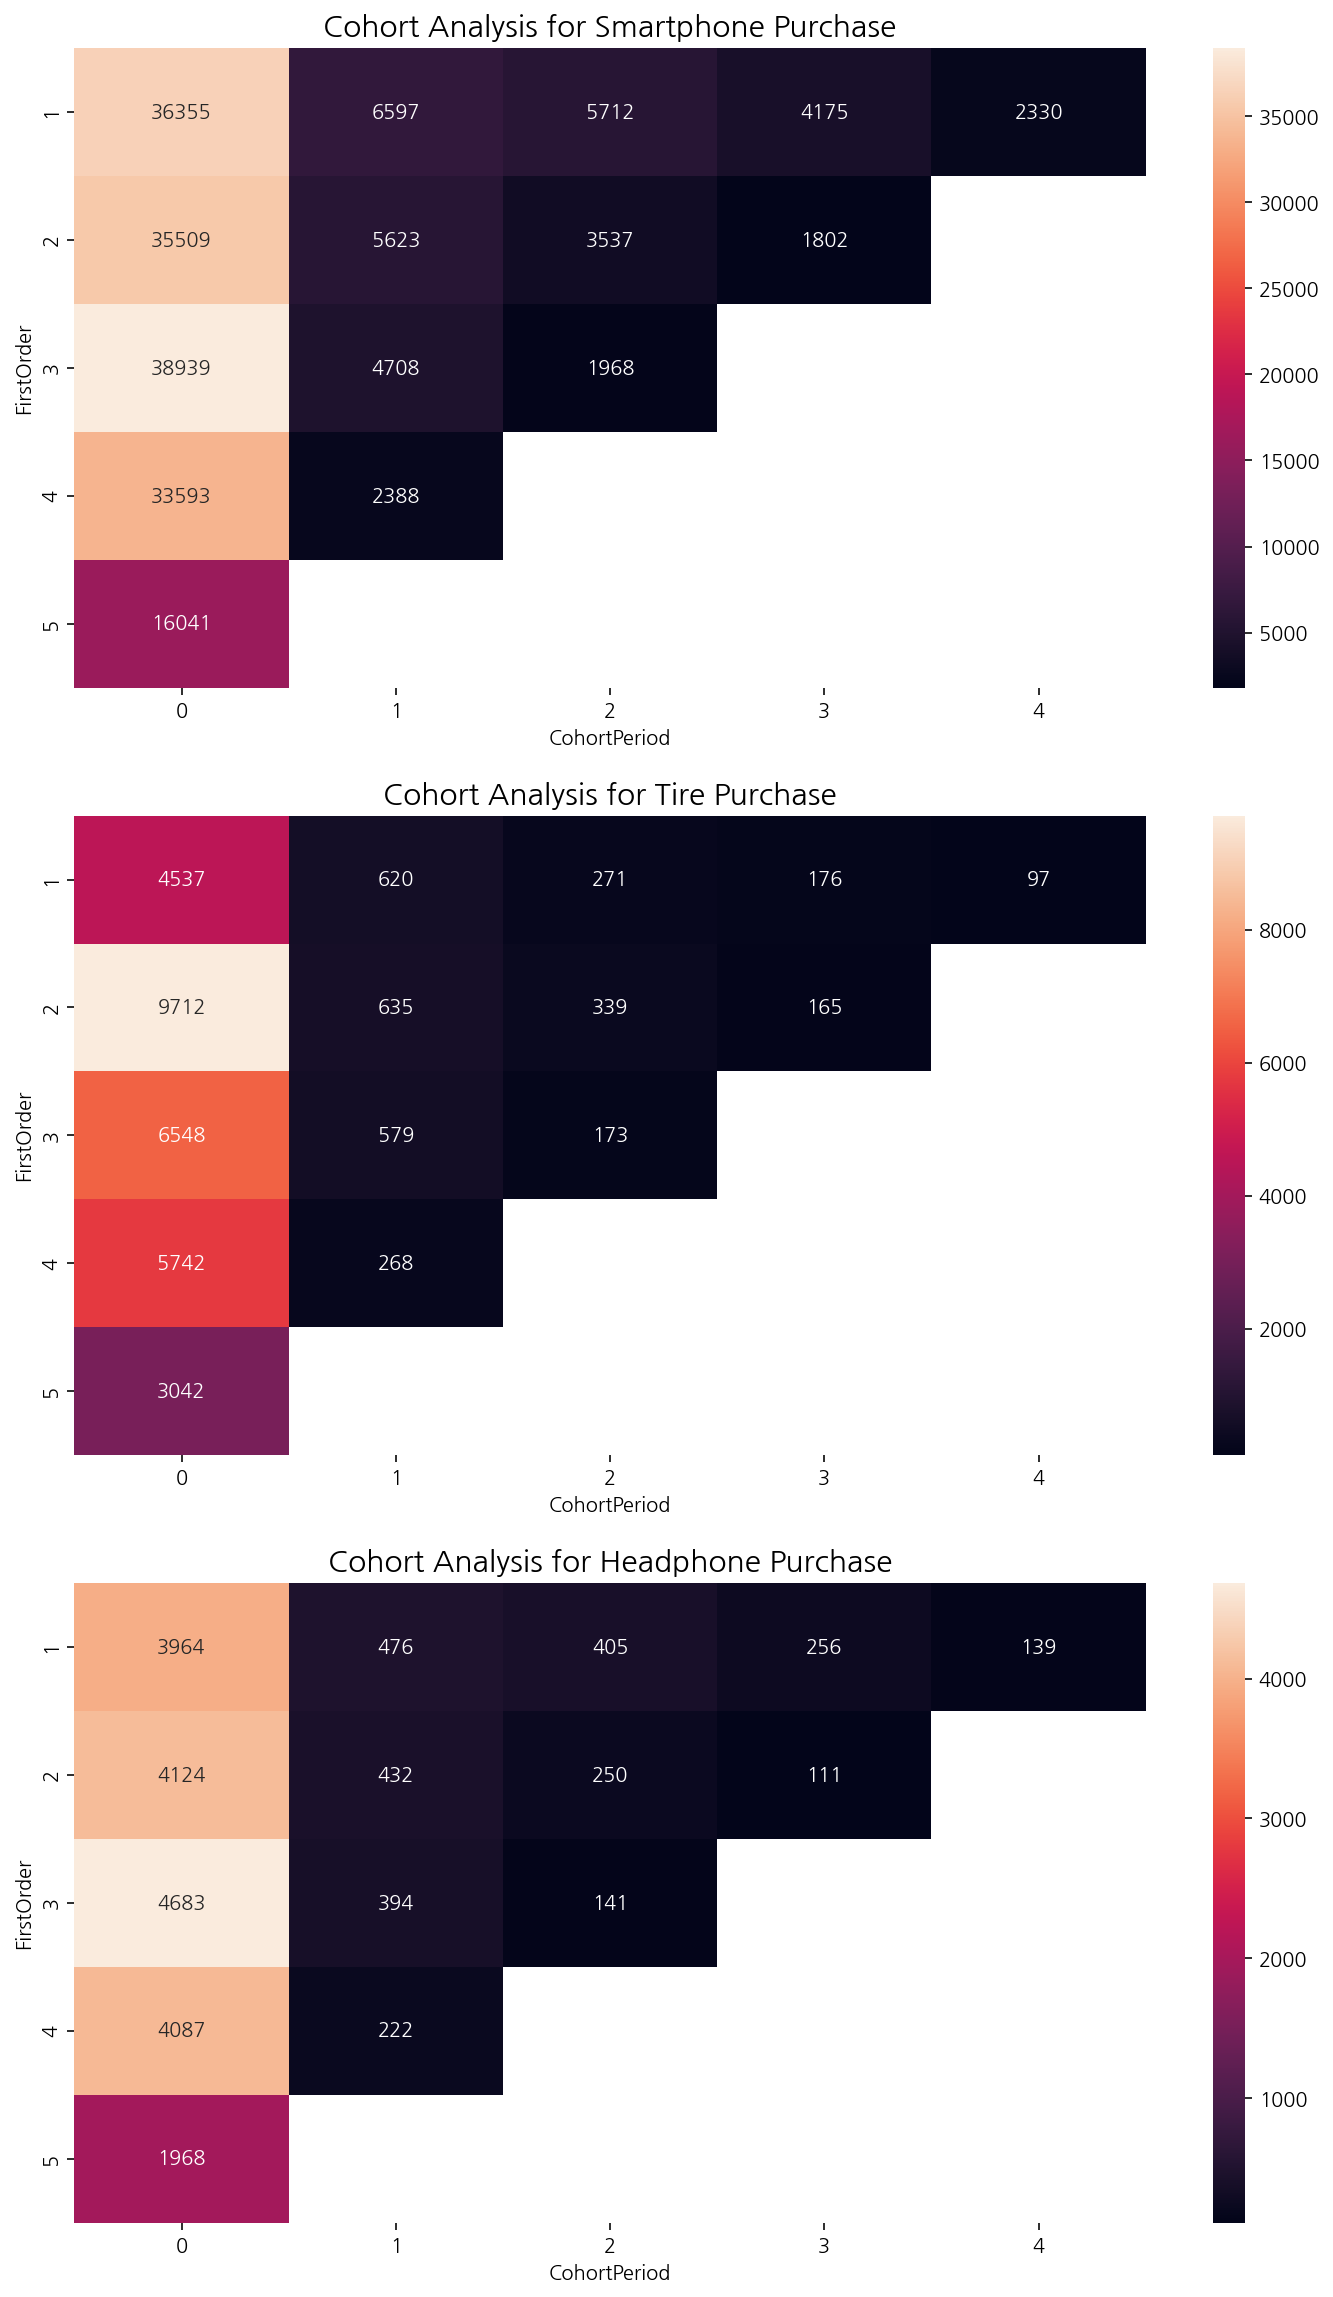

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 20))

phone_cnt = sns.heatmap(smartphone_cnt, annot=True, fmt=".0f", ax=ax[0])
phone_cnt.set_title("Cohort Analysis for Smartphone Purchase", fontsize=15)

tyre_cnt = sns.heatmap(tire_cnt, annot=True, fmt=".0f", ax=ax[1])
tyre_cnt.set_title("Cohort Analysis for Tire Purchase", fontsize=15)

head_cnt = sns.heatmap(headphone_cnt, annot=True, fmt=".0f", ax=ax[2])
head_cnt.set_title("Cohort Analysis for Headphone Purchase", fontsize=15)

plt.show()

In [ ]:
# purchase 기준 brand count 상위 TOP 3
# -> samsung, apple, xiaomi
samsung_pct = cohort_pct(df, brand="samsung", daily_or_weekly="weekly")
apple_pct = cohort_pct(df, brand="apple", daily_or_weekly="weekly")
xiaomi_pct = cohort_pct(df, brand="xiaomi", daily_or_weekly="weekly")

samsung_cnt = cohort_cnt(df, brand="samsung", daily_or_weekly="weekly")
apple_cnt = cohort_cnt(df, brand="apple", daily_or_weekly="weekly")
xiaomi_cnt = cohort_cnt(df, brand="xiaomi", daily_or_weekly="weekly")

C:\Users\aryij\AppData\Local\Temp\ipykernel_20320\2425866543.py:23: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  co_purchase["event_time"] = co_purchase["event_time"].dt.week - 39


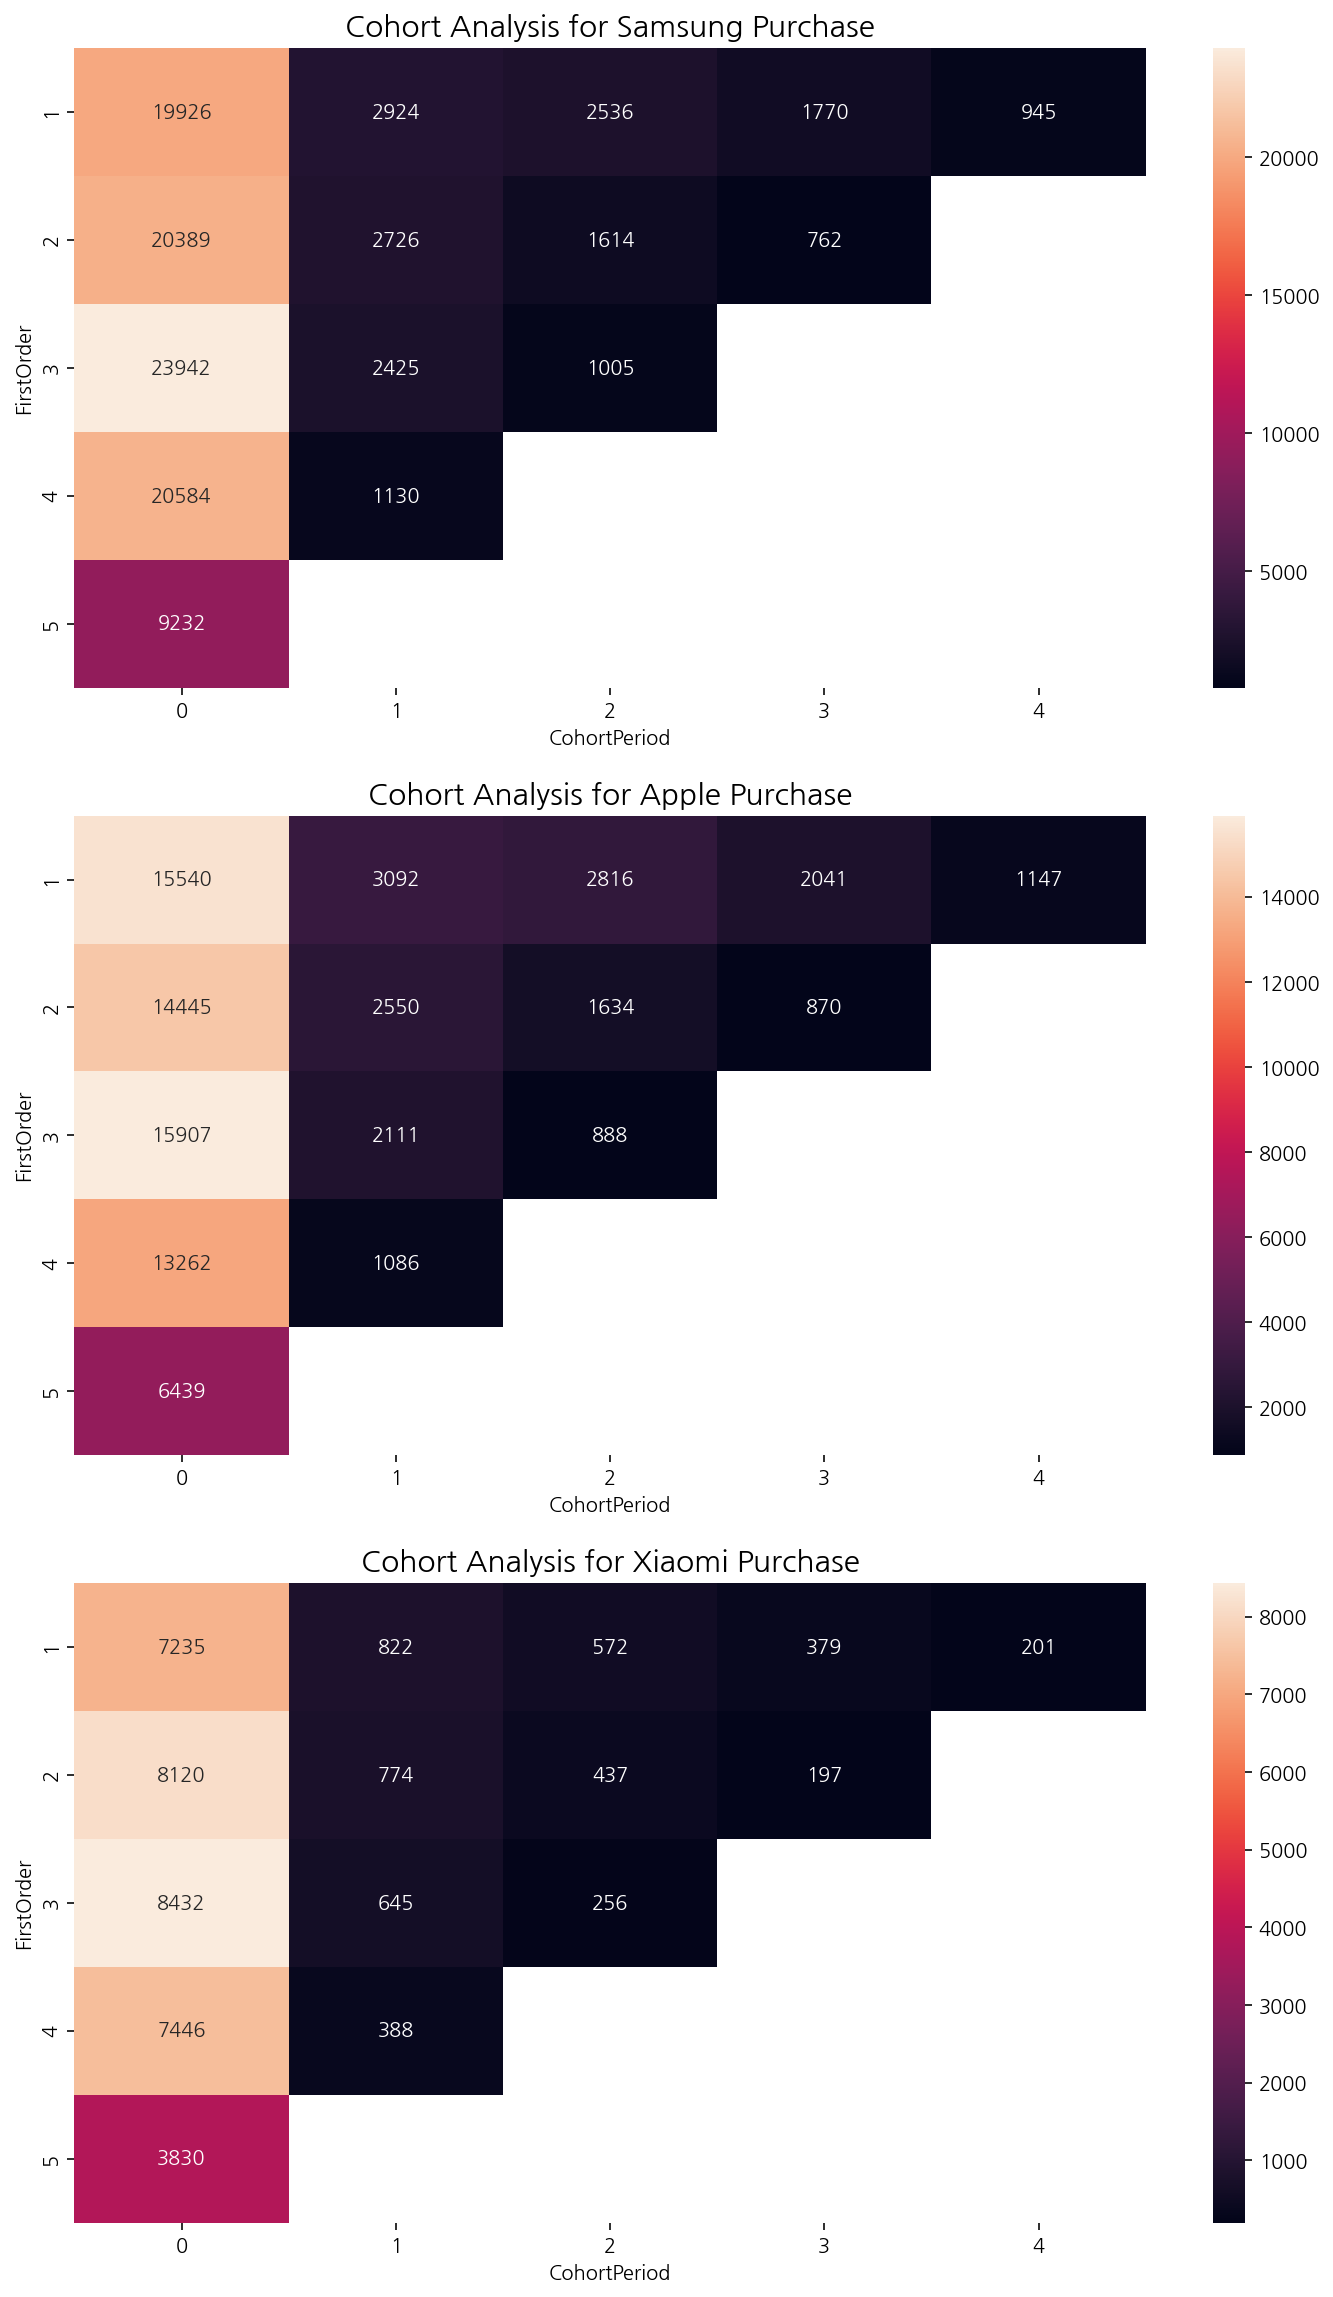

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 20))

sam_cnt = sns.heatmap(samsung_cnt, annot=True, fmt=".0f", ax=ax[0])
sam_cnt.set_title("Cohort Analysis for Samsung Purchase", fontsize=15)

app_cnt = sns.heatmap(apple_cnt, annot=True, fmt=".0f", ax=ax[1])
app_cnt.set_title("Cohort Analysis for Apple Purchase", fontsize=15)

xiao_cnt = sns.heatmap(xiaomi_cnt, annot=True, fmt=".0f", ax=ax[2])
xiao_cnt.set_title("Cohort Analysis for Xiaomi Purchase", fontsize=15)

plt.show()

# 유저세션 요일별 첫 방문 기준으로 방문율 확인

In [ ]:
grouped_session = df.groupby(['user_session','day_name'])['event_time'].agg(np.min)

In [ ]:
grouped_session

user_session                          day_name
00000042-3e3f-42f9-810d-f3d264139c50  Friday     2019-10-18 14:54:45+04:00
00000056-a206-40dd-b174-a072550fa38c  Thursday   2019-10-31 10:23:12+04:00
00000083-8816-4d58-a9b8-f52f54186edc  Sunday     2019-10-06 15:24:45+04:00
000001fd-1f89-45e8-a3ce-fe3218cabfad  Friday     2019-10-25 12:30:42+04:00
000003eb-b63e-45d9-9f26-f229057c654a  Thursday   2019-10-03 15:28:52+04:00
                                                            ...           
fffff6b0-1ade-413d-b9b4-5fb0dd26aa34  Saturday   2019-10-05 20:40:10+04:00
fffff79f-a682-4f63-ad94-8364fe3d648f  Friday     2019-10-18 10:42:56+04:00
fffff8d4-d31c-4066-a00b-2ace84d33640  Thursday   2019-10-31 22:11:13+04:00
fffffa1b-a6f0-483a-8f4b-30db242889b6  Tuesday    2019-10-08 15:32:24+04:00
fffffc65-7ce9-435c-8b72-1d9f7062fe77  Friday     2019-10-11 10:10:23+04:00
Name: event_time, Length: 9289098, dtype: datetime64[ns, Asia/Dubai]

In [ ]:
df_se = pd.DataFrame(grouped_session)

In [ ]:
df_se = df_se.groupby('day_name').count().reset_index()
df_se

day_name  user_session  event_time
0     Friday       1293114     1293114
1     Monday       1178347     1178347
2   Saturday       1188199     1188199
3     Sunday       1243902     1243902
4   Thursday       1412362     1412362
5    Tuesday       1496927     1496927
6  Wednesday       1476247     1476247

In [ ]:
df_se.rename(columns = {'user_session' : 'day_visit'}, inplace = True)
df_se = df_se[['day_name', 'day_visit']]

In [ ]:
df_se['visit_prop'] = df_se.day_visit / df_se.day_visit.sum() * 100
df_se

day_name  day_visit  visit_prop
0     Friday    1293114   13.920770
1     Monday    1178347   12.685268
2   Saturday    1188199   12.791328
3     Sunday    1243902   13.390988
4   Thursday    1412362   15.204512
5    Tuesday    1496927   16.114880
6  Wednesday    1476247   15.892253

In [ ]:
df_visit_cvr = pd.merge(df_cvr,df_se, on='day_name')
df_visit_cvr

day_name  user_session_x  user_session_y       CVR  day_no  day_visit  \
0     Monday         5117934           96418  1.883924       0    1178347   
1    Tuesday         6491794          113778  1.752643       1    1496927   
2  Wednesday         6385206          119190  1.866659       2    1476247   
3   Thursday         6114511          113167  1.850794       3    1412362   
4     Friday         5598671          103830  1.854547       4    1293114   
5   Saturday         5346862           95932  1.794174       5    1188199   
6     Sunday         5655898          100534  1.777507       6    1243902   

   visit_prop  
0   12.685268  
1   16.114880  
2   15.892253  
3   15.204512  
4   13.920770  
5   12.791328  
6   13.390988

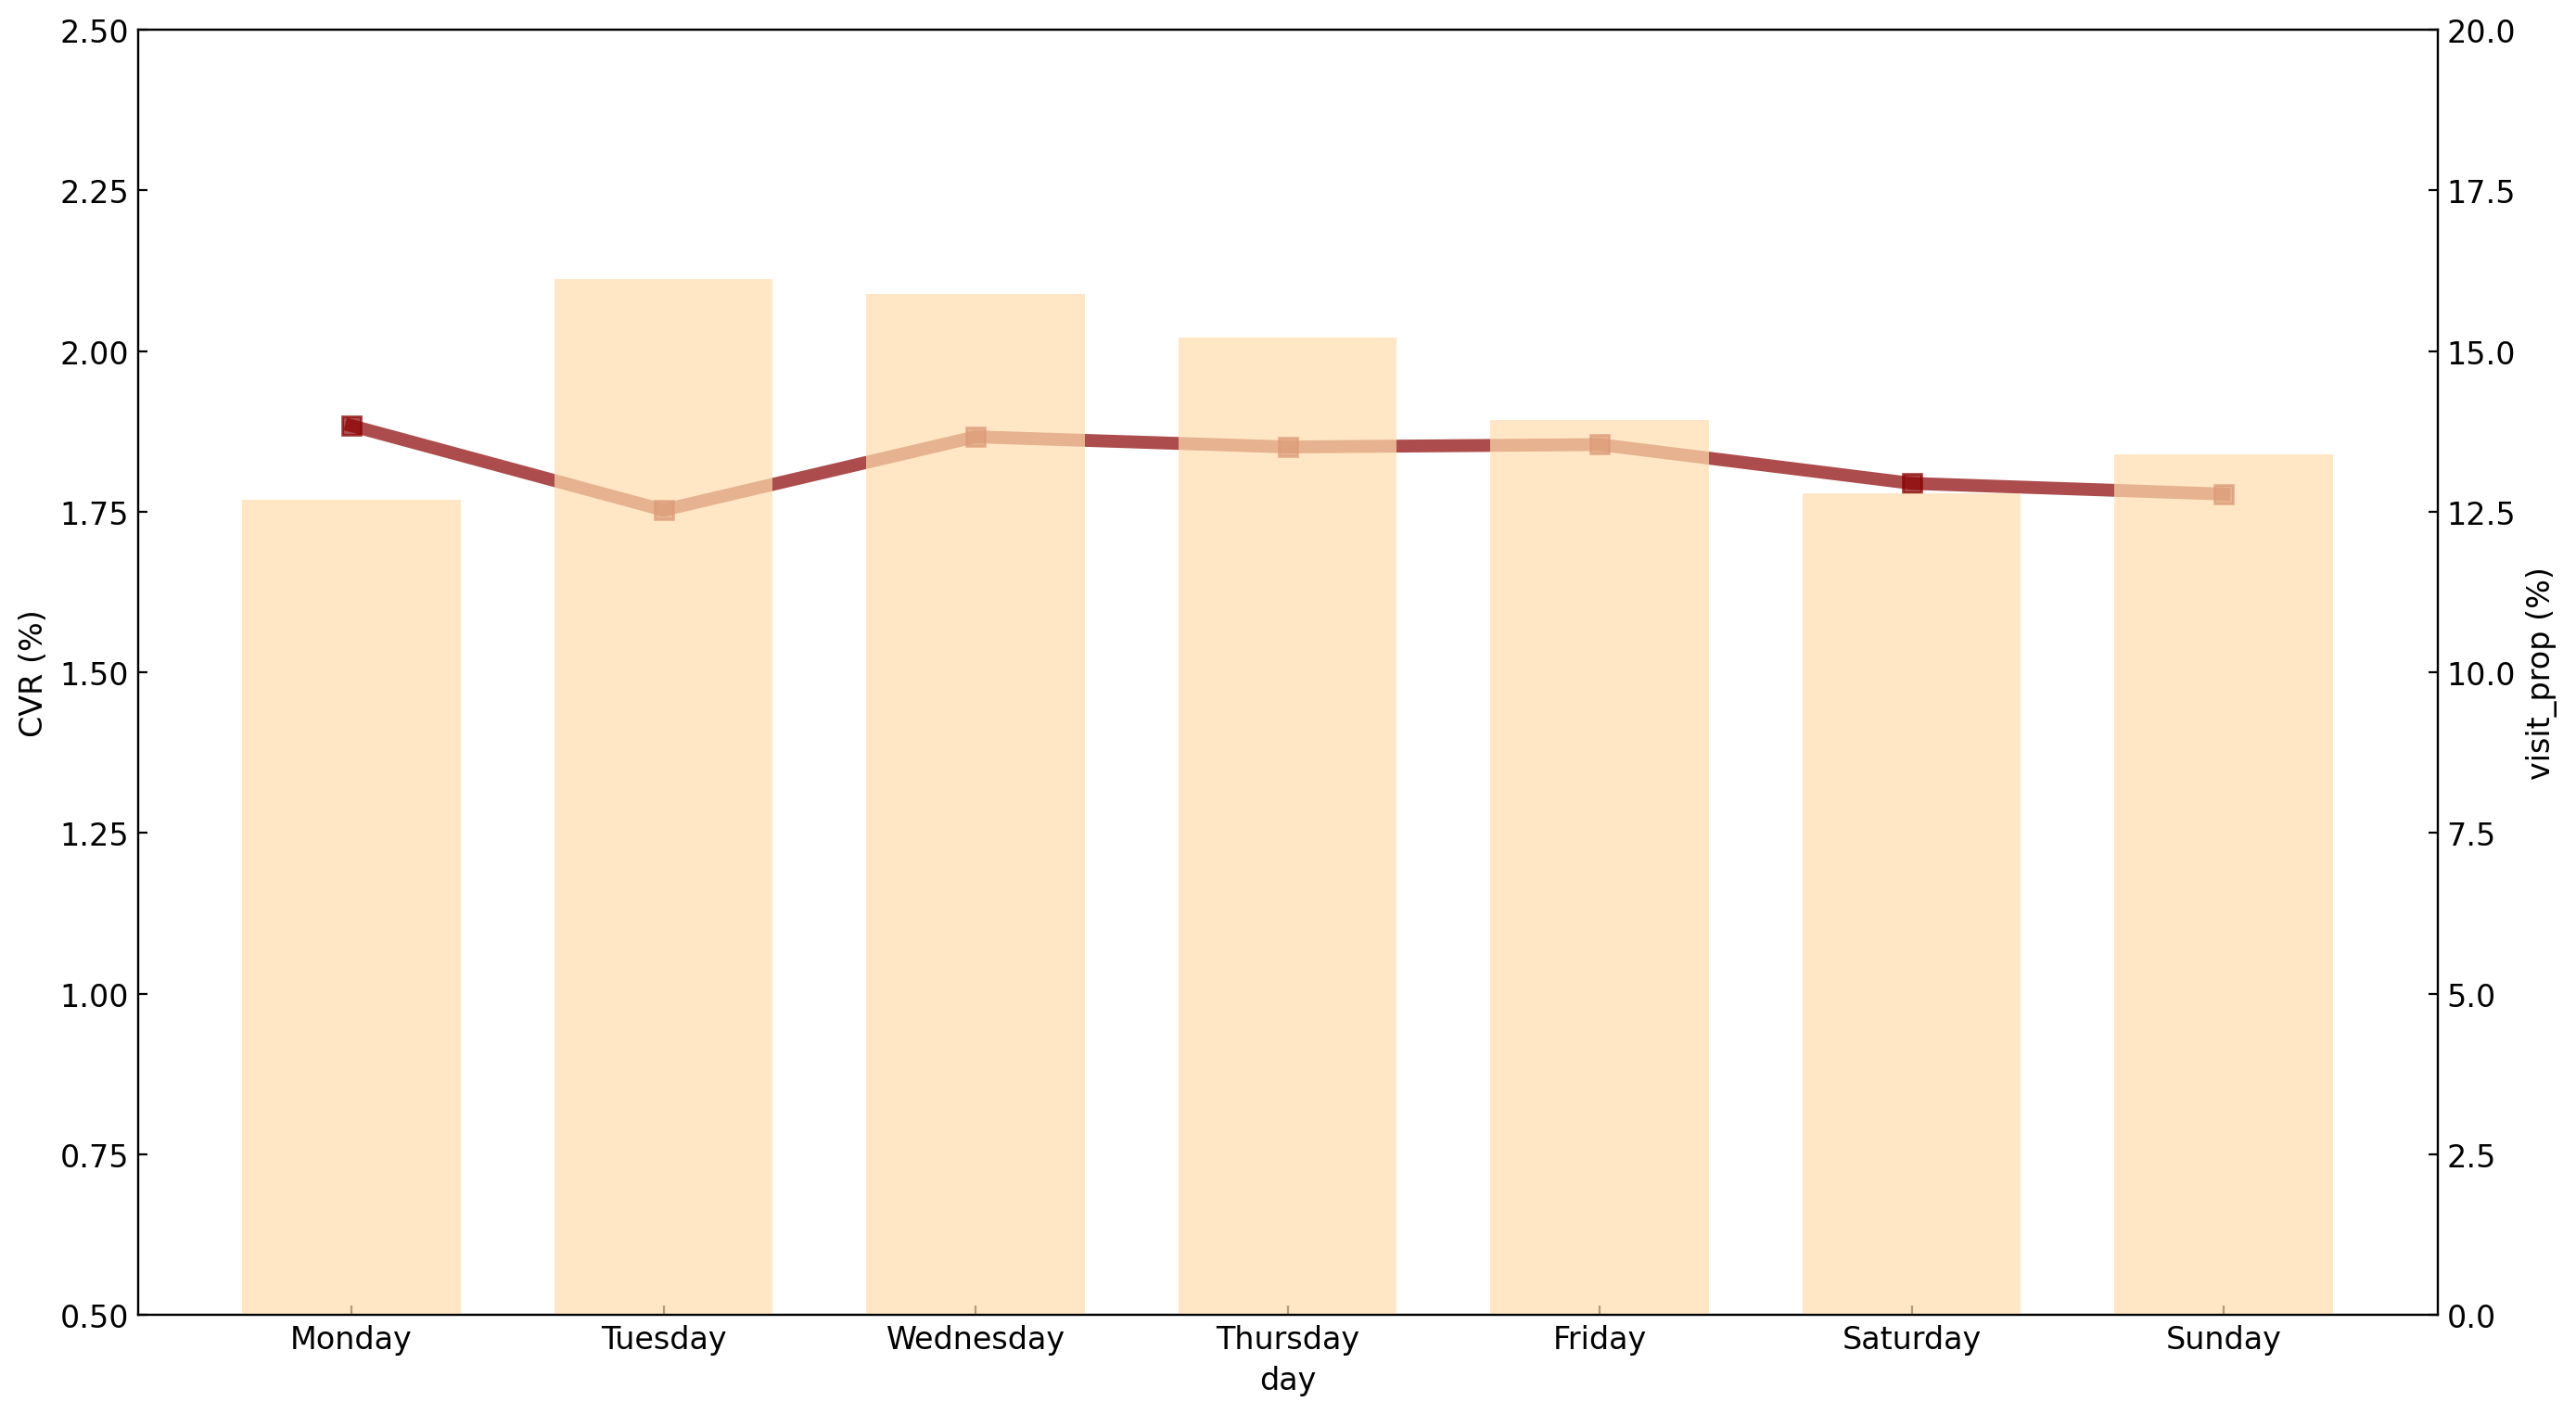

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (16, 9)
plt.rcParams['font.size'] = 12

x = df_visit_cvr['day_name']
y1 = df_visit_cvr['CVR']
y2 = df_visit_cvr['visit_prop']


# 3. 그래프 그리기
fig, ax1 = plt.subplots()

ax1.plot(x, y1, '-s', color='darkred', markersize=7, linewidth=5, alpha=0.7, label='CVR')
ax1.set_ylim(0.5, 2.5)
ax1.set_xlabel('day')
ax1.set_ylabel('CVR (%)')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.bar(x, y2, color='navajowhite', label='Demand', alpha=0.7, width=0.7)
ax2.set_ylim(0, 20)
ax2.set_ylabel(r'visit_prop (%)')
ax2.tick_params(axis='y', direction='in')

plt.show()